# TP TRAITEMENT VIDEO
##    \* \* \* \* \* \*                        Hraghi Arij & Ahmed Gharsallah                    \* \* \* \* \* \*
##                                                      

### I- Acquisition, Chargement et Sauvegarde -

In [27]:
import cv2
video = cv2.VideoCapture(r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4")

In [28]:
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
count_frames=int(video.get(cv2.CAP_PROP_FRAME_COUNT))

In [3]:
print("fps    :", fps)
print("width     :", width)
print("height     :", height)
print("frame_count     :", count_frames)

fps    : 30.0
width     : 1920
height     : 1080
frame_count     : 239


In [10]:
import matplotlib.pyplot as plt
import os
save_dir=r"C:\Users\Arij\Desktop\frames_Tp"
path=r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4"

def get_frames(count_frame,path):
    cap = cv2.VideoCapture(path)

    good = 0
    good_frames = []
    points = []

    for index in range(count_frame):

        ret, frame = cap.read()
        dir=os.path.join(save_dir,f'frame{index}.jpg')
        cv2.imwrite(dir,frame)
        

In [ ]:
get_frames(count_frames,path)

In [29]:
path=r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4"
import cv2
import time
save_dir=r"C:\Users\Arij\Desktop\RT5\Traitement_video\Part2"
def get_frames(count_frame,path):
    cap = cv2.VideoCapture(path)

    good = 0
    good_frames = []
    points = []

    for index in range(count_frame):
            ret, frame = cap.read()
            frame=cv2.resize(frame,(680,480))
            dir=os.path.join(save_dir,f'frame{index}.jpg')
            cv2.imwrite(dir,frame)
            if (index%5==0):
            #time.sleep(0.05)
                print(index)
                #rescale to the 
                plt.imshow(frame)
                plt.show()

In [ ]:
get_frames(count_frames,path)

### II-Segmentation Spatiale

#### Ajout personnel

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path=r"C:\Users\Arij\Desktop\RT5\Traitement_video\Part2\frame0.jpg"
def Canny(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

    
    edges = cv2.Canny(blurred_image, threshold1=50, threshold2=20)

    
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

   
    contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(edges)
    plt.show()
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    mask = np.zeros_like(image)

   
    cv2.drawContours(mask, [largest_contour], -1, (0, 255, 0), thickness=cv2.FILLED)

    
    cropped_image = image[y:y+h, x:x+w]
    
    
    return image,mask,cropped_image



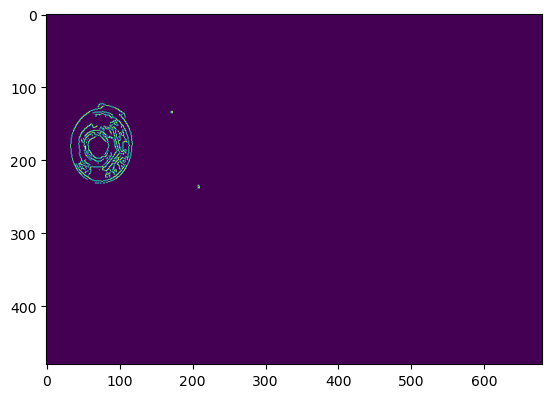

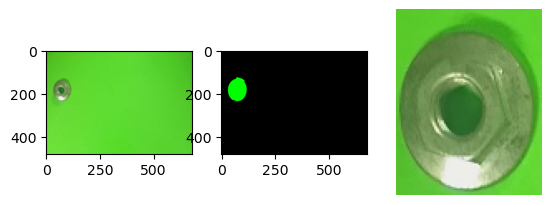

In [97]:
image,contours,cropped_image=Canny(image_path)
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [9]:
import matplotlib.pyplot as plt
import os
save_dir=r"C:\Users\Arij\Desktop\frames_Tp"
path=r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4"

def get_frames(count_frame,path):
    cap = cv2.VideoCapture(path)

    good = 0
    good_frames = []
    points = []

    for index in range(count_frame):

        ret, frame = cap.read()
        dir=os.path.join(save_dir,f'frame{index}.jpg')
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray_image, cmap='gray')
        plt.axis('off')
        plt.show()

In [ ]:
get_frames(count_frames,path)

## Implantez l’algorithme de seuillage global heuristique

In [13]:
import numpy as np
Threshold= 159
Image_path=r"C:\Users\Arij\Desktop\RT5\Traitement_video\TP1_part1\frame111.jpg"
new_threshold=0
Img=cv2.imread(Image_path)
gray_image=cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
while(Threshold!=new_threshold):
    G1=gray_image>Threshold
    G2=gray_image<=Threshold
    if np.sum(G1) != 0:
       m1 = np.sum(G1 * gray_image) / np.sum(G1)
       print("m1",m1)
    else:
    # Attention division par zero !!!!!!!!!! 
      print("invalid")
      break
    if np.sum(G2) != 0:
      m2 = np.sum(G2 * gray_image) / np.sum(G2)
    else:
    # Attention division par zero !!!!!!!!!! 
      print("invalid")
      break
      print("m2",m2)
    T=(m1+m2)/2
    new_threshold=Threshold
    Threshold=T
    print("T",Threshold)
    





m1 165.79236990403768
T 159.37339696297084
m1 165.79236990403768
T 159.37339696297084


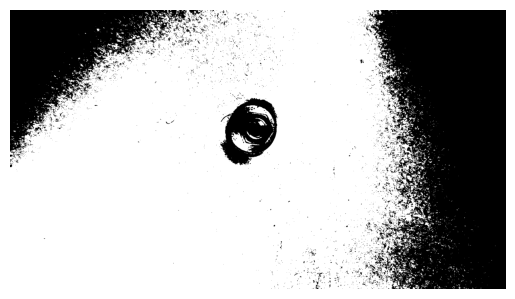

In [14]:
import matplotlib.pyplot as plt
binary_image = (gray_image > T).astype(np.uint8) 
plt.imshow(binary_image,cmap='gray')
plt.axis('off')
plt.show()

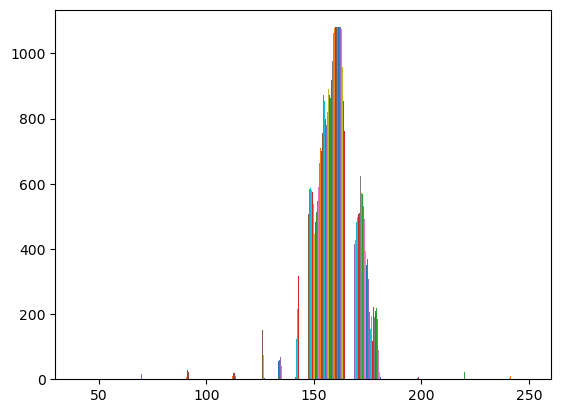

In [83]:
#Ajouter la partie de l'histogramme
Image_path=r"C:\Users\Arij\Desktop\RT5\Traitement_video\TP1_part1\frame111.jpg"
new_threshold=0
Img=cv2.imread(Image_path)
gray_image=cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

plt.hist(gray_image)
plt.show()

### Segmentation avec la methode OTSU

In [8]:
import cv2


video_capture = cv2.VideoCapture(r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4")

frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))
fps = int(video_capture.get(5))
output_file = r'C:\Users\Arij\Desktop\RT5\Traitement_video\Output_tp.avi'  

fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height), isColor=0)
while True:
    ret, frame = video_capture.read()
    
    if not ret:
        break  # Okhrej
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    _, binary_frame = cv2.threshold(gray_frame, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    video_writer.write(binary_frame)
    
video_capture.release()
video_writer.release()


## Ajout personnel

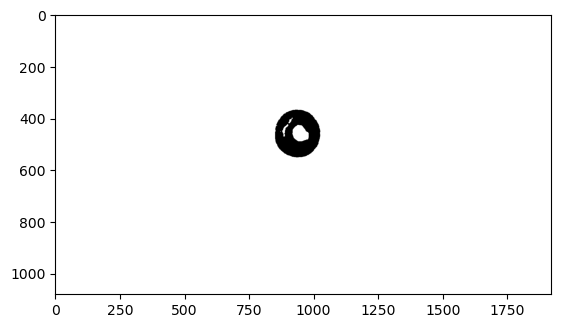

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread(r"C:\Users\Arij\Desktop\RT5\Traitement_video\TP1_part1\frame111.jpg")
blue, green, red = cv2.split(image)
min_green = green.min()
max_green = green.max()
"""
returns a binary mask where the pixels that 
fall within the specified HSV color range 
(lower_green and upper_green) will be set to 255 (white), 
AND THE REST to 0.
"""
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_green = np.array([45, 0, 0])
upper_green = np.array([255, 255, 255])

mask = cv2.inRange(hsv_image, lower_green, upper_green)
#object_image = cv2.bitwise_and(image,image, mask=mask)
#object_image=cv2.bitwise_not(object_image)
#object_image[object_image!=255]=0
plt.imshow(mask,cmap='gray')
plt.show()


61
255
(1080, 1920, 3)
(1080, 1920)


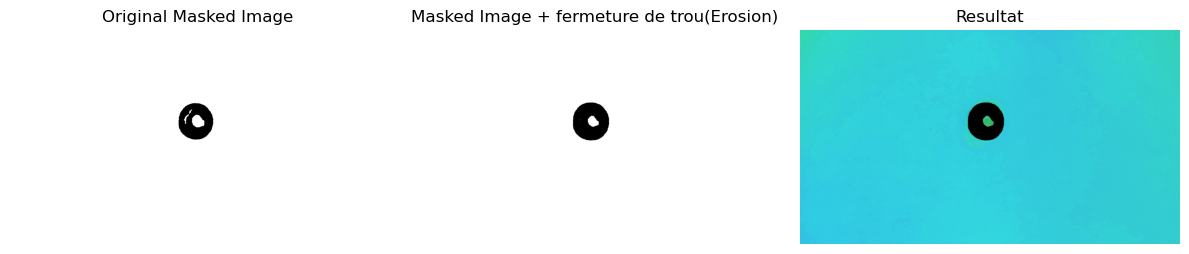

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Arij\Desktop\RT5\Traitement_video\TP1_part1\frame111.jpg")
blue, green, red = cv2.split(image)
min_green = green.min()
max_green = green.max()
print(min_green)
print(max_green)

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_green = np.array([45, 0, 0])
upper_green = np.array([255, 255, 255])

mask = cv2.inRange(hsv_image, lower_green, upper_green)
# fermeture de trou
# mophological closing 
kernel = np.ones((8, 8), np.uint8) 
erosion = cv2.erode(mask, kernel, iterations=1)
print(hsv_image.shape)
print(erosion.shape)
adapted_mask = np.zeros((1080, 1920, 3), dtype=np.uint8)
adapted_mask[:, :, 0] = erosion
adapted_mask[:, :, 1] = erosion
adapted_mask[:, :, 2] = erosion
object_image = cv2.bitwise_and(hsv_image,adapted_mask)
plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
plt.imshow(mask, cmap='gray')
plt.title("Original Masked Image ")
plt.axis('off')
plt.subplot(3,3,2)
plt.imshow(erosion, cmap='gray')
plt.title("Masked Image + fermeture de trou(Erosion)")
plt.axis('off')
plt.subplot(3,3,3)
plt.imshow(object_image)
plt.title("Resultat")
plt.axis('off')
plt.tight_layout()
plt.show()


# Segmentation Temporelle

## Question 1:

In [ ]:
path=r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4"
cap = cv2.VideoCapture(path)
count_frames=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#list is where we're going to stock the frames
List=[]
#save the binary images 
Result=[]
for index in range(count_frames):
        ret, frame = cap.read()
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        List.append(gray_image)
I=List[0]
B=List[0]
idx=0
while(idx<len(List)-1):
    print(idx)
    I=List[idx+1]
    diff=cv2.absdiff(I, B)
    idx+=1
    B=List[idx]
    Threshold=Seuillage_Heuristique(diff,Threshold=5,new_threshold=0)
    binary_image = (diff > Threshold).astype(np.uint8) 
    Result.append(binary_image)
    plt.imshow(binary_image,cmap='gray')
    plt.axis('off')
    plt.show()
    
    
    

### decalage = 5

0
m1 17.375899190100107
m2 1.1253116023761924


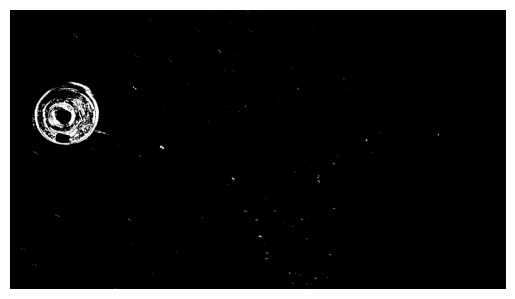

1
m1 18.164109361310178
m2 1.1353554578980596


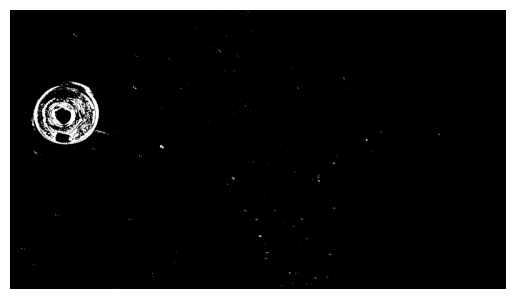

2
m1 17.64166195472346
m2 1.1617430519253904


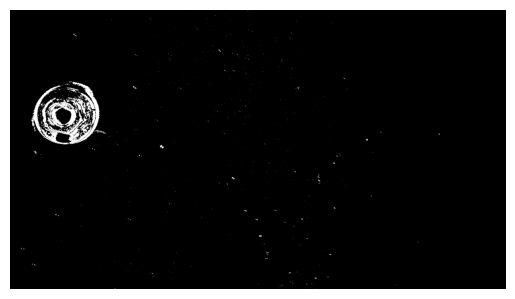

3
m1 17.669245858761986
m2 1.1623355295602944


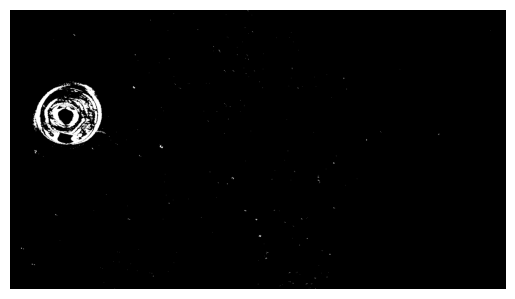

4
m1 22.168372920106695
m2 0.9199291134013523


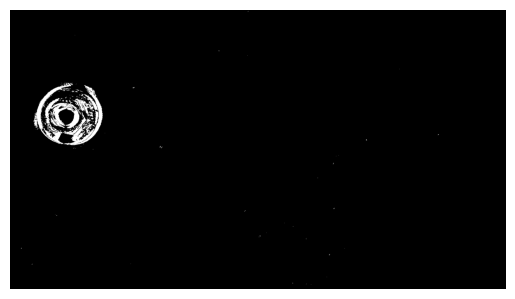

5
m1 22.444283351833814
m2 0.9277930007878955


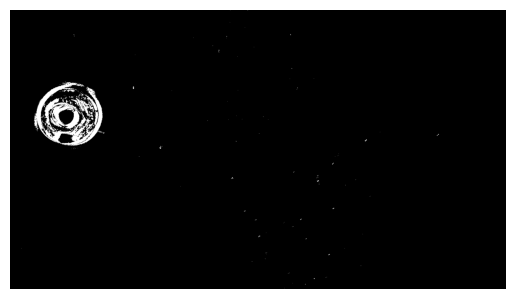

6
m1 21.925016693507207
m2 1.0608395190148525


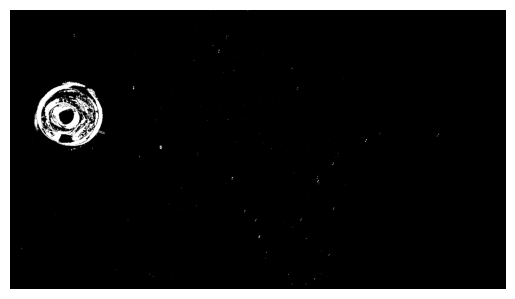

7
m1 20.775285934530853
m2 1.1148820161184012


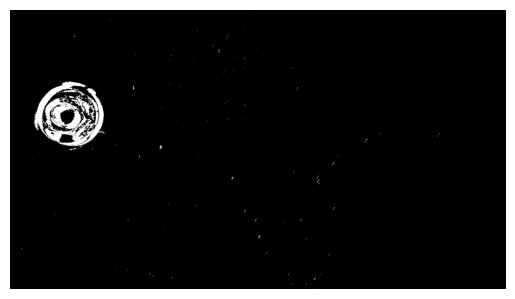

8
m1 20.22728518099935
m2 1.1669028712754355


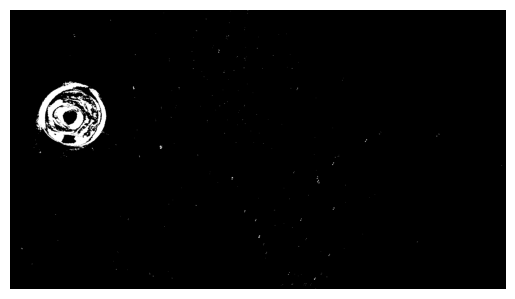

9
m1 21.86176360758931
m2 1.1958641057657942


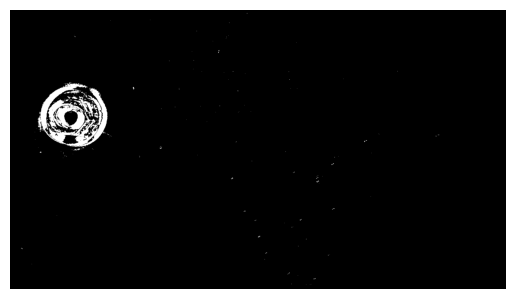

10
m1 24.281368164456133
m2 1.1142077100135


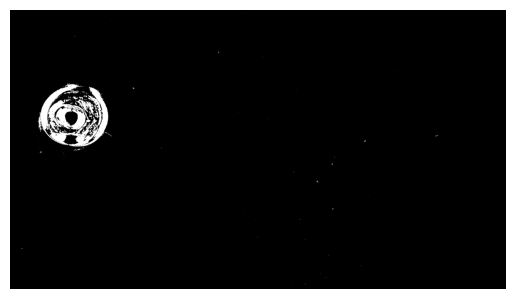

11
m1 24.505241541169568
m2 1.0519923657705677


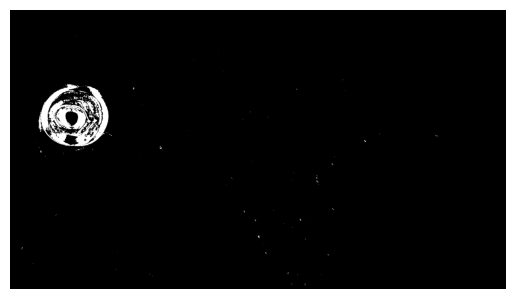

12
m1 23.380432301452124
m2 1.0724374940805266


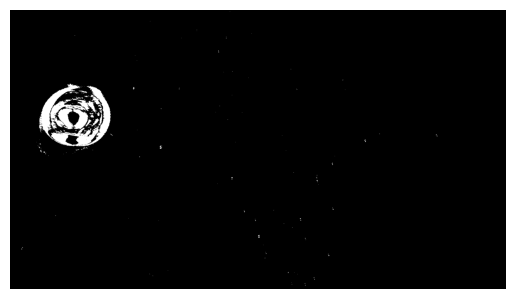

13
m1 22.0313474312051
m2 1.109782962636455


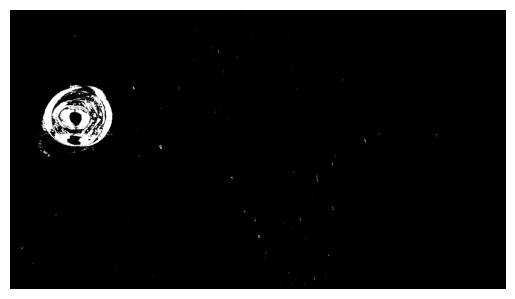

14
m1 20.496022255016708
m2 1.1274724554723483


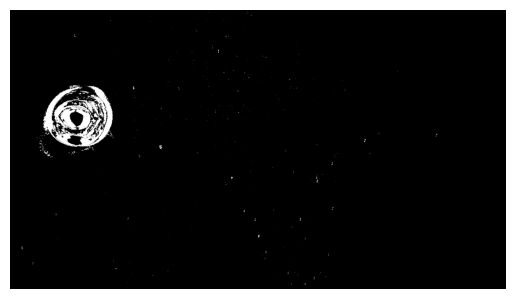

15
m1 19.76930588057038
m2 1.157287678836422


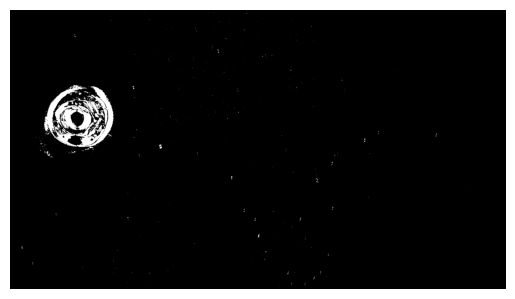

16
m1 22.569314951242625
m2 1.1566149148430365


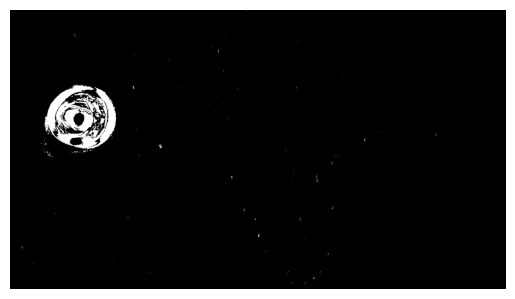

17
m1 23.94487999615218
m2 1.0872273492748457


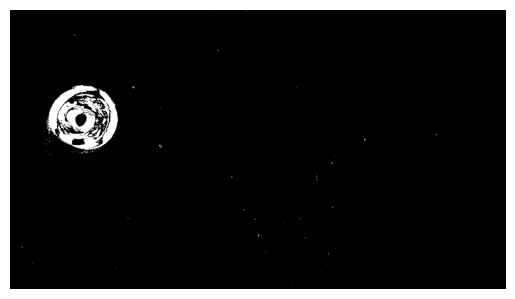

18
m1 24.63012944551945
m2 1.0242693375022098


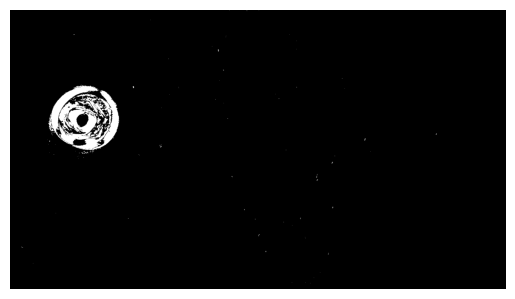

19
m1 26.198626692791873
m2 0.9567732792176709


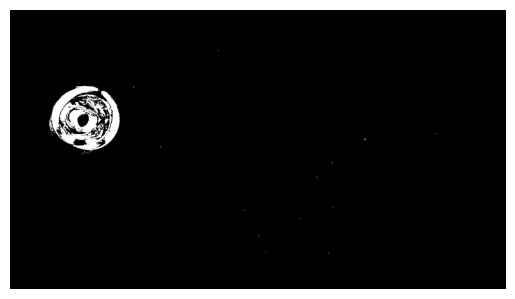

20
m1 27.171248385635934
m2 0.8149886369222321


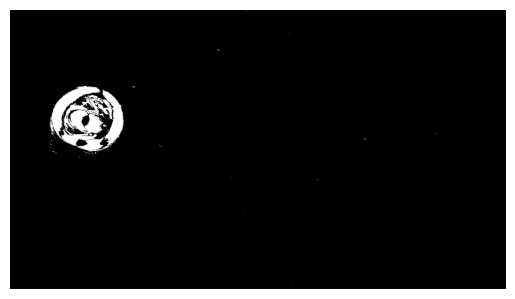

21
m1 27.68592952533142
m2 0.9967718097892284


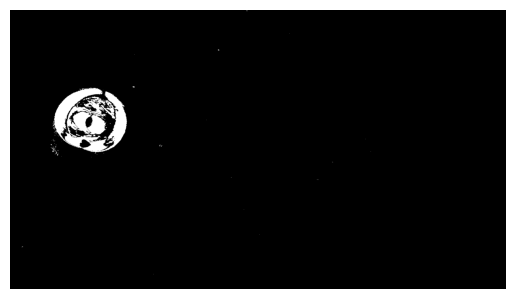

22
m1 27.028779610862752
m2 1.044498973762435


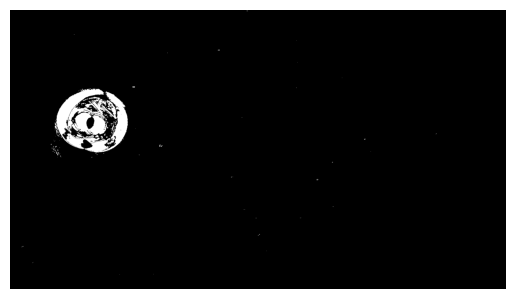

23
m1 26.06127359080115
m2 1.0906169013411677


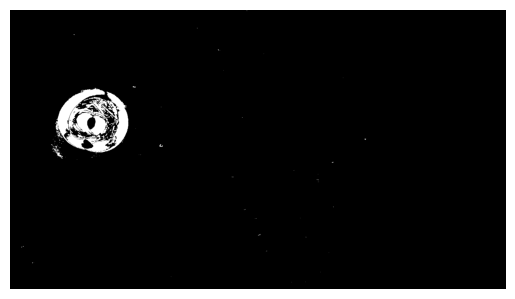

24
m1 25.227882320959313
m2 1.1399411971588922


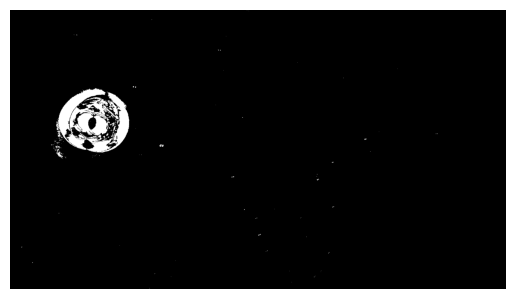

25
m1 22.189146737707695
m2 1.2248253936328728


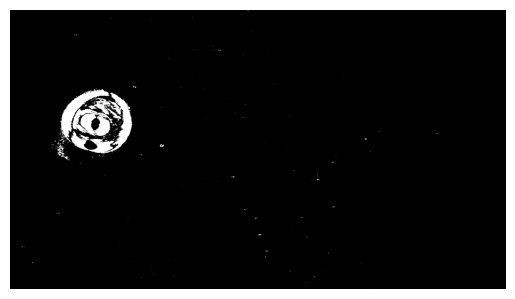

26
m1 23.41513439367713
m2 1.1425012000822914


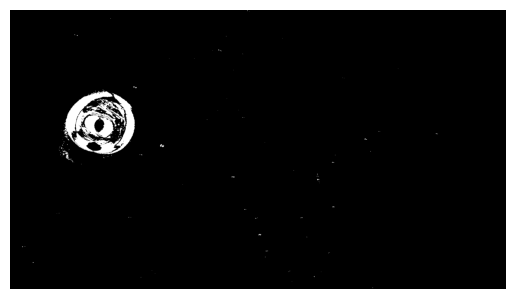

27
m1 24.24543022737405
m2 1.1405567745310812


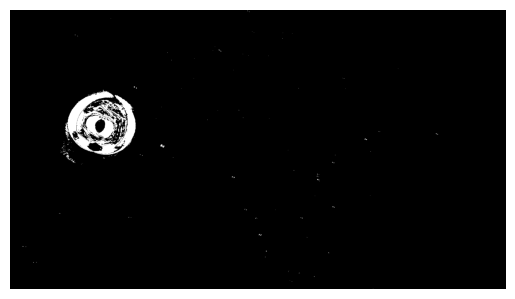

28
m1 24.62823716304546
m2 1.1103667898720873


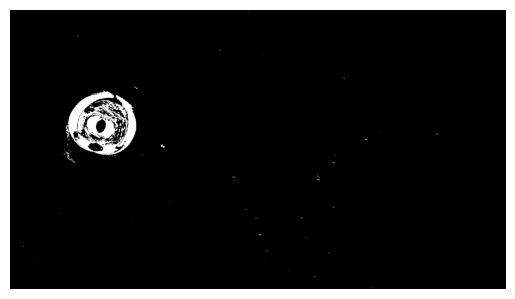

29
m1 25.13201736672052
m2 1.1091989975056797


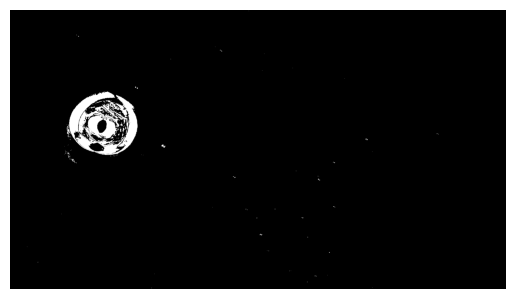

30
m1 23.270334028513794
m2 1.0189310516291483


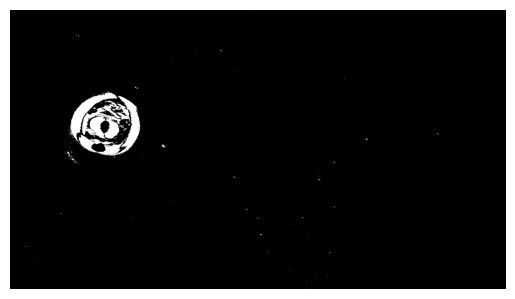

31
m1 24.487589183475734
m2 1.0567413794385758


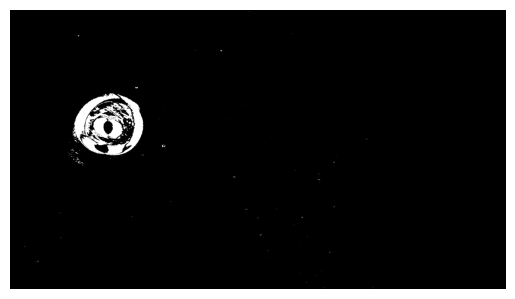

32
m1 26.08766790883092
m2 1.0544142705137396


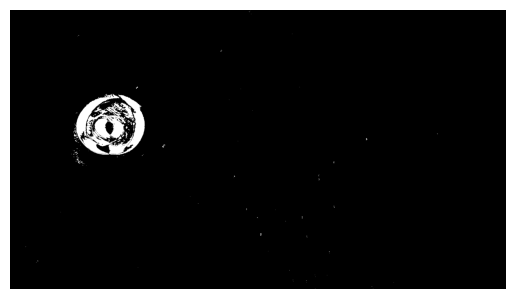

33
m1 27.154357840121065
m2 1.07487880357612


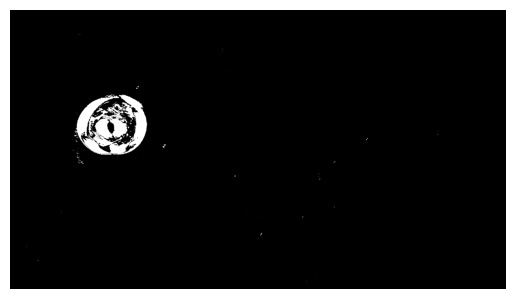

34
m1 27.855391225316037
m2 1.0291358785148168


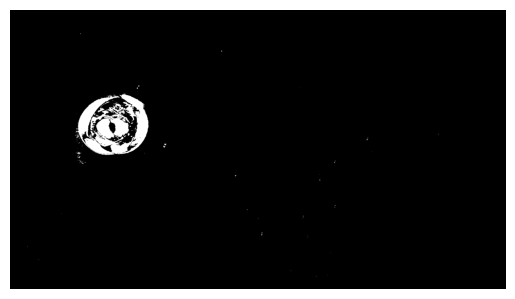

35
m1 25.998927799940084
m2 1.114388818110228


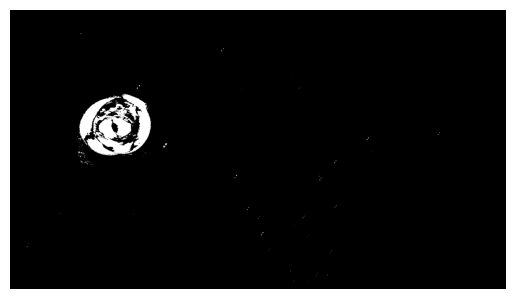

36
m1 26.07579542466474
m2 1.1561419389969554


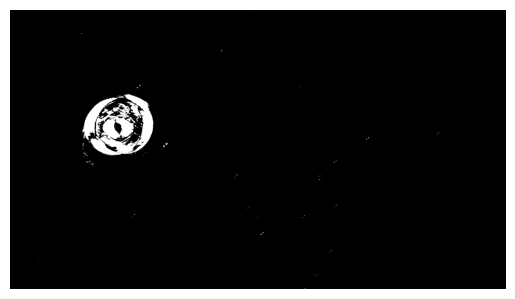

37
m1 26.582211197732104
m2 1.128966936035561


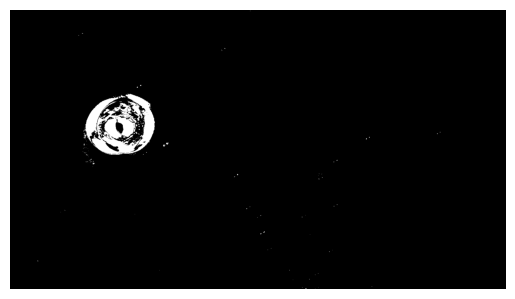

38
m1 26.15386489826467
m2 1.0768877467764006


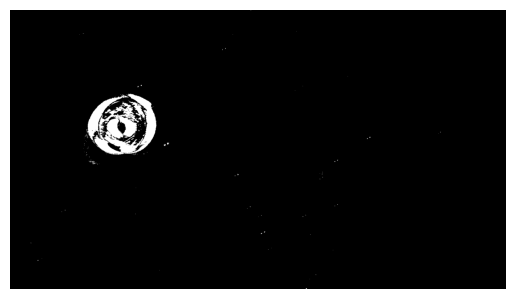

39
m1 26.343888823697046
m2 1.0598615554431174


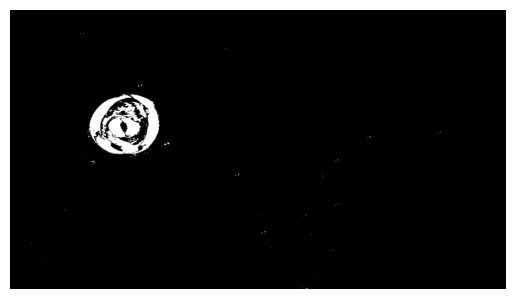

40
m1 27.277765211490614
m2 1.0684329618741506


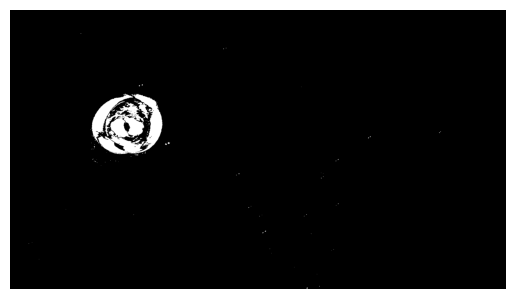

41
m1 27.802292017456445
m2 1.057067140088459


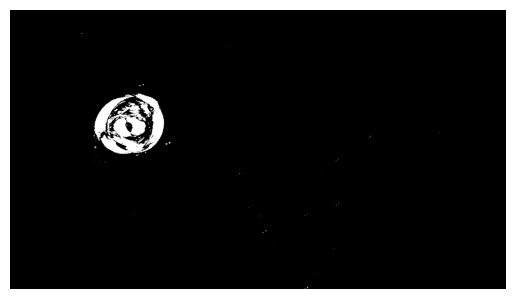

42
m1 28.18627033053515
m2 1.0340980459185296


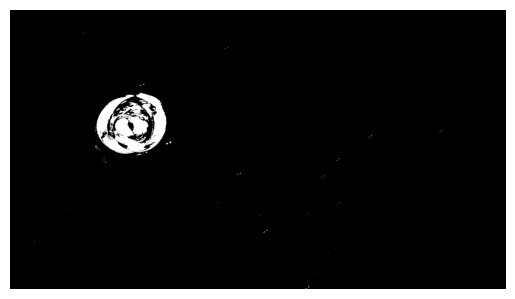

43
m1 28.648985028015066
m2 1.0367563654035945


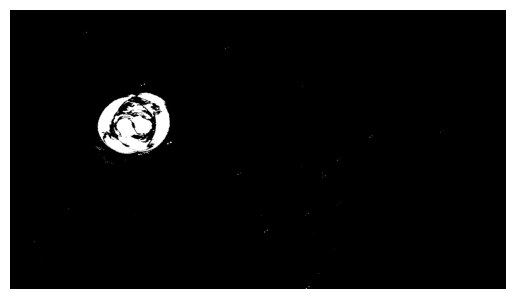

44
m1 28.659281607901413
m2 1.0637271242001038


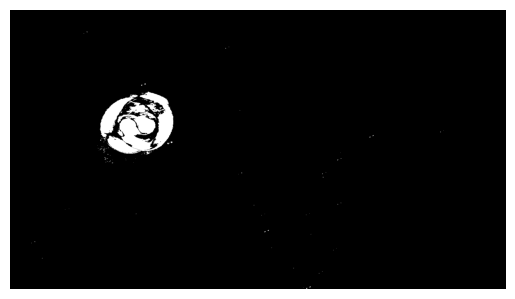

45
m1 29.72980479901242
m2 1.085361622266085


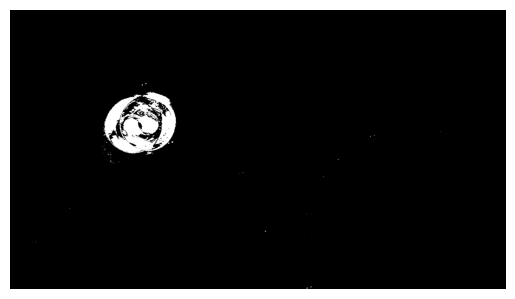

46
m1 29.906525886880317
m2 1.0737098074615485


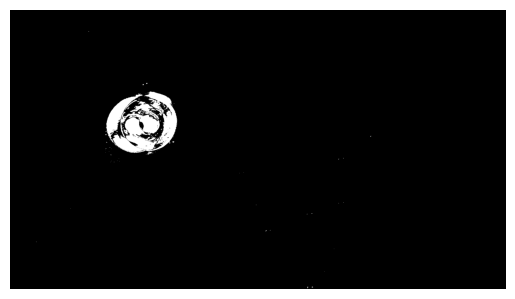

47
m1 28.356175545524177
m2 1.0798171388360318


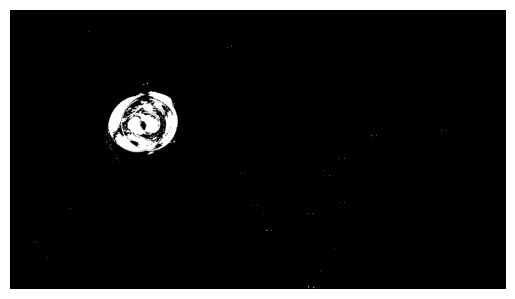

48
m1 25.30058866813834
m2 1.1029478600119538


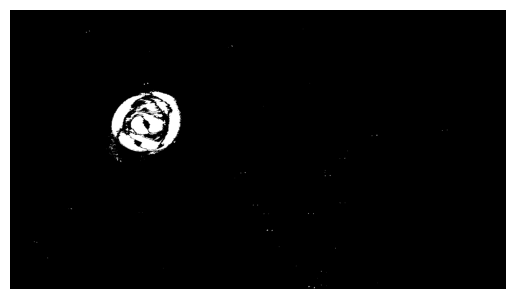

49
m1 27.70265403704152
m2 1.0825873020933374


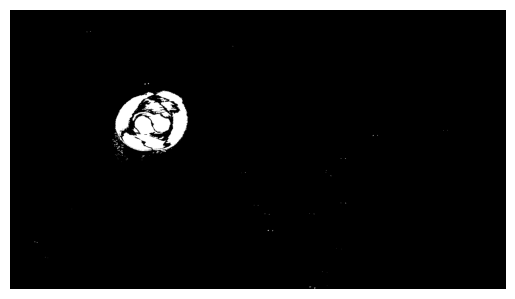

50
m1 31.09231552319842
m2 1.0700817615573326


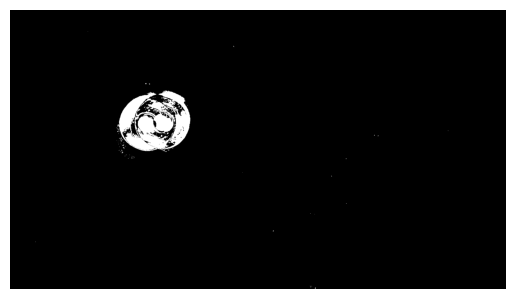

51
m1 31.266715387486006
m2 1.0430346470988727


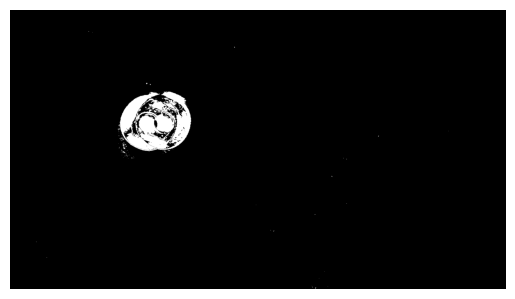

52
m1 30.956794104099494
m2 1.0245729336260936


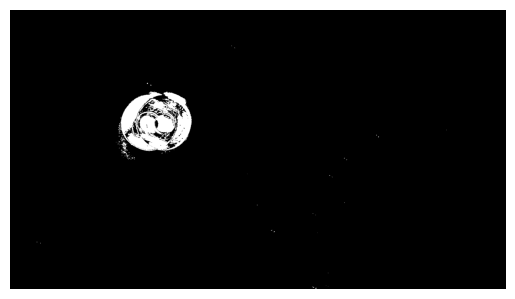

53
m1 27.648047610756738
m2 1.0426885711997635


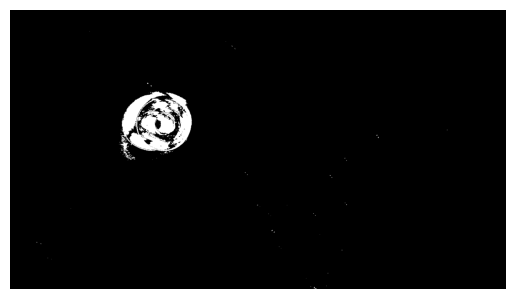

54
m1 21.45817862418653
m2 1.0561149806326247


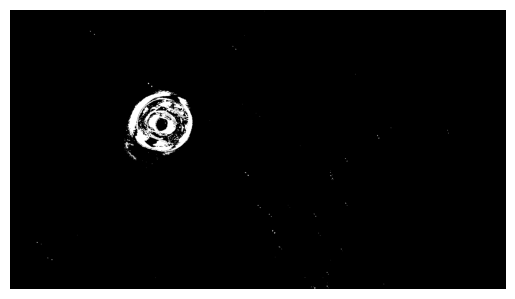

55
m1 20.90511900134891
m2 1.1405012461444404


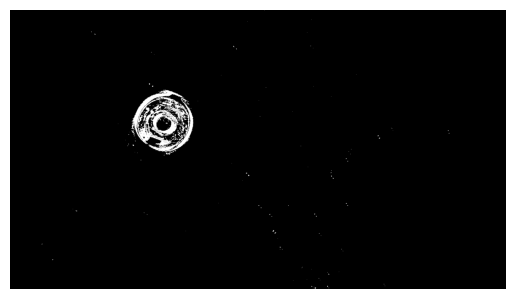

56
m1 19.605048255382332
m2 1.1199258308372557


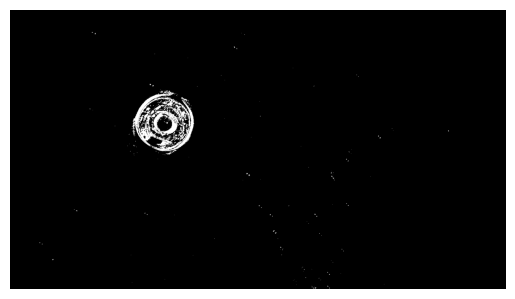

57
m1 21.13569229973358
m2 1.0641768623039807


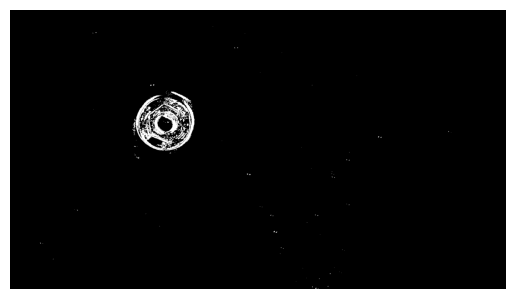

58
m1 23.356794104099492
m2 1.0402299303510034


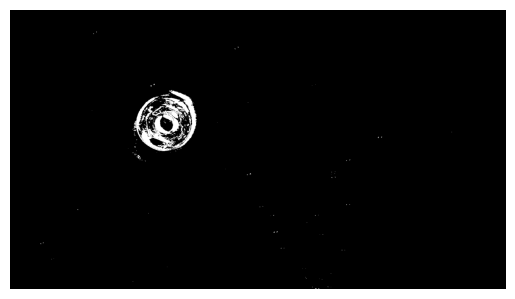

59
m1 27.638479162327457
m2 1.045416958838314


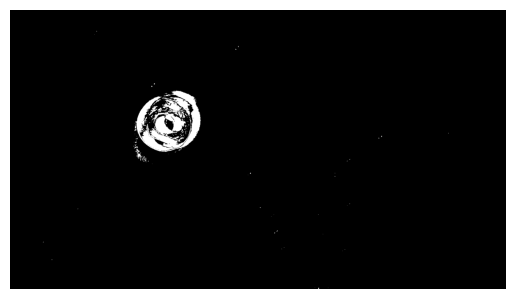

60
m1 28.98726279322291
m2 1.0275483843120172


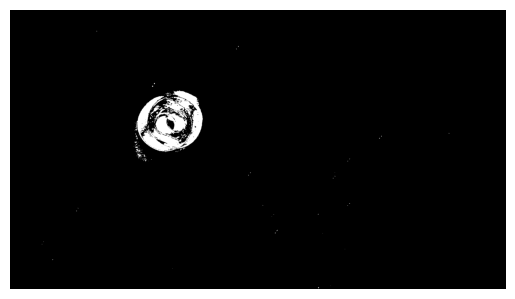

61
m1 28.819734220363266
m2 1.0989212930969814


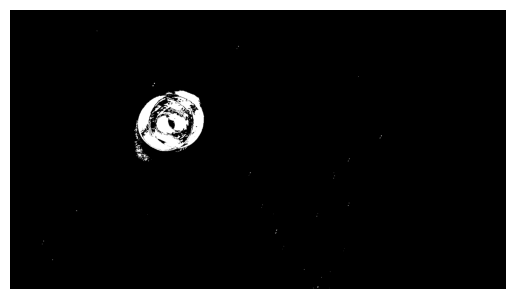

62
m1 30.038477329085445
m2 1.1012735584464108


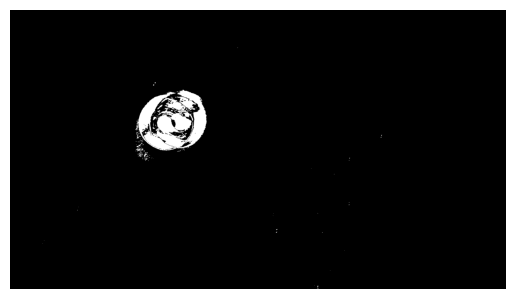

63
m1 29.65107884815914
m2 1.0577919866352767


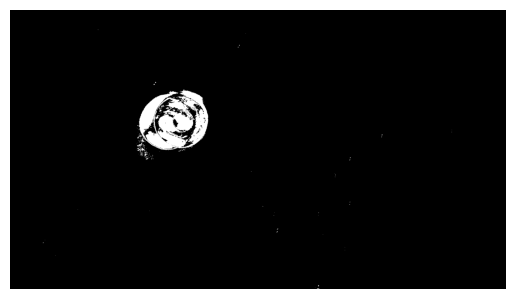

64
m1 26.284553277382344
m2 1.0382996169790424


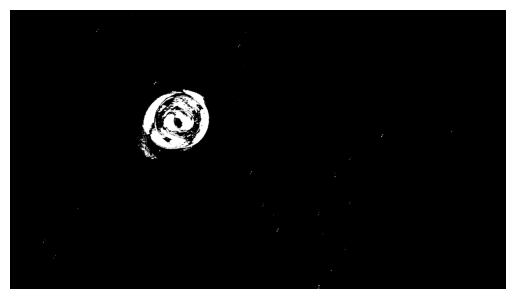

65
m1 26.02420513899113
m2 1.0730645370846983


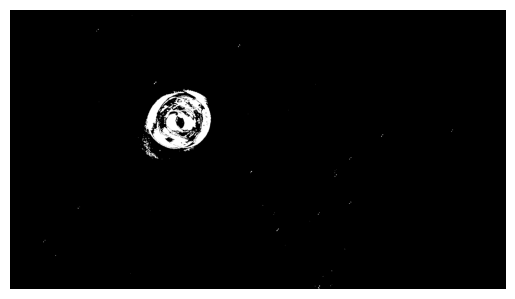

66
m1 25.601892421788424
m2 1.081336215132423


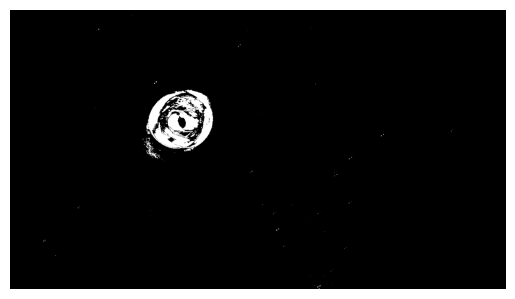

67
m1 25.843753827847483
m2 1.0489785777303016


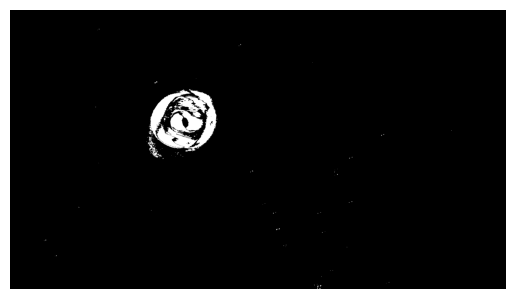

68
m1 27.974474131173242
m2 1.0095181398233326


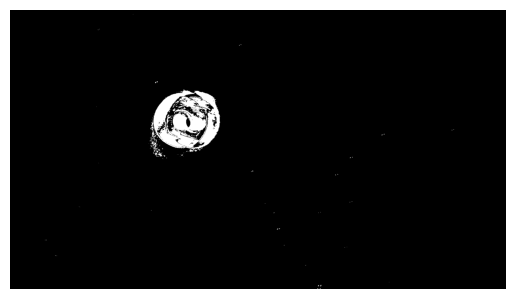

69
m1 28.714898502655036
m2 0.9890222682604559


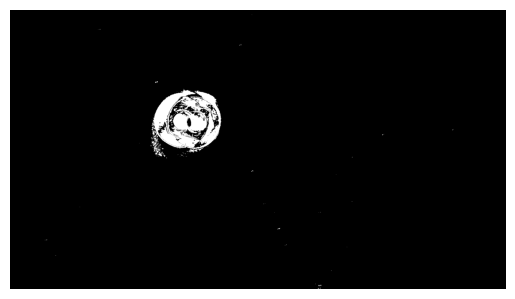

70
m1 26.917385440516888
m2 0.96983780750052


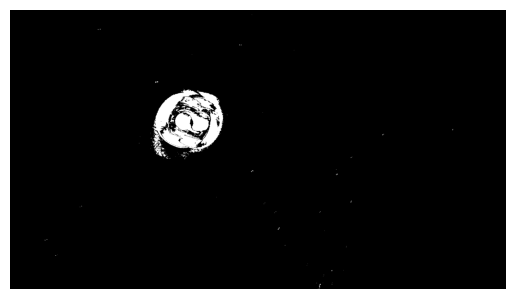

71
m1 28.732184414114094
m2 0.8959534408886749


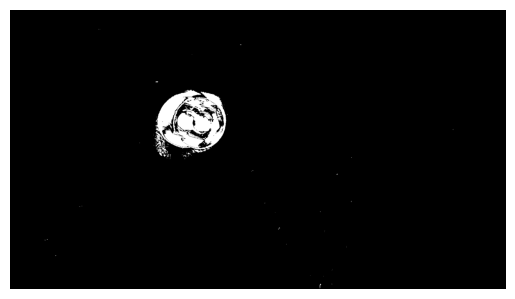

72
m1 27.81067884706253
m2 0.77973169799138


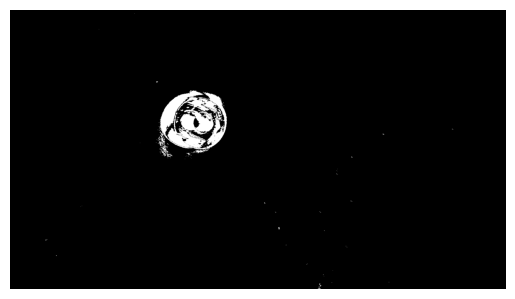

73
m1 26.708343030020945
m2 0.7151494829963463


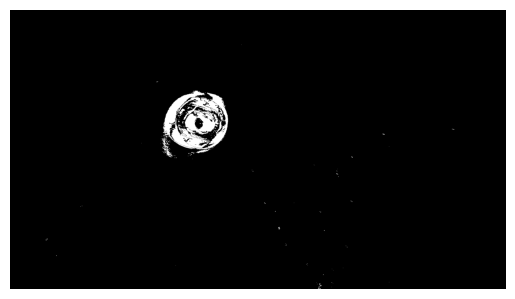

74
m1 27.026531423272715
m2 0.8058965031421393


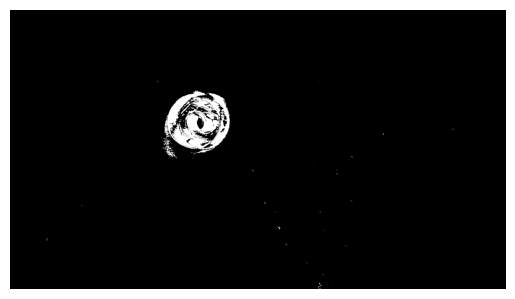

75
m1 26.48111546543988
m2 0.9095274644085276


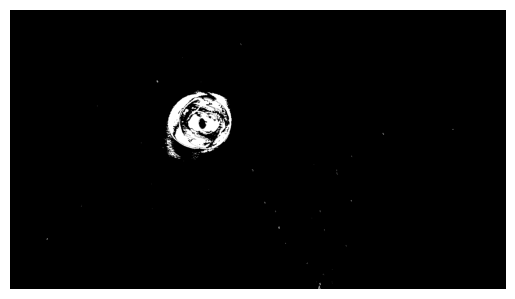

76
m1 25.608279934917544
m2 0.9662039601406649


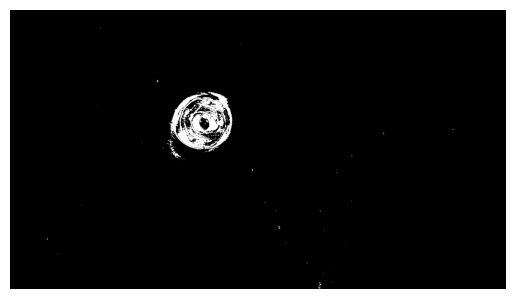

77
m1 25.020772946859903
m2 1.0111798600291813


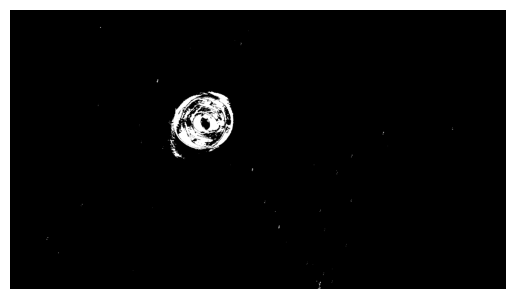

78
m1 25.649541114304256
m2 1.0394501068246467


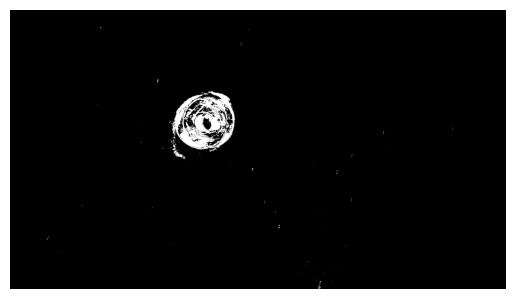

79
m1 22.842853588992863
m2 1.047145387992043


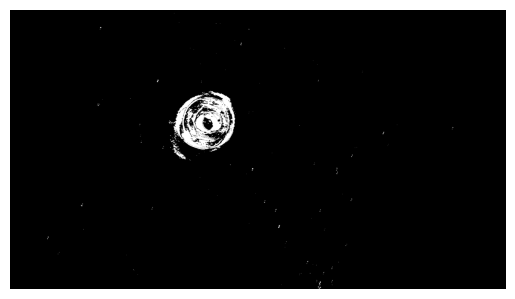

80
m1 21.439326029216467
m2 1.0352723994375455


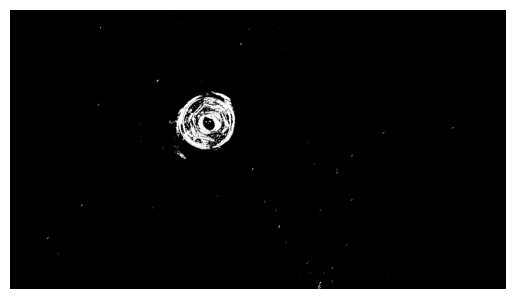

81
m1 22.50836014222824
m2 0.9862225319194295


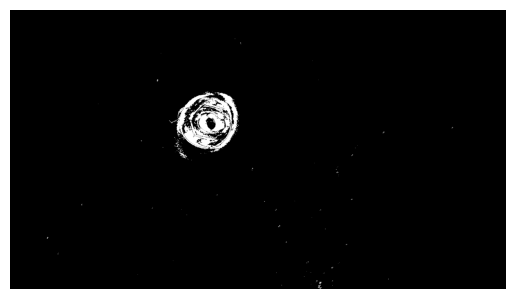

82
m1 27.145473511062967
m2 0.9390971904124474


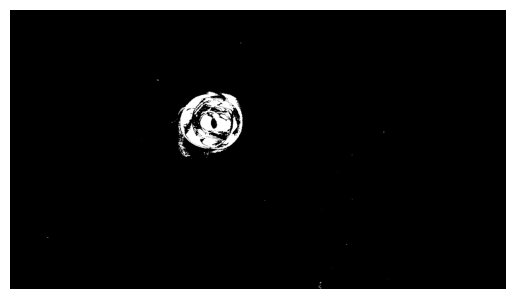

83
m1 28.49016469825578
m2 0.9367796359813599


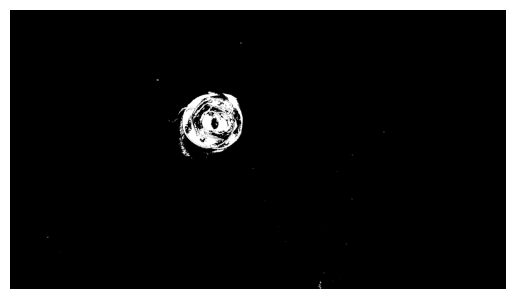

84
m1 27.774005366935015
m2 0.9794696203195176


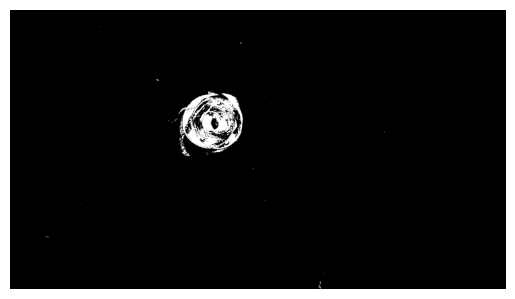

85
m1 25.437567103285378
m2 1.1090277323468714


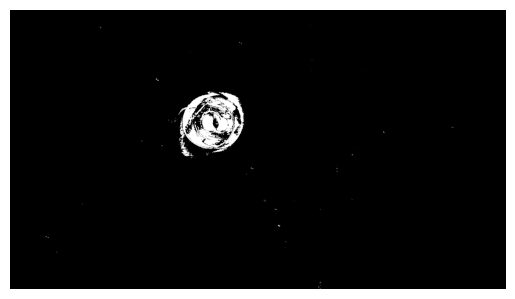

86
m1 23.869039054881462
m2 1.1296011480586978


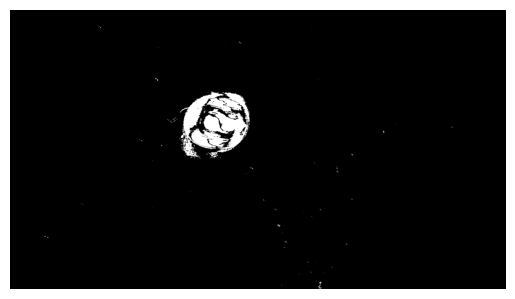

87
m1 24.904093431238994
m2 1.1032836894297524


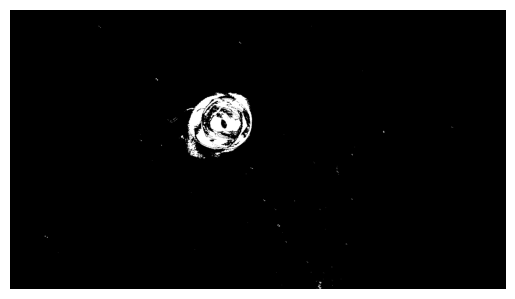

88
m1 25.64374927816001
m2 1.1276423987986037


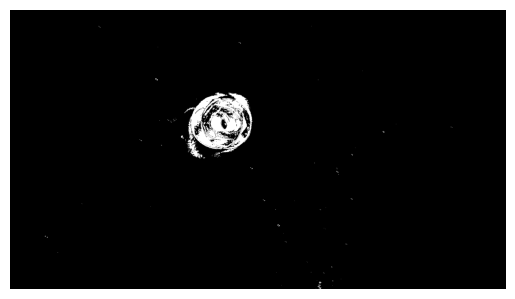

89
m1 25.54722154222766
m2 1.155296982346291


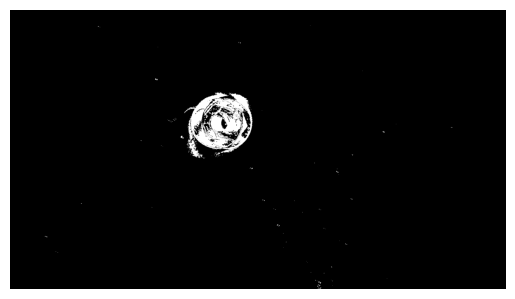

90
m1 25.094404303570485
m2 1.0257458036997755


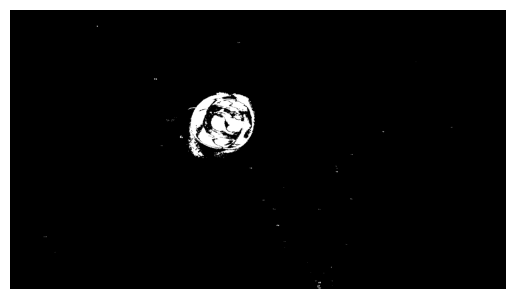

91
m1 23.881641251258344
m2 1.0935816487273498


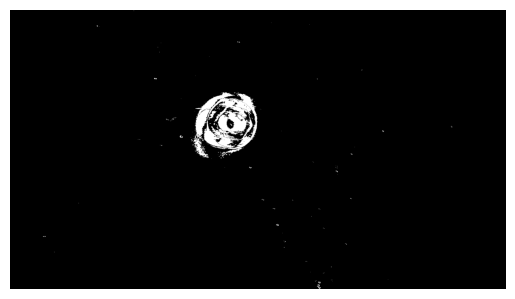

92
m1 23.041836571519948
m2 1.0824863162763667


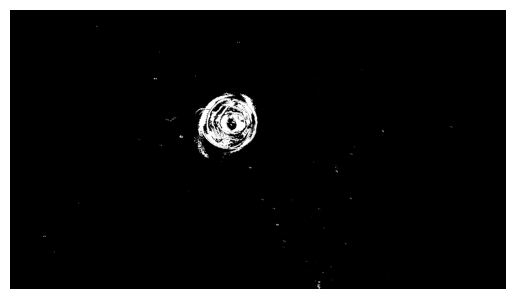

93
m1 23.081574992485724
m2 1.0402867032828564


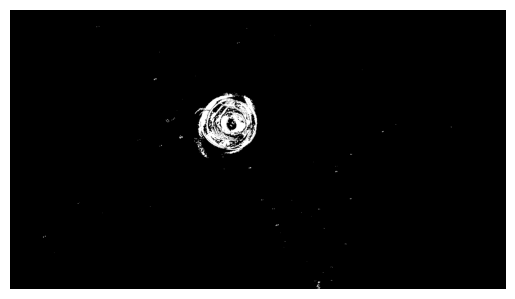

94
m1 21.844764055628193
m2 1.0515806758069954


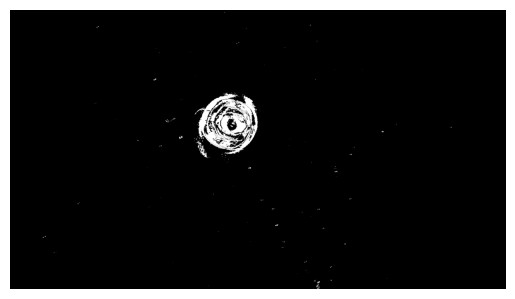

95
m1 21.4939406430338
m2 0.9899100282457977


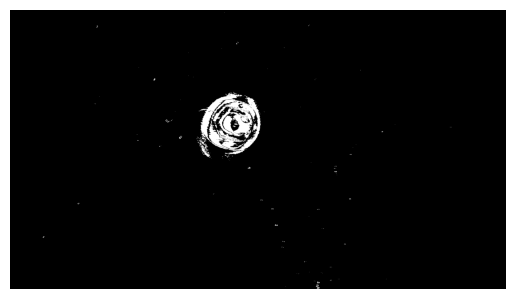

96
m1 22.395756220185664
m2 0.9723218915326589


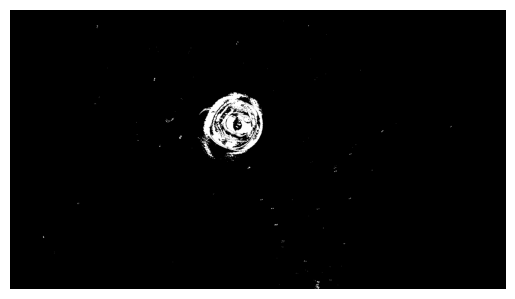

97
m1 24.146585786632535
m2 0.978635861984965


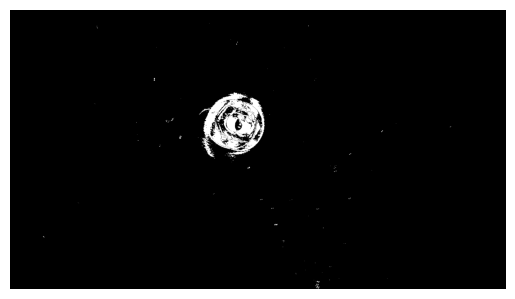

98
m1 26.435652400252852
m2 0.9068463729828589


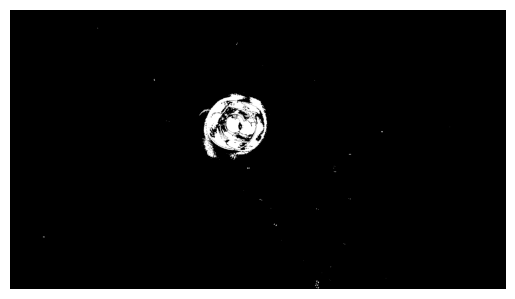

99
m1 27.624413145539908
m2 0.7789979614005327


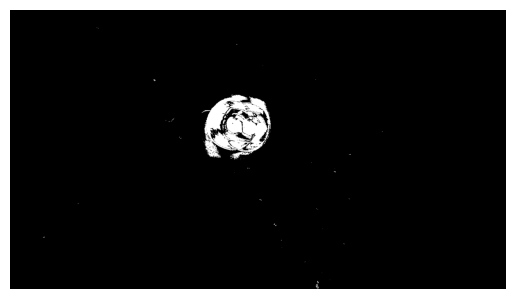

100
m1 28.397410449256096
m2 0.7445899240446885


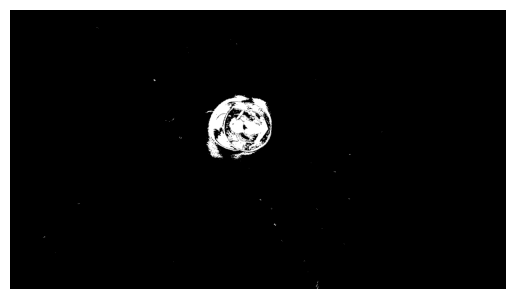

101
m1 26.785968558178915
m2 0.8209277558565337


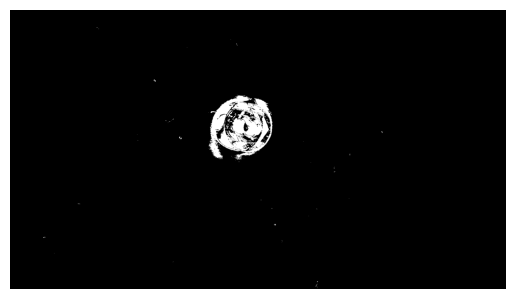

102
m1 25.55972062265483
m2 1.0565322913644453


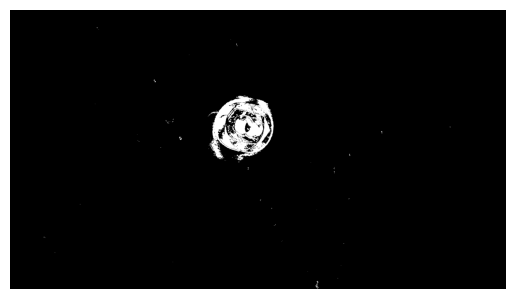

103
m1 24.478366951630626
m2 1.0673500637900024


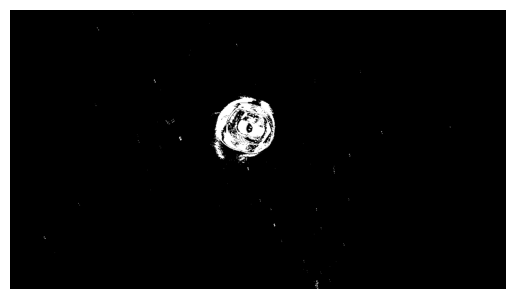

104
m1 17.000203864692093
m2 1.3711736138023978


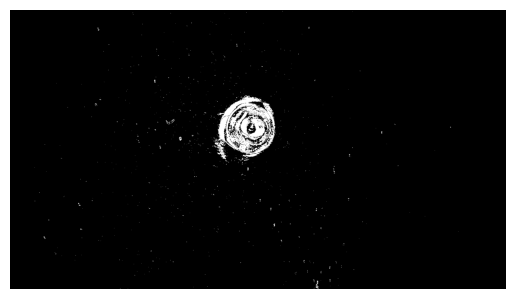

105
m1 15.271604208535289
m2 1.56418620318651


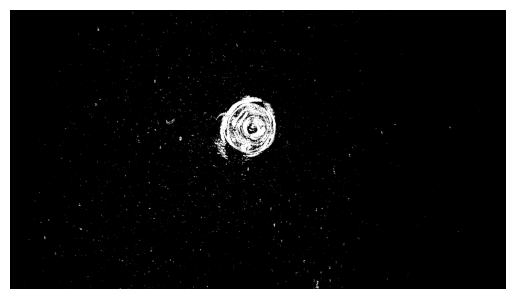

106
m1 14.98840162841137
m2 1.67839231631982


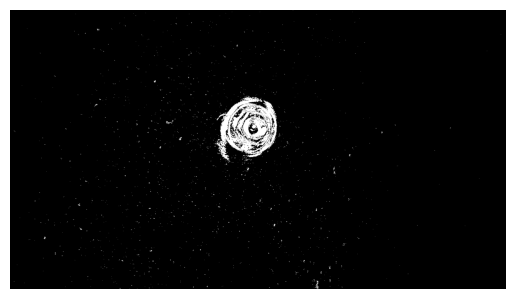

107
m1 17.008810713316628
m2 1.6951842140203457


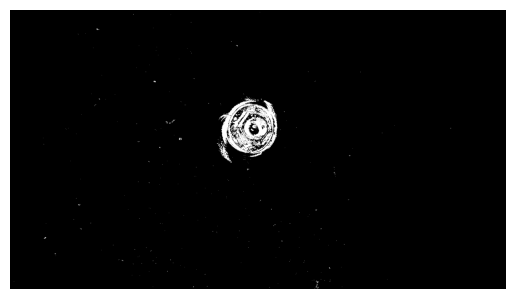

108
m1 16.62989737188822
m2 1.83172463535187


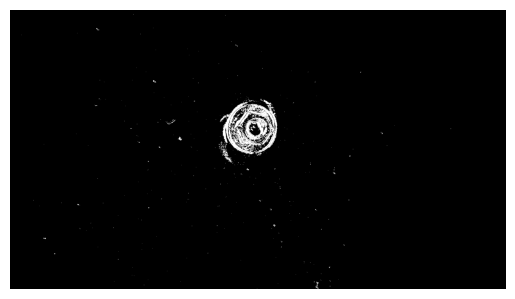

109
m1 19.733171739648732
m2 1.450501861345111


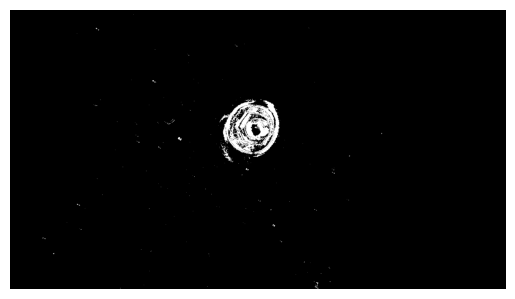

110
m1 20.7530920453066
m2 1.3743335493541244


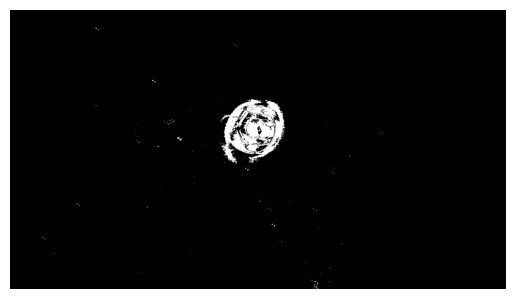

111
m1 22.62488076556202
m2 1.3461795816194548


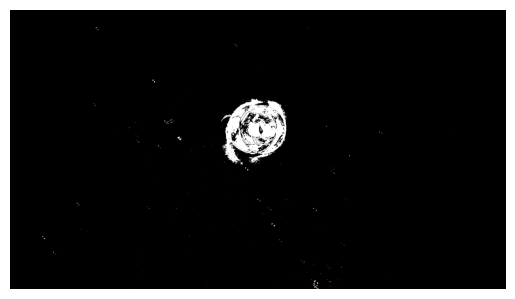

112
m1 23.938191672346086
m2 1.2685571483528117


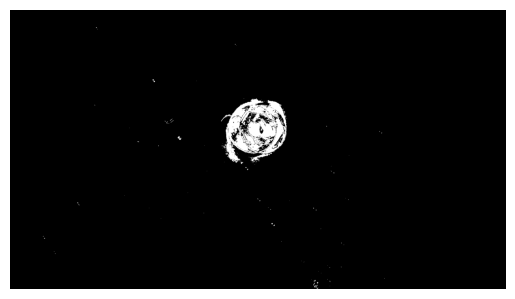

113
m1 23.75066151696935
m2 1.253195744141736


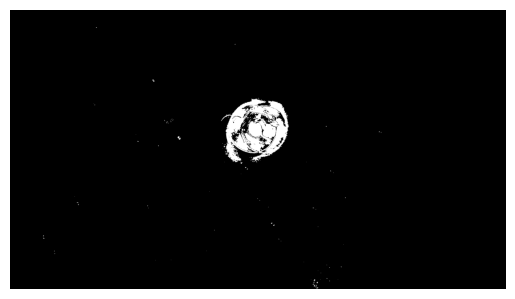

114
m1 24.81110231371514
m2 1.1226915381811962


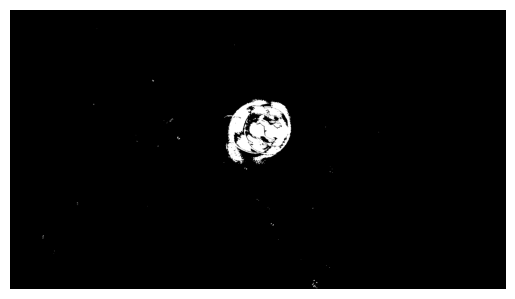

115
m1 24.114555848724713
m2 1.1177615622275856


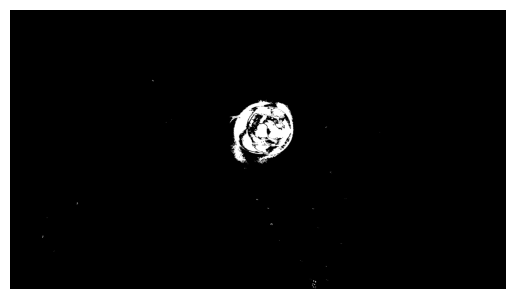

116
m1 26.224672405750393
m2 1.0395605491014281


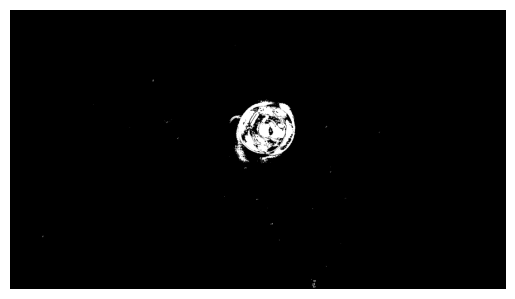

117
m1 26.405748164435195
m2 1.0054413441296668


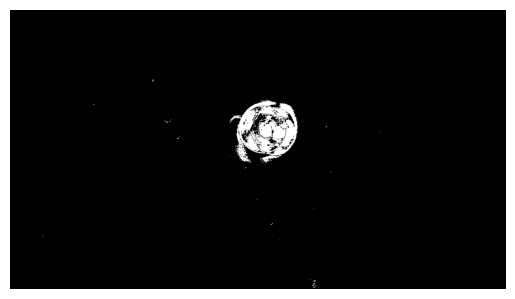

118
m1 25.52805441767823
m2 0.9755546228386514


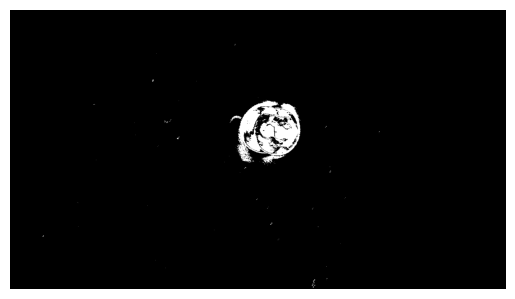

119
m1 25.934879052494228
m2 1.0099956270058332


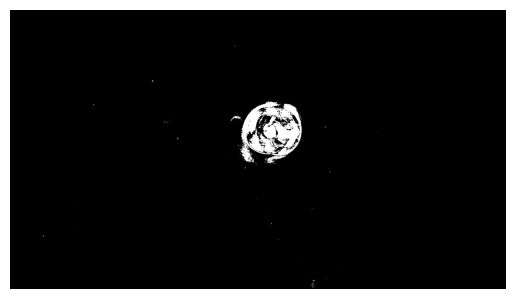

120
m1 25.998204480447626
m2 0.8677071614150742


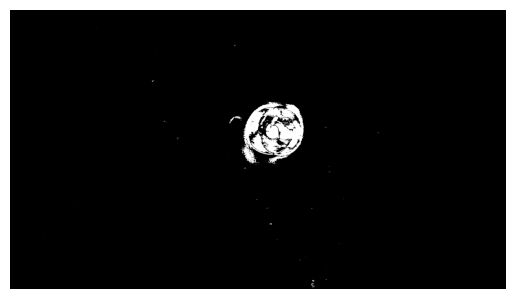

121
m1 25.919272727272727
m2 0.9465401907020404


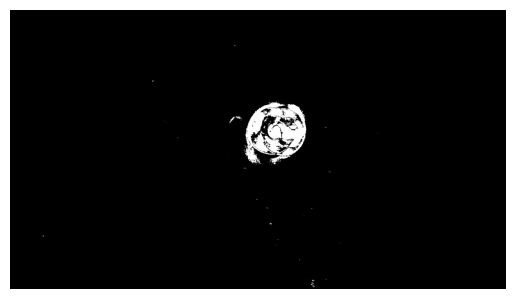

122
m1 25.568103235366756
m2 1.0126137524123313


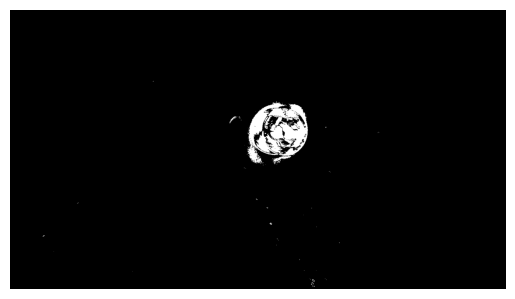

123
m1 24.982705765449587
m2 1.0610590430543143


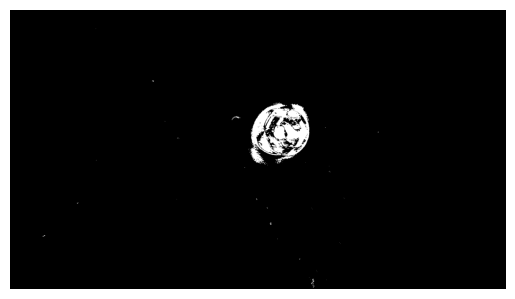

124
m1 24.6290077900779
m2 1.0105095761598561


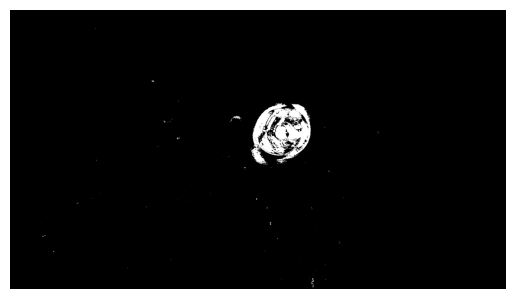

125
m1 23.295313617934653
m2 0.9909587581377602


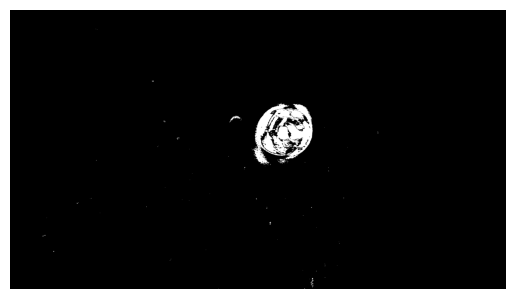

126
m1 23.090793637994636
m2 1.0693614058941903


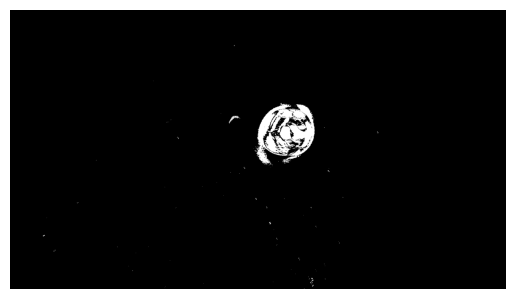

127
m1 23.13018050401228
m2 1.097015379304922


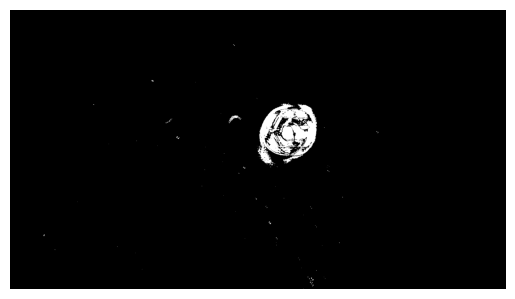

128
m1 22.754475251373943
m2 1.1478455000989087


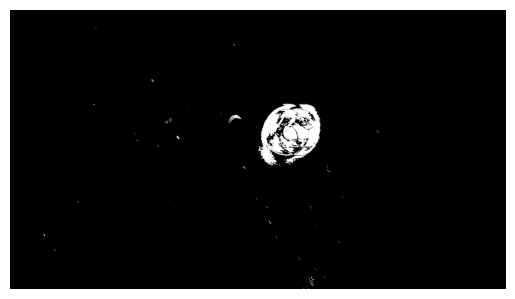

129
m1 23.111281019895948
m2 1.1908820588873652


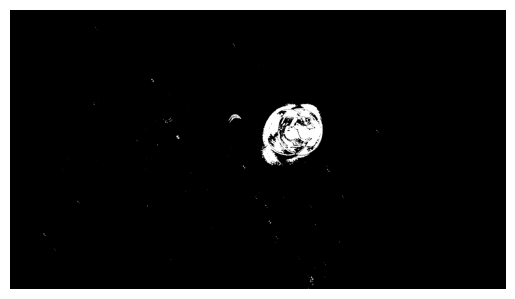

130
m1 21.795775209246713
m2 1.2339051407969168


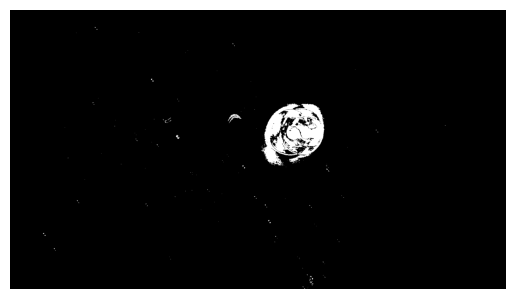

131
m1 22.02350310479071
m2 1.1841578015330325


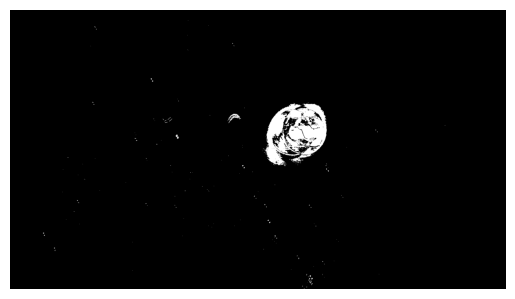

132
m1 21.91080430986194
m2 1.2294309409996116


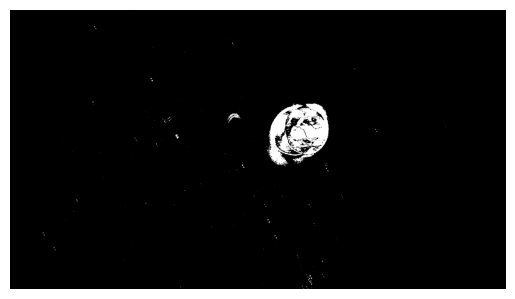

133
m1 20.90035173824131
m2 1.2672867985937712


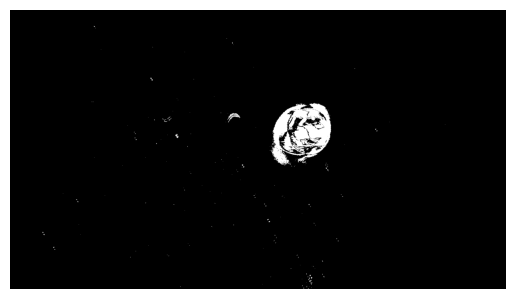

134
m1 21.20879599741769
m2 1.2910729553995746


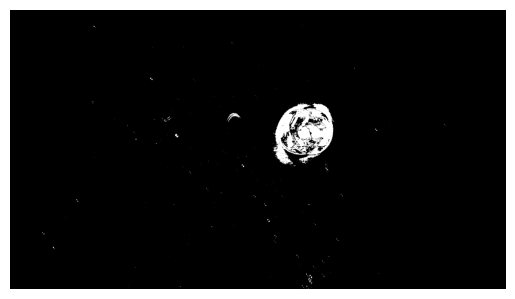

135
m1 21.97515796015606
m2 1.2025957570519836


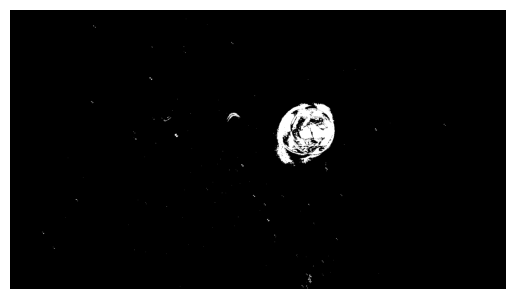

136
m1 21.644441679405595
m2 1.2338383873433458


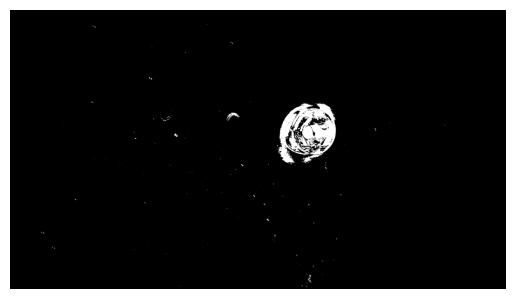

137
m1 21.918151088153746
m2 1.1885783956194687


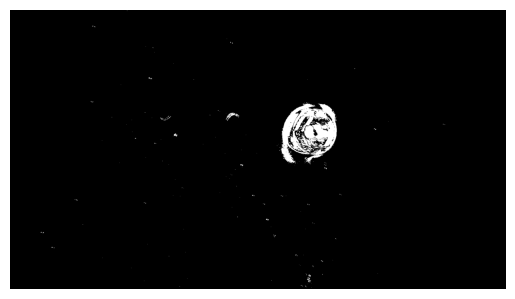

138
m1 19.88361313868613
m2 1.2091940756885278


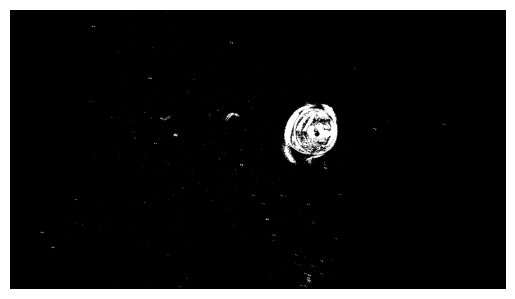

139
m1 18.602664716584027
m2 1.2390889075475309


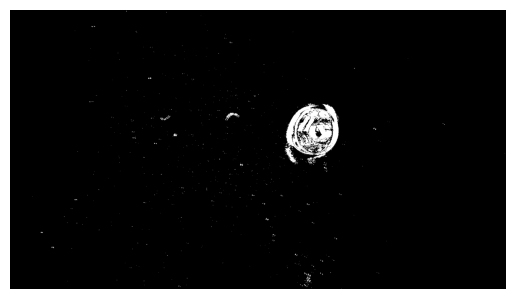

140
m1 19.591546748130877
m2 1.1896178756860707


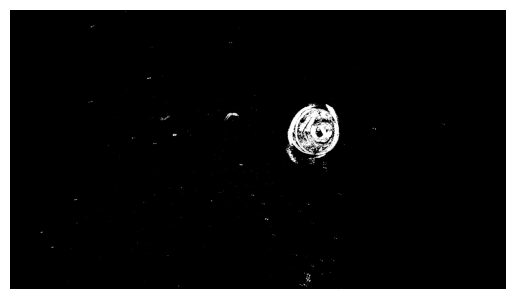

141
m1 18.73478790563739
m2 1.1950883800725183


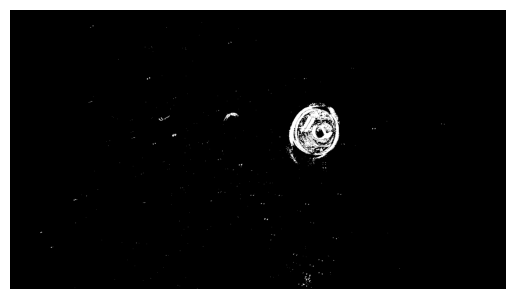

142
m1 18.84733791679377
m2 1.1684046592216675


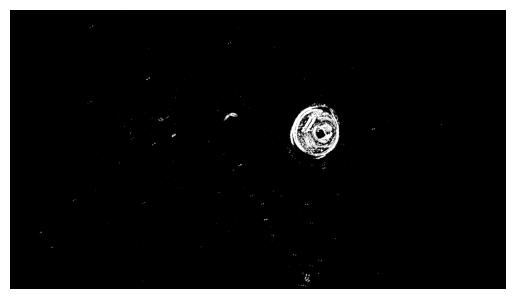

143
m1 17.632027367198088
m2 1.186036748669665


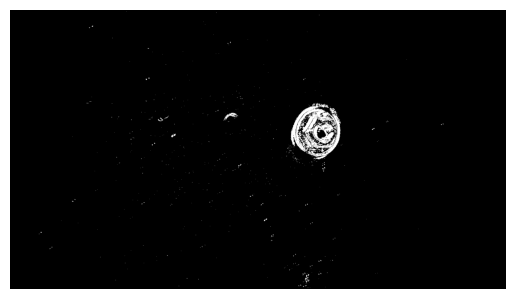

144
m1 16.97207821207355
m2 1.1958771553717202


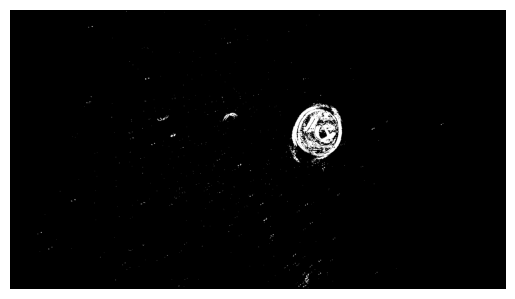

145
m1 18.71024246335392
m2 1.2657662185885168


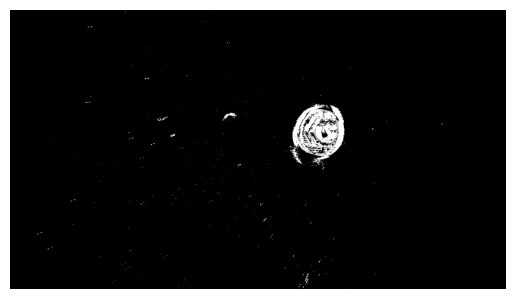

146
m1 20.29908525168952
m2 1.2303135682984894


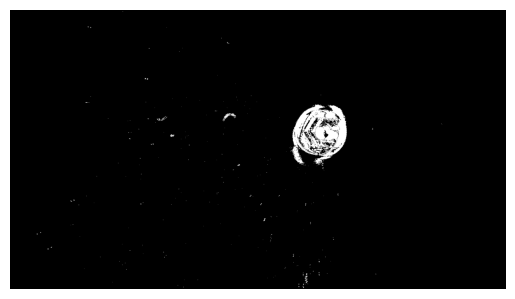

147
m1 22.13693510640228
m2 1.2056320625579955


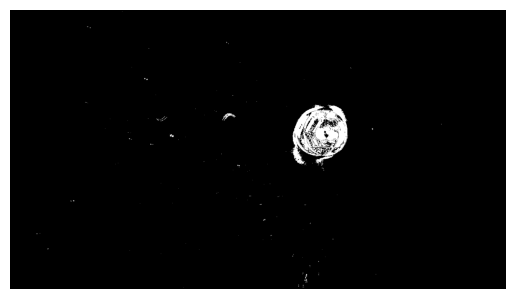

148
m1 21.305032740879327
m2 1.177613048536


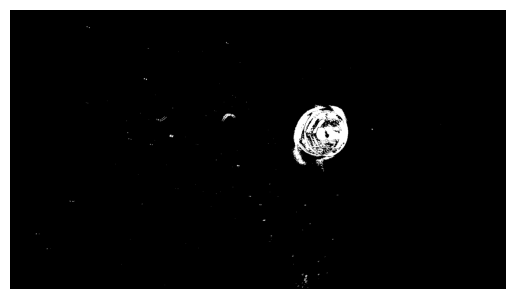

149
m1 20.80868898053131
m2 1.1549890797020972


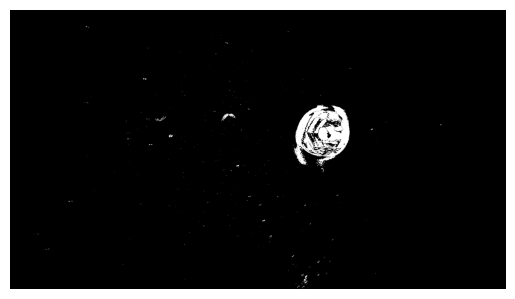

150
m1 20.239244967662234
m2 1.0962985421261535


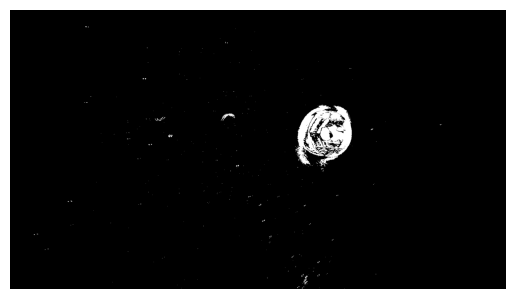

151
m1 18.71801807856447
m2 1.1911297553922828


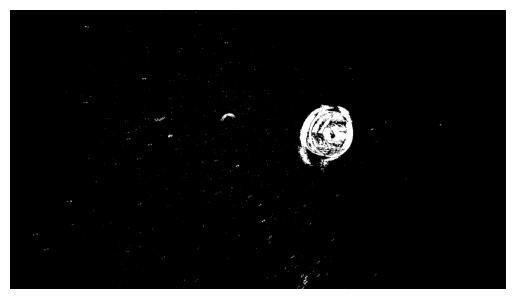

152
m1 19.44361933051525
m2 1.222297149223611


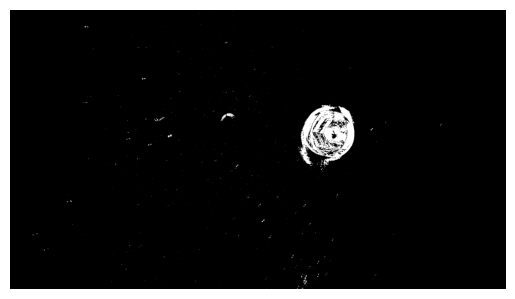

153
m1 19.794101749881765
m2 1.2193099072873457


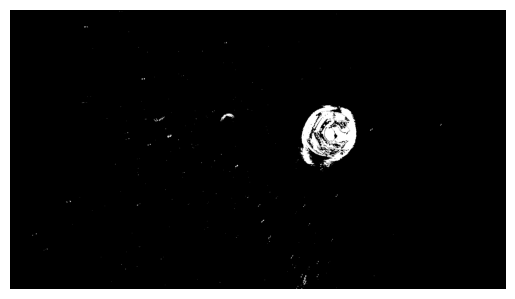

154
m1 20.739201749589938
m2 1.195388503874423


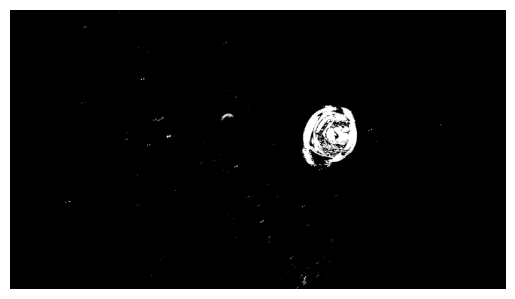

155
m1 19.222630549463577
m2 1.254177115325012


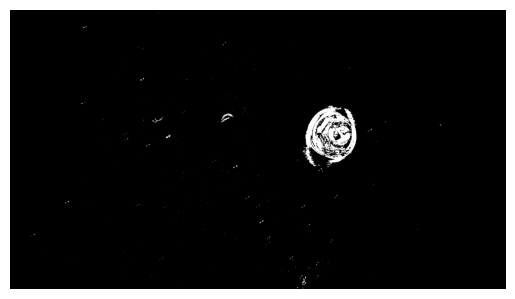

156
m1 16.94391166469262
m2 1.2793750810140636


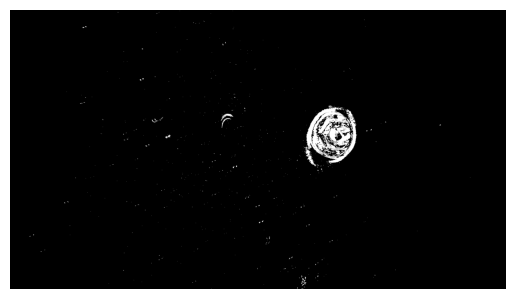

157
m1 17.71149381760706
m2 1.3081645397625175


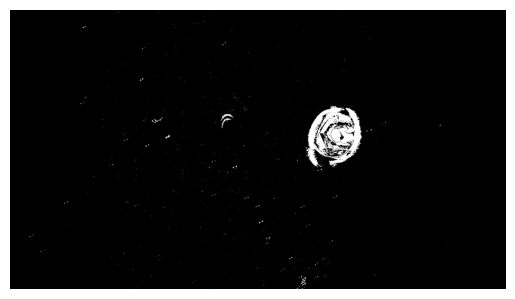

158
m1 19.049103898175886
m2 1.3003080028693395


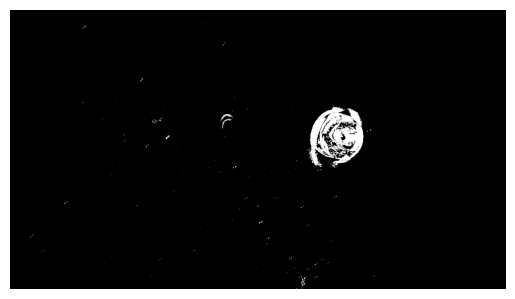

159
m1 21.571116383616385
m2 1.2325608031785904


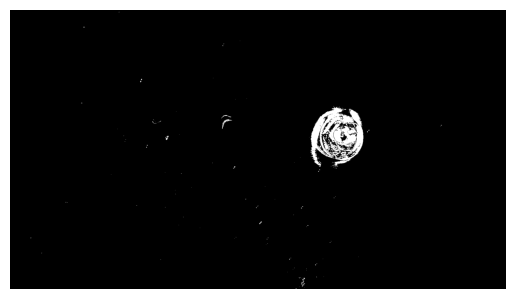

160
m1 23.27275751191928
m2 1.1453735632892204


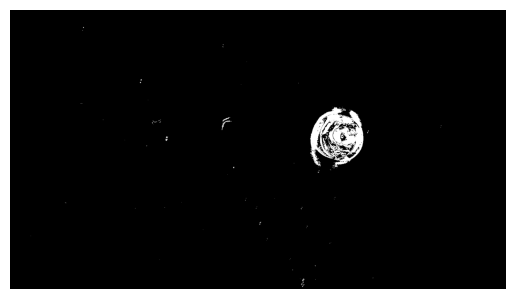

161
m1 22.286226391904627
m2 1.1558829543131064


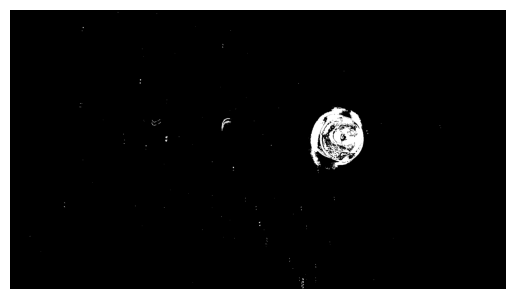

162
m1 18.44722899672021
m2 1.2048058376060444


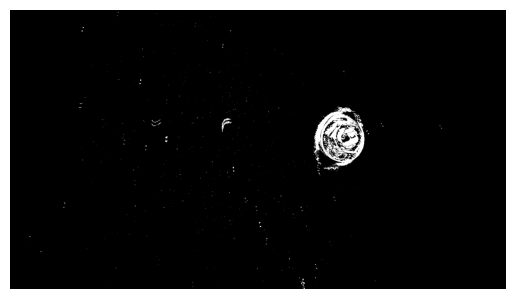

163
m1 18.227468906627067
m2 1.221170211927679


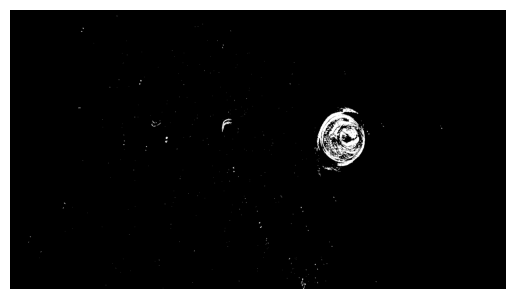

164
m1 18.525634351162317
m2 1.2414802054379057


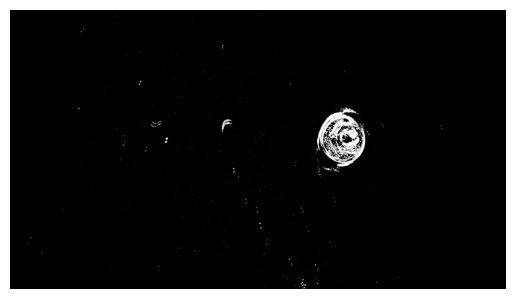

165
m1 18.36761580960476
m2 1.23655146209796


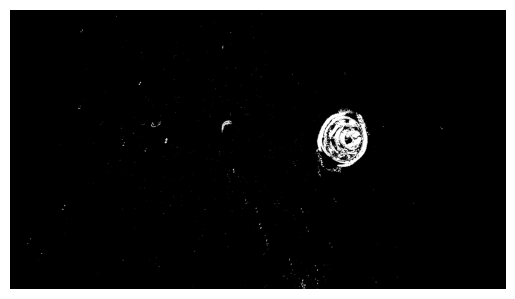

166
m1 19.779891792609156
m2 1.216767292097745


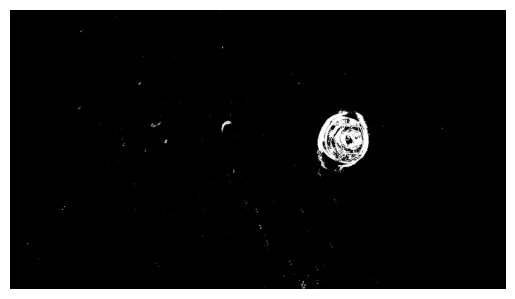

167
m1 19.645232632645047
m2 1.1631596385378569


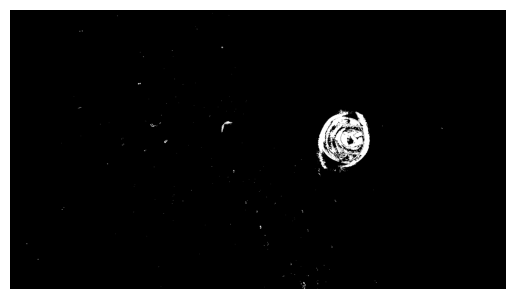

168
m1 20.982733784557098
m2 1.1716703997136817


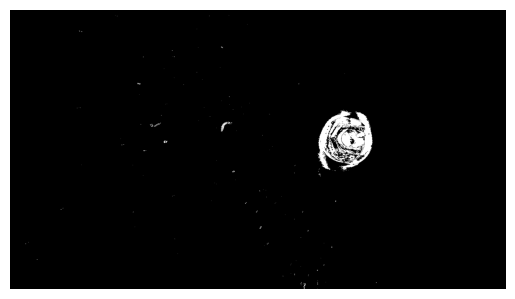

169
m1 22.37688957708313
m2 1.132197622574415


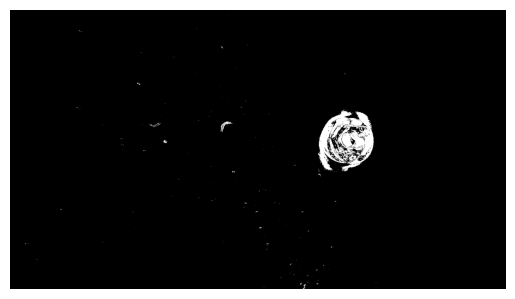

170
m1 20.45998412068281
m2 1.1201945413746404


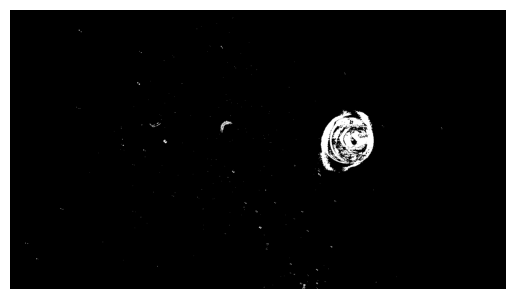

171
m1 19.921158333652116
m2 1.1972020236301264


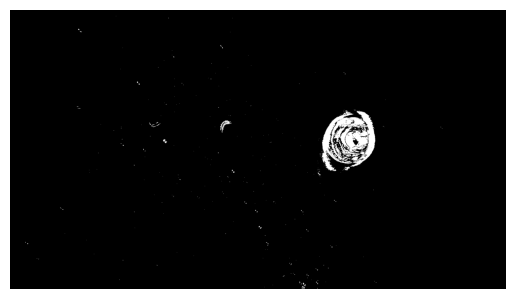

172
m1 20.14025594288752
m2 1.2028484877274446


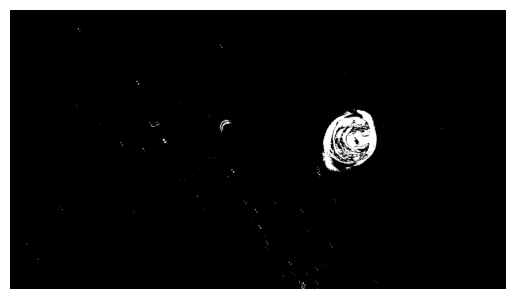

173
m1 19.21582677929896
m2 1.2437143471778171


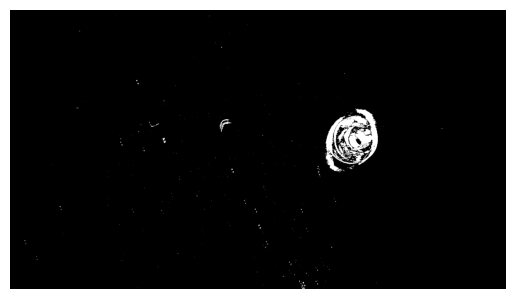

174
m1 20.601516657894223
m2 1.2517412079198815


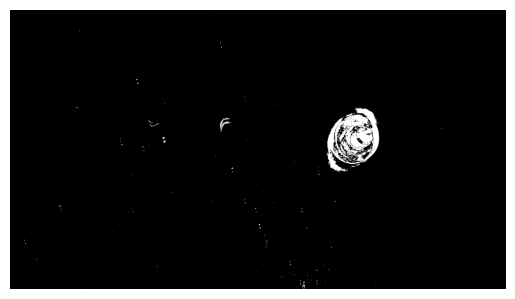

175
m1 21.69614336537734
m2 1.2581172590852137


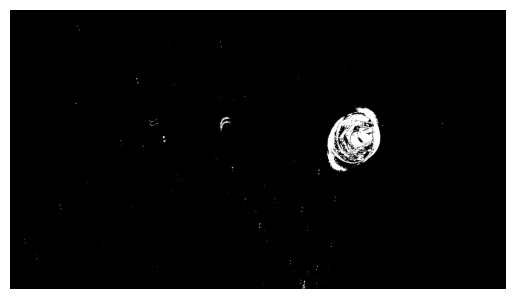

176
m1 20.2153125
m2 1.2333351463607596


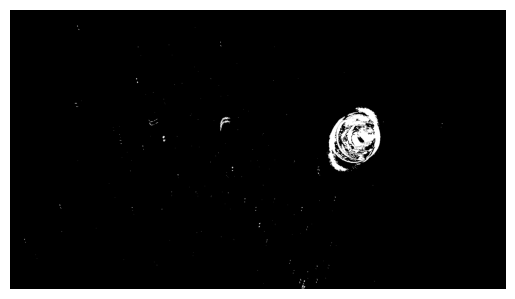

177
m1 19.05564318261479
m2 1.260468689594231


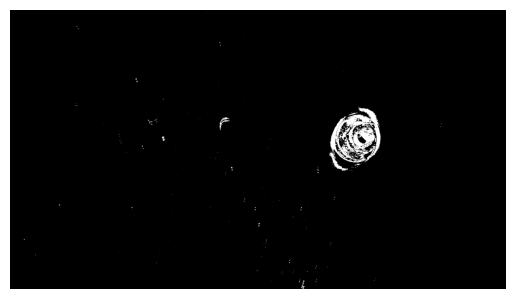

178
m1 16.70895298932029
m2 1.2372020197450337


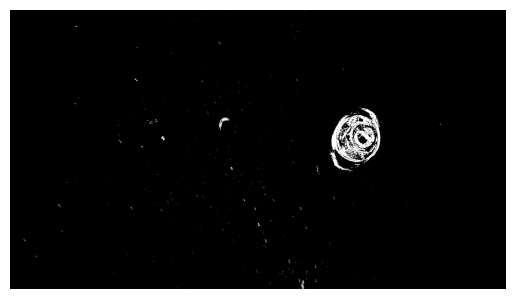

179
m1 17.35601150861693
m2 1.1882064995382973


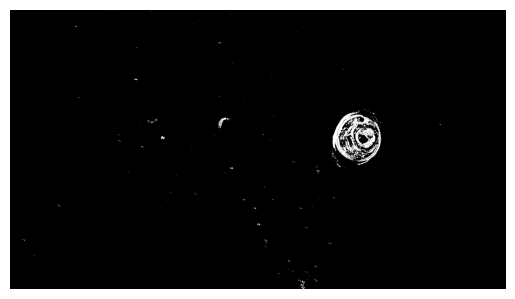

180
m1 17.2123081066523
m2 1.1779638295678305


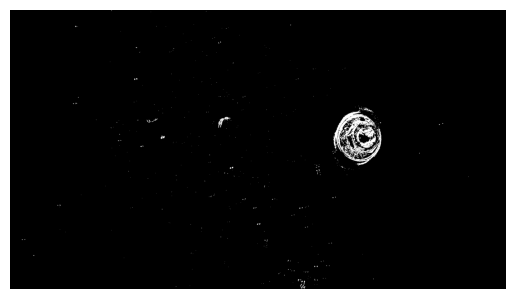

181
m1 16.05508915210389
m2 1.2275597994860812


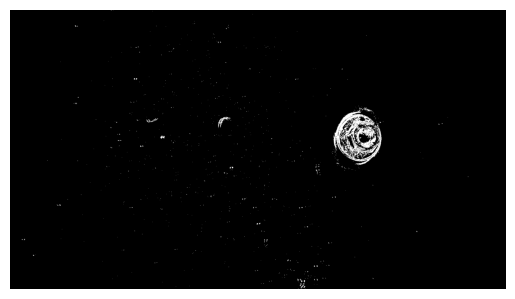

182
m1 16.85030031558587
m2 1.2252711978717088


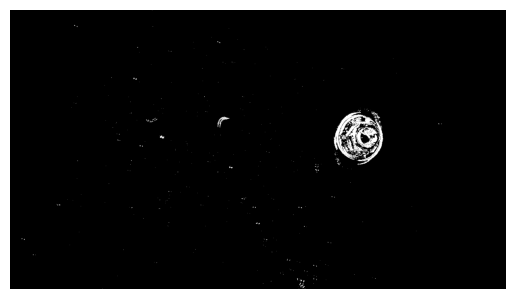

183
m1 19.965835747029445
m2 1.1973373114856833


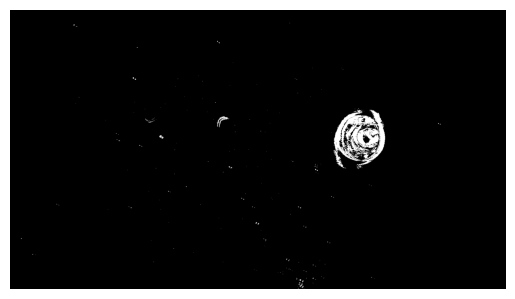

184
m1 21.001881014873142
m2 1.1434458646468233


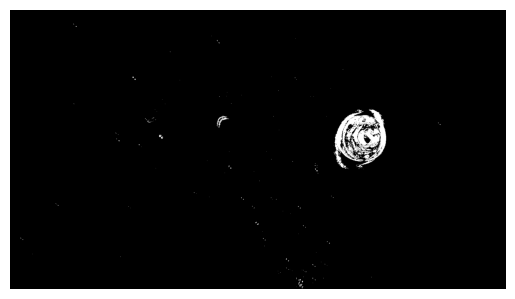

185
m1 20.220987223919774
m2 1.213609786861856


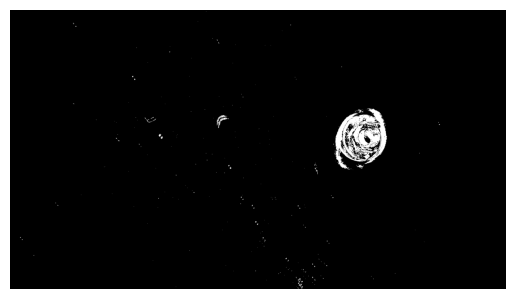

186
m1 19.45580416905718
m2 1.2536449134472198


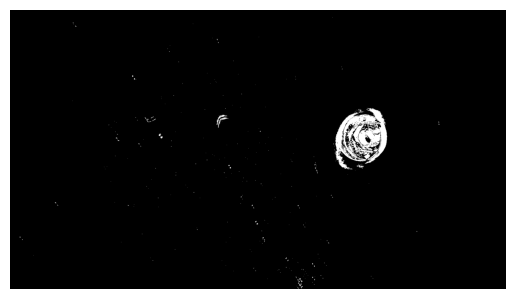

187
m1 18.794573571627
m2 1.248108912386333


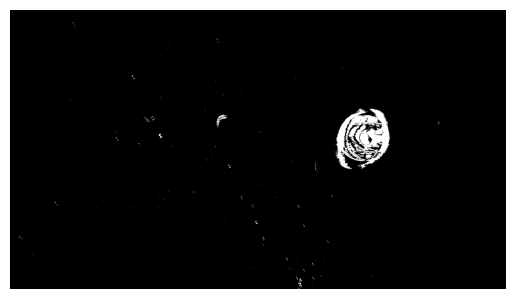

188
m1 19.35773923024233
m2 1.2399663692950476


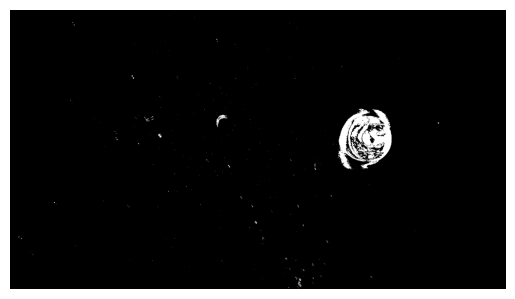

189
m1 20.526553627915202
m2 1.2023460686022613


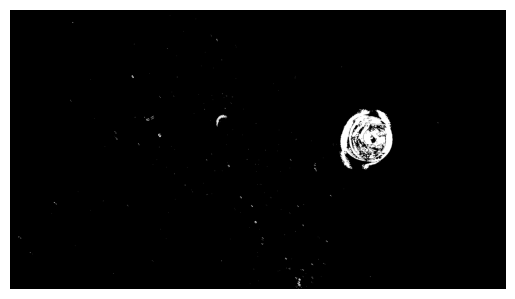

190
m1 22.63829646602626
m2 1.1141369837078174


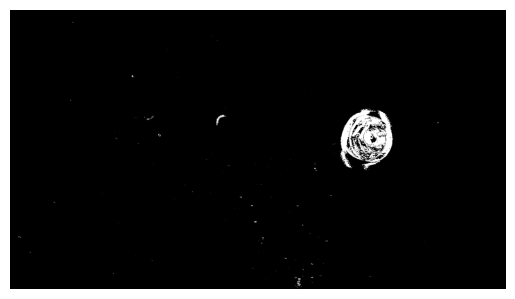

191
m1 21.80432202440936
m2 1.1189021880829693


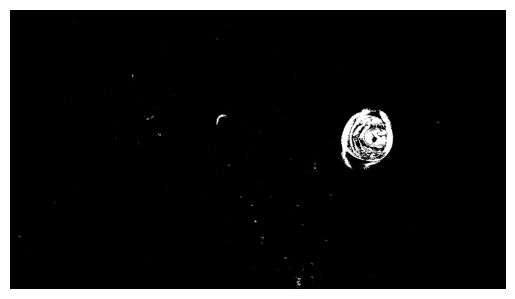

192
m1 19.552348247651754
m2 1.160920806582695


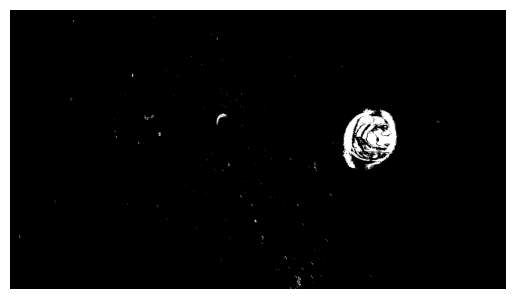

193
m1 20.547543879430226
m2 1.1762945298571659


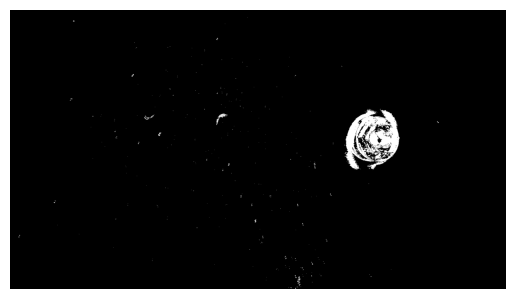

194
m1 19.223175889712778
m2 1.2077648378136259


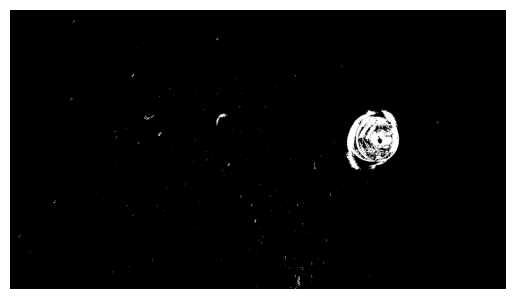

195
m1 18.991389141393274
m2 1.2933776100978842


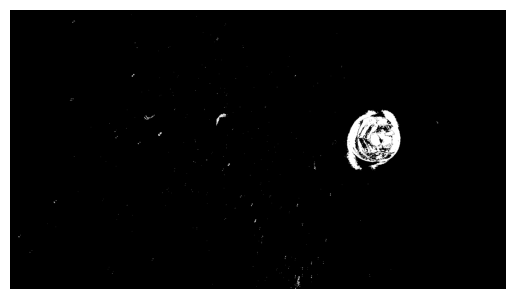

196
m1 20.427237080605185
m2 1.2370418126161777


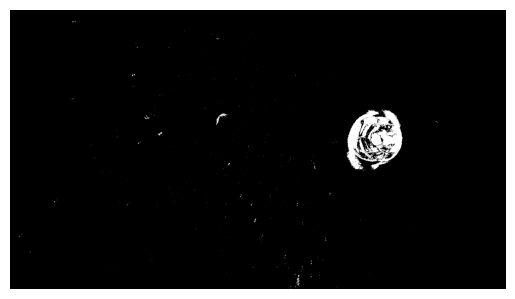

197
m1 19.796522179546702
m2 1.1603729912042855


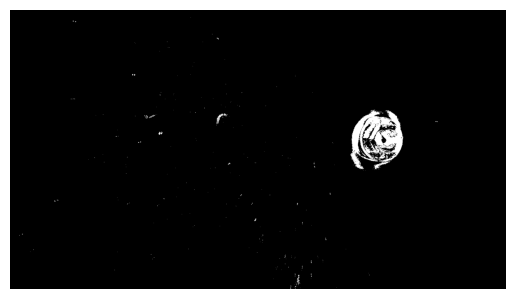

198
m1 19.570086611798164
m2 1.215152432978523


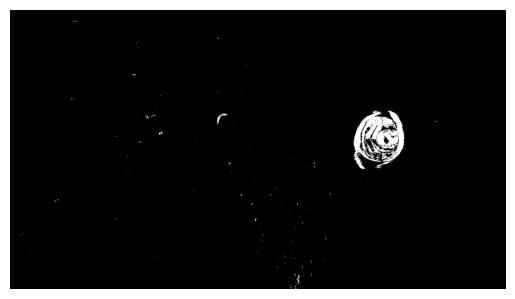

199
m1 20.688020976010645
m2 1.2467992488482043


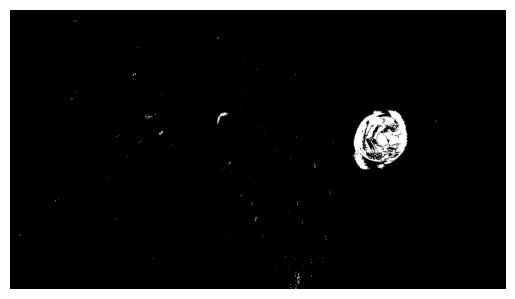

200
m1 20.3989250414833
m2 1.2573577067382304


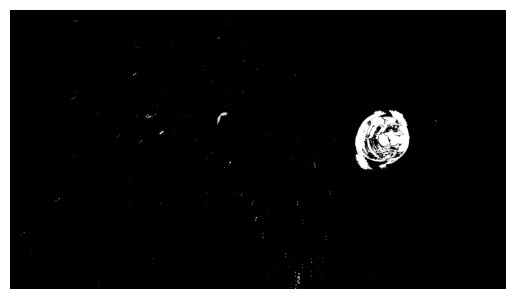

201
m1 19.777488638029613
m2 1.1972801817900856


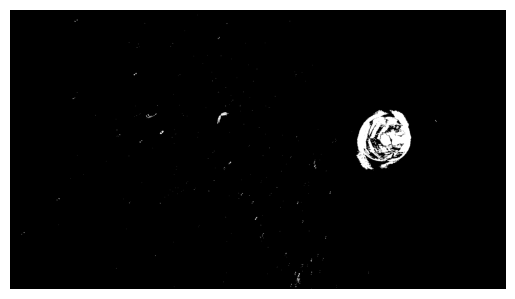

202
m1 20.157084795220065
m2 1.2329969950784365


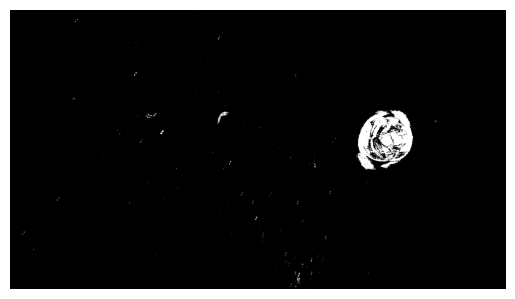

203
m1 20.218480843480844
m2 1.2120983617596033


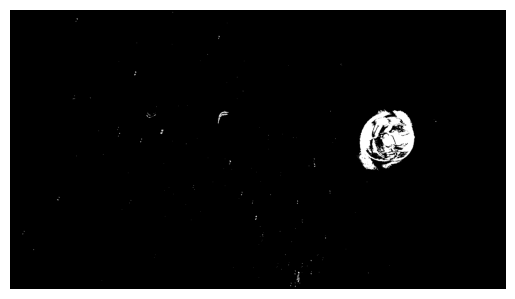

204
m1 20.86581674584561
m2 1.1497430712754229


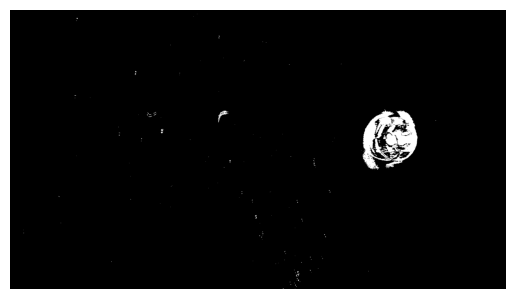

205
m1 20.145913605824152
m2 1.2248588369759337


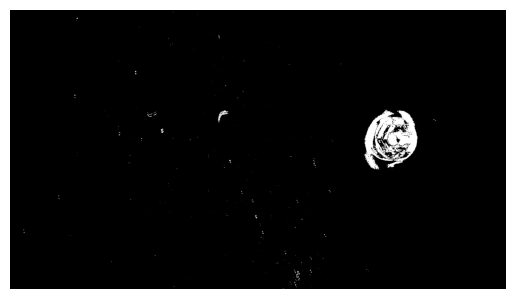

206
m1 18.527170587908117
m2 1.2517444742018842


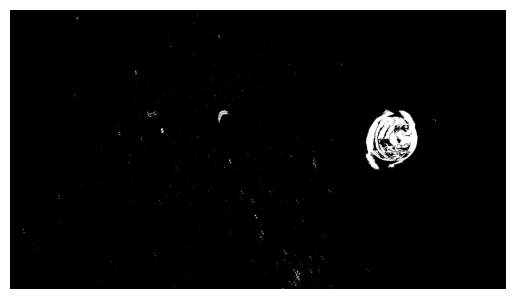

207
m1 18.801765525785967
m2 1.2482457476567106


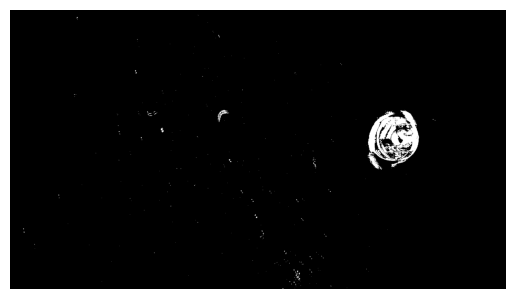

208
m1 18.619465672961535
m2 1.213165582564739


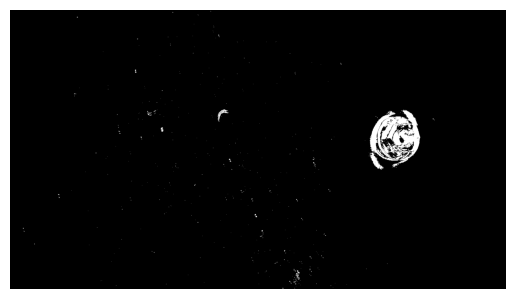

209
m1 17.045910466252113
m2 1.178552952879638


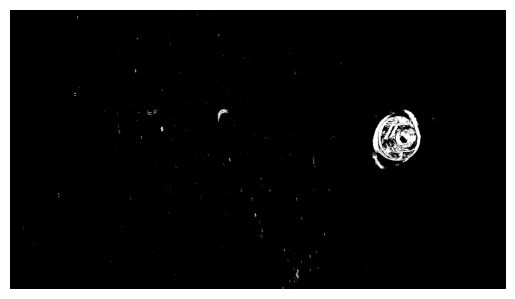

210
m1 16.81859214218896
m2 1.1123018061491796


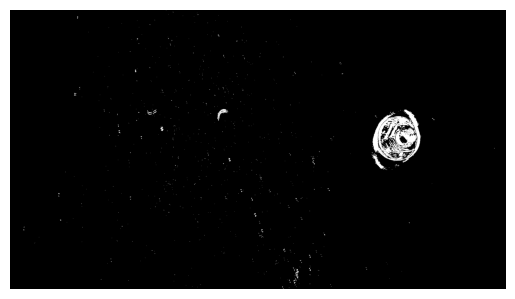

211
m1 14.205716219382044
m2 1.1720464449634258


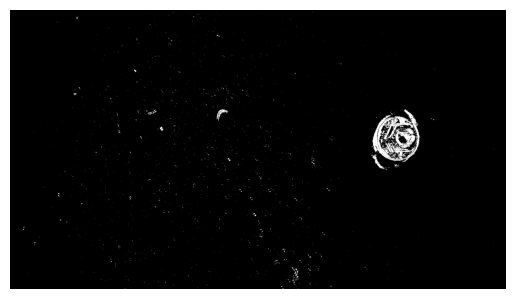

212
m1 11.44655426420036
m2 1.1823749238273076


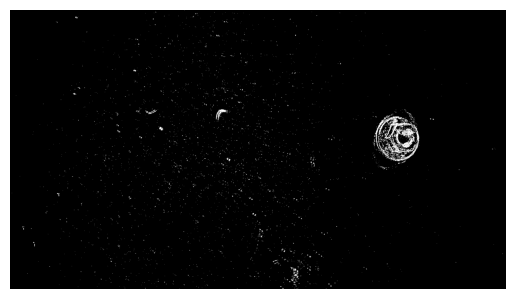

213
m1 16.723887939516338
m2 1.191421234037911


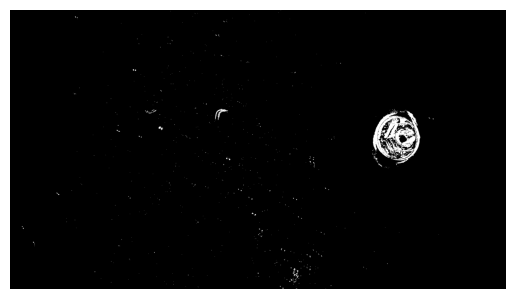

214
m1 18.896279841820046
m2 1.1595363454512717


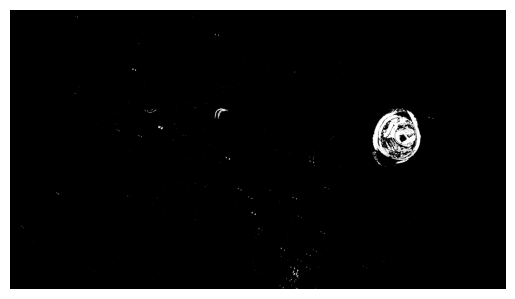

215
m1 20.17626507124589
m2 1.1900672378865391


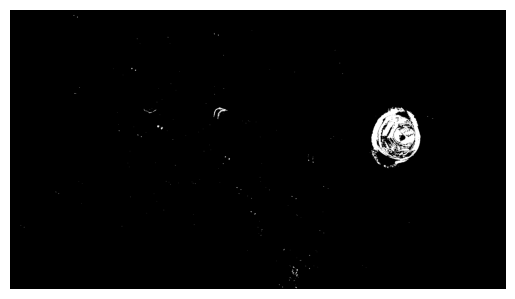

216
m1 19.74170473948959
m2 1.1828980693132216


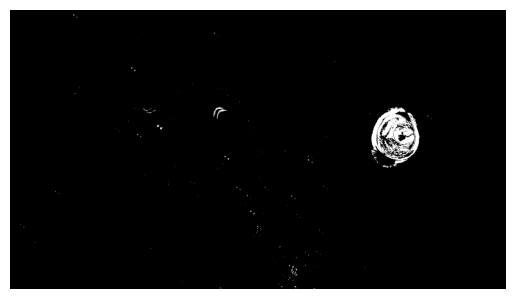

217
m1 19.638131853132535
m2 1.1961104470640636


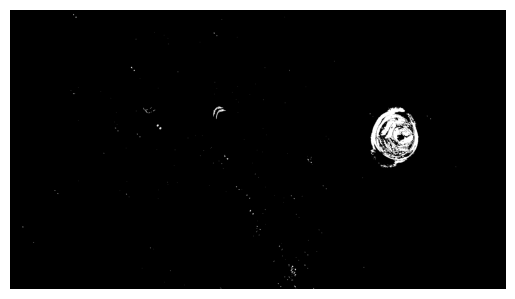

218
m1 19.66521651662224
m2 1.1790991791857153


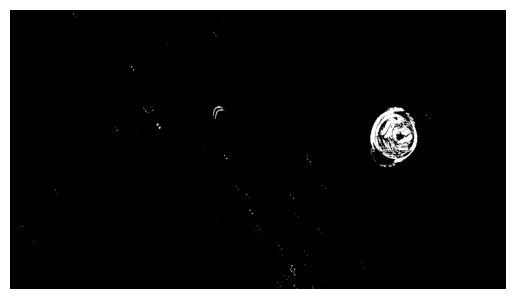

219
m1 19.706488181975352
m2 1.1748079667071794


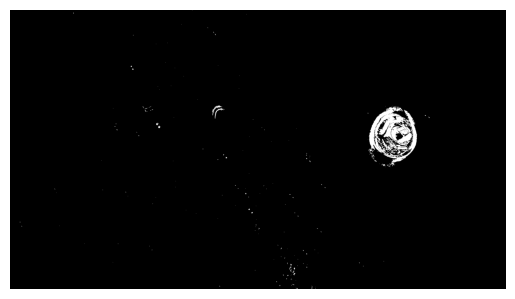

220
m1 18.399758392021795
m2 1.1581451559792284


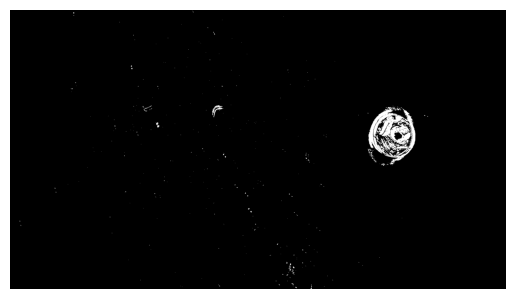

221
m1 18.259313520301383
m2 1.1829249314733887


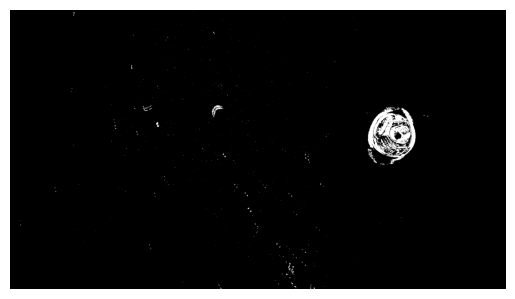

222
m1 18.443769569414037
m2 1.1987683660713802


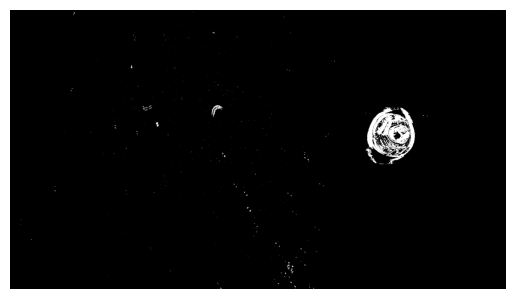

223
m1 18.750802429509655
m2 1.182798369778535


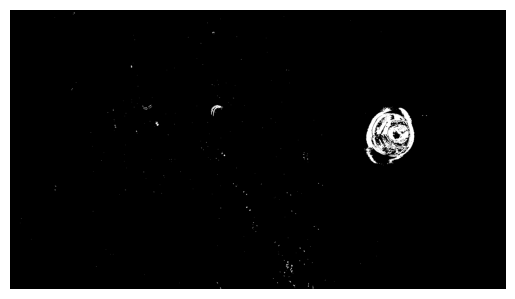

224
m1 17.31384297520661
m2 1.1658716975939614


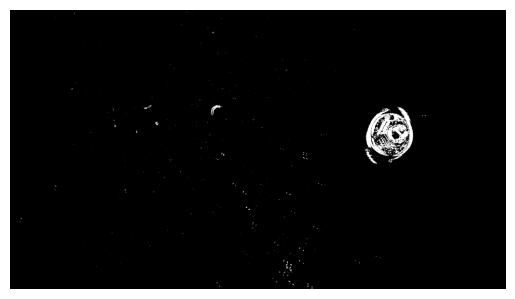

225
m1 15.496710854181202
m2 1.1743730415231515


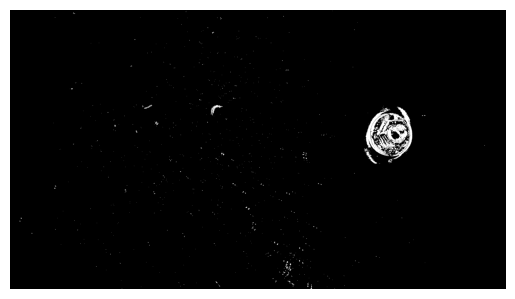

226
m1 14.095848411741054
m2 1.1744382950603007


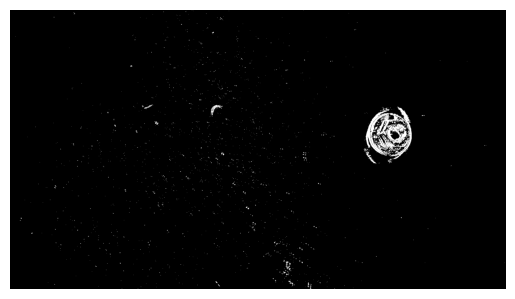

227
m1 13.634452658769039
m2 1.13364648302212


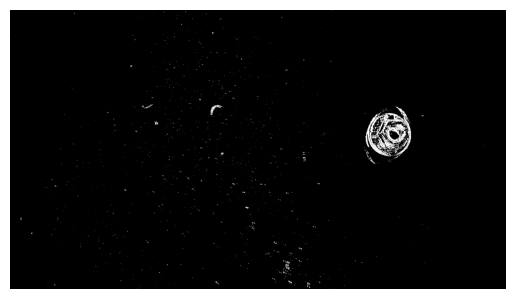

228
m1 14.669809395534877
m2 1.0691386799759308


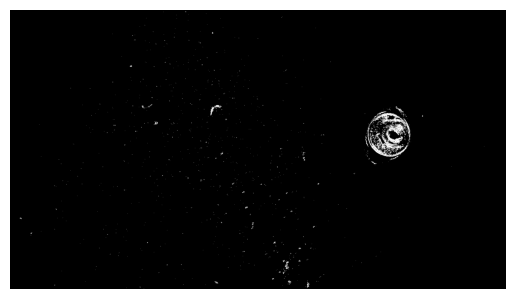

229
m1 15.402361384419493
m2 1.0539678260746415


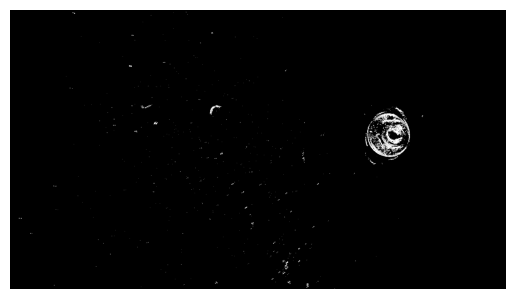

230
m1 17.0615739907624
m2 1.0899817572091373


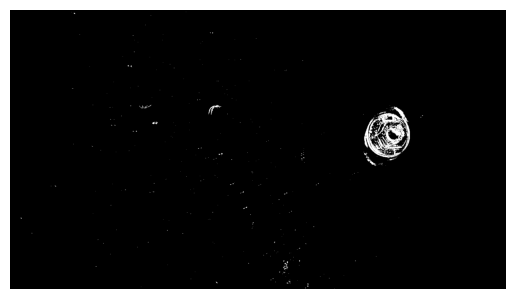

231
m1 14.169580629656332
m2 1.1362502401593482


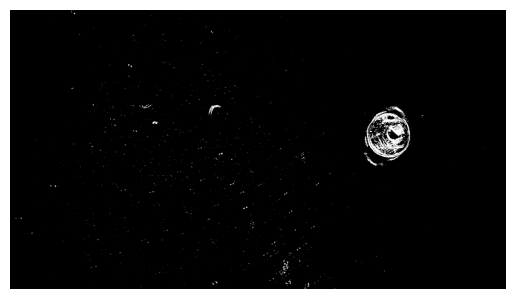

232
m1 14.02018066500096
m2 1.1475120716888418


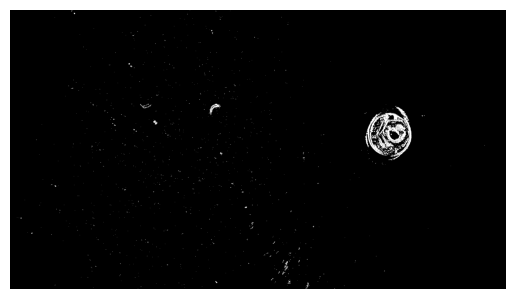

233
m1 9.678223740392827
m2 1.1464846989044863


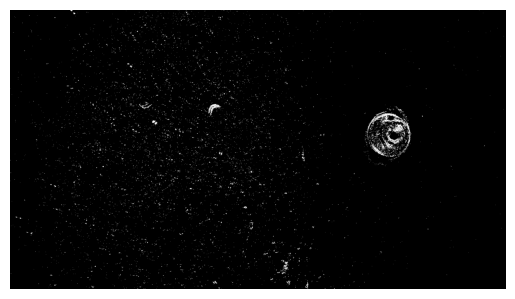

234


IndexError: list index out of range

In [34]:
path=r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4"
cap = cv2.VideoCapture(path)
count_frames=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#list is where we're going to stock the frames
List=[]
#save the binary images 
Result=[]
for index in range(count_frames):
        ret, frame = cap.read()
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        List.append(gray_image)
I=List[0]
B=List[0]
idx=0
while(idx<len(List)-1):
    print(idx)
    I=List[idx+5]
    diff=cv2.absdiff(I, B)
    idx+=1
    B=List[idx]
    Threshold=Seuillage_Heuristique(diff,Threshold=5,new_threshold=0)
    binary_image = (diff > Threshold).astype(np.uint8) 
    Result.append(binary_image)
    plt.imshow(binary_image,cmap='gray')
    plt.axis('off')
    plt.show()
    
    
    

In [30]:
import numpy as np
Threshold= 150
new_threshold=0
def Seuillage_Heuristique(gray_image,Threshold,new_threshold):
    while(Threshold!=new_threshold):
        G1=gray_image>Threshold
        G2=gray_image<=Threshold
        if np.sum(G1) != 0:
           m1 = np.sum(G1 * gray_image) / np.sum(G1)
           print("m1",m1)
        else:
        # Handle the division by zero case here
          print("invalid")
          break
        if np.sum(G2) != 0:
          m2 = np.sum(G2 * gray_image) / np.sum(G2)
          print("m2",m2)
        T=(m1+m2)/2
        new_threshold=Threshold
        Threshold=T
        return  Threshold
    





## Question 2:
on a enregistré le resultat de l'exercice dans une liste.

 Pour résoudre la question, on a mutiplié Result[idx]*: représente où l'objet était et où il est maintenant* par Result[idx+1] *:represente où l'objet est et où il sera.*


In [ ]:
for idx in range(len(Result)-1):
    Current_image=cv2.bitwise_and(Result[idx],Result[idx+1])
    plt.imshow(Current_image,cmap='gray')
    plt.axis('off')
    plt.show()
    

## Question 3

In [89]:
path=r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4"
a=0.1
Adapt=[]
#list is where we're going to stock the frames
def Adpt_back_substraction(path):
        cap = cv2.VideoCapture(path)
        List=[]
        #save the binary images 
        Result=[]
        D=0
        for index in range(count_frames):
                ret, frame = cap.read()
                gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                List.append(gray_image)
        I=List[0]
        B=List[0]
        idx=1
        for idx in range(1, len(List)):
            I=List[idx]
            I = I.astype(np.uint8)
            B = B.astype(np.uint8)
            diff=cv2.absdiff(I, B)
            Threshold=Seuillage_Heuristique(diff,Threshold=5,new_threshold=0)
            binary_image = (diff > Threshold).astype(np.uint8)
            D = np.zeros_like(gray_image, dtype=np.uint8)
            for x in range (gray_image.shape[0]):
                for y in range (gray_image.shape[1]):
                    if (binary_image[x,y]>0):
                        D[x,y]=255
            B=(1 - a) * I + a * B
            Adapt.append(D)
        return Adapt

    
    

In [ ]:
D=Adpt_back_substraction(path)


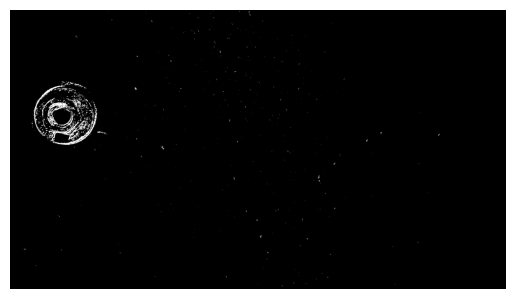

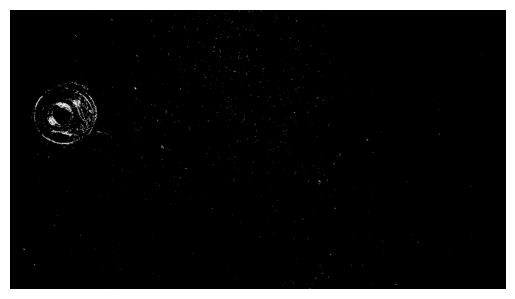

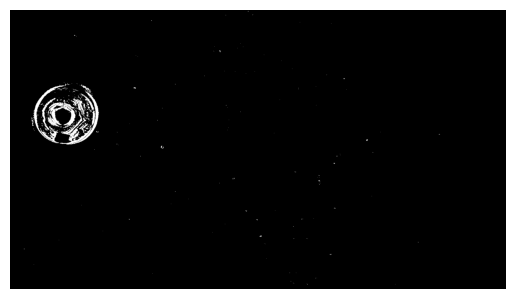

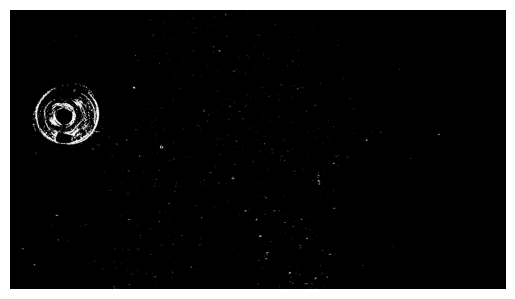

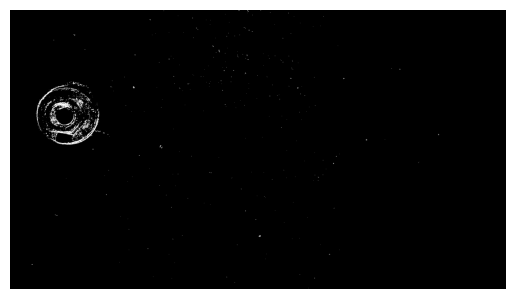

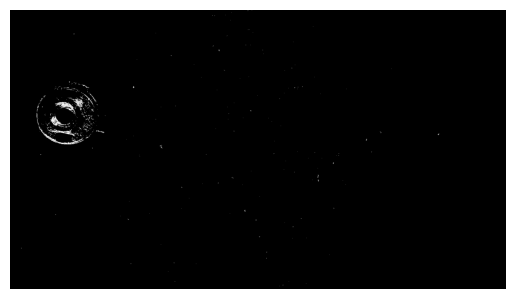

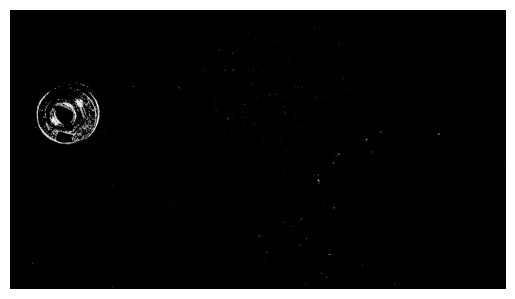

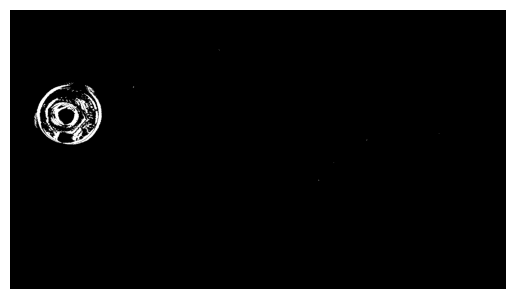

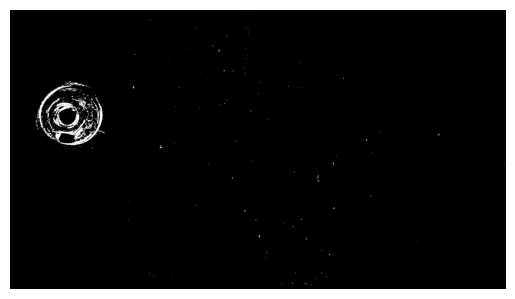

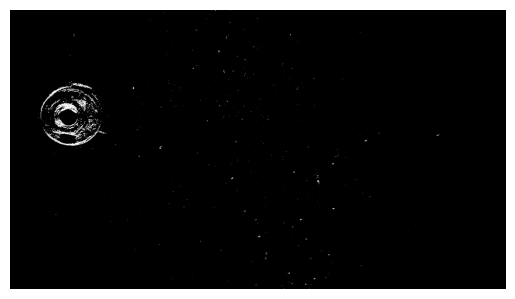

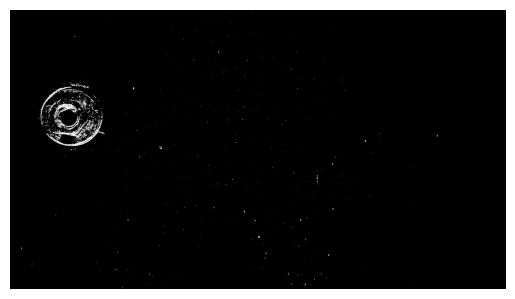

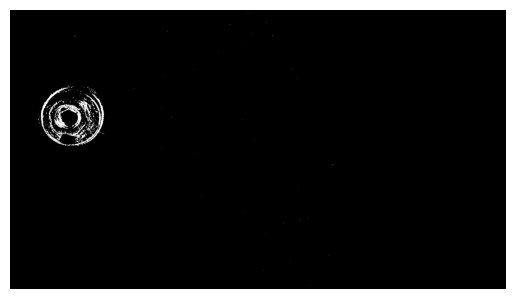

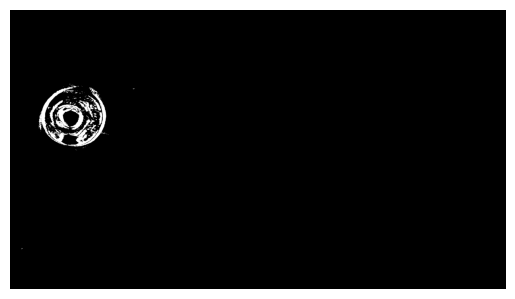

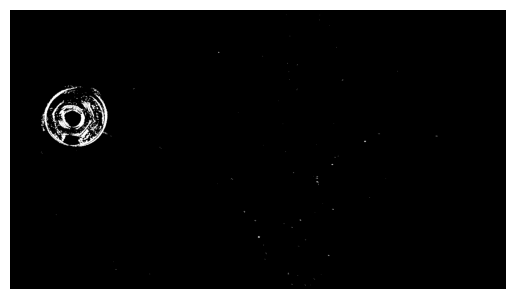

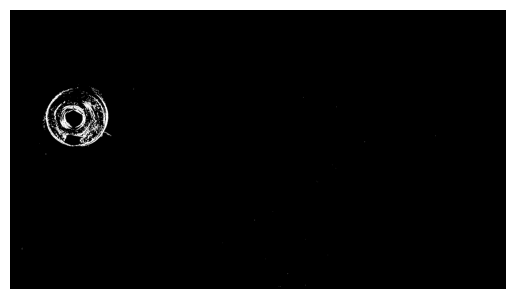

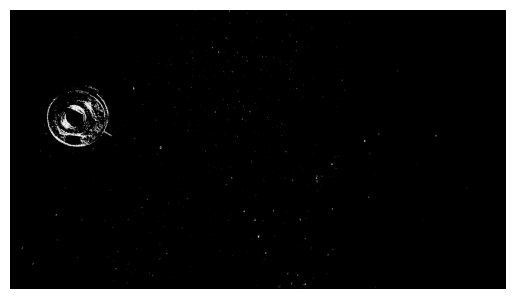

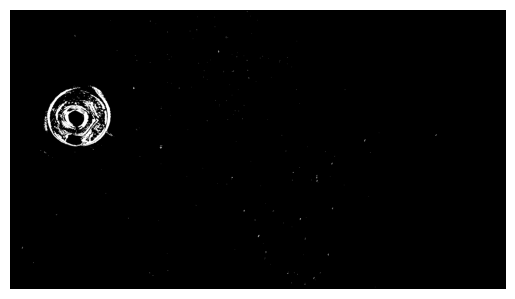

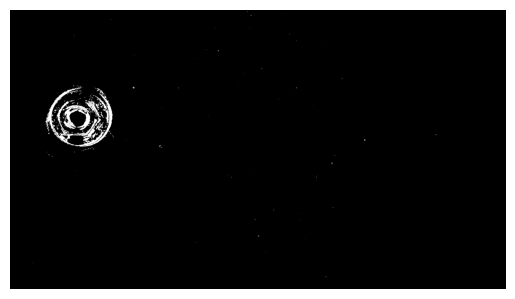

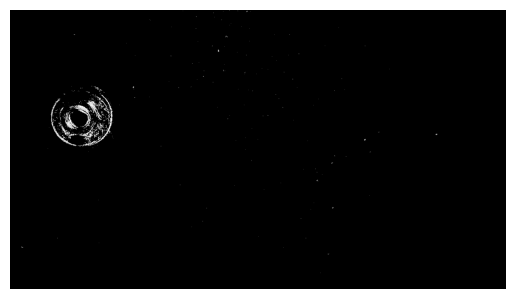

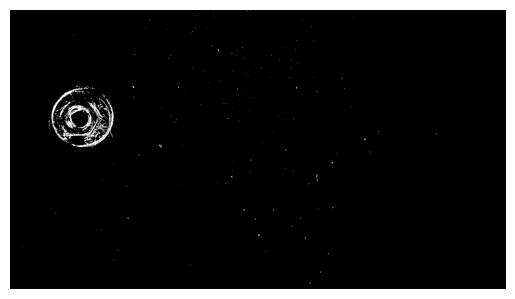

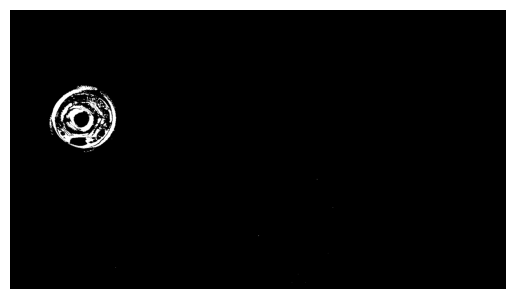

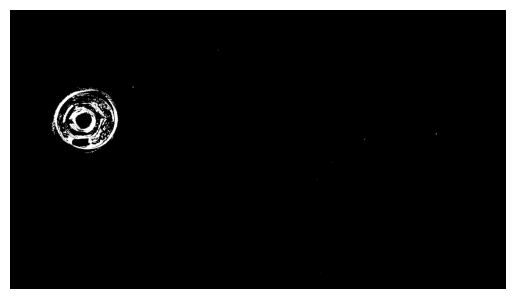

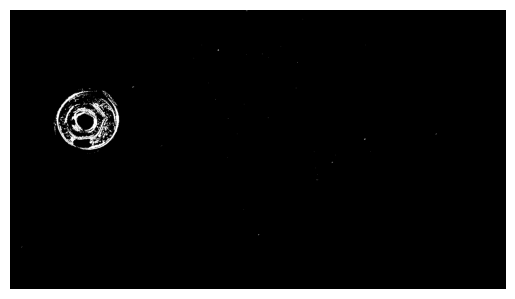

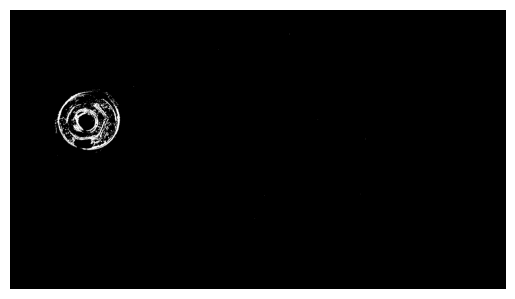

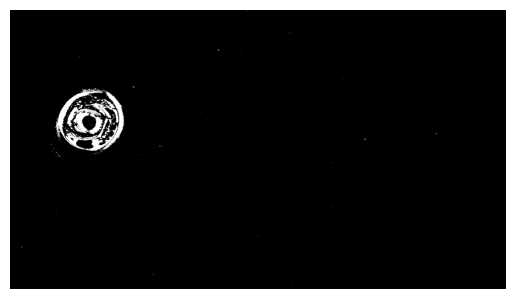

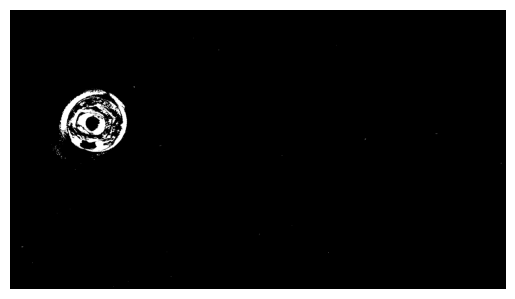

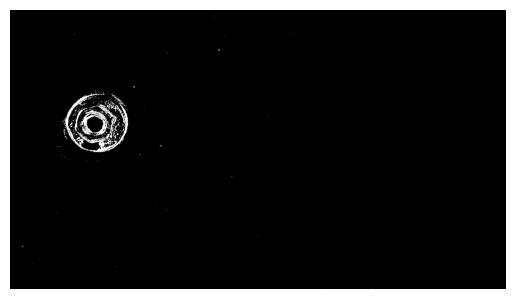

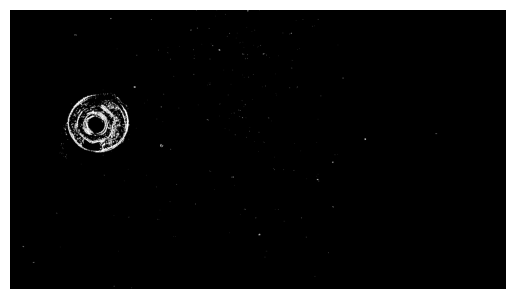

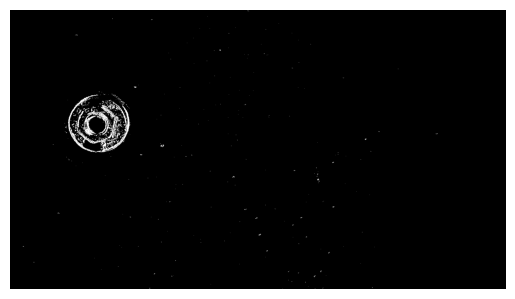

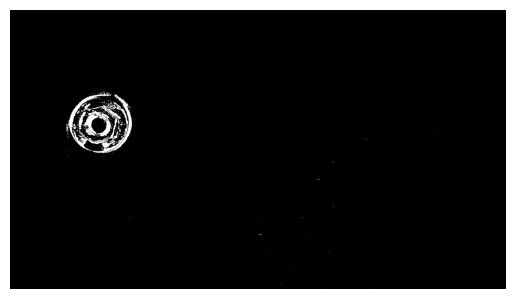

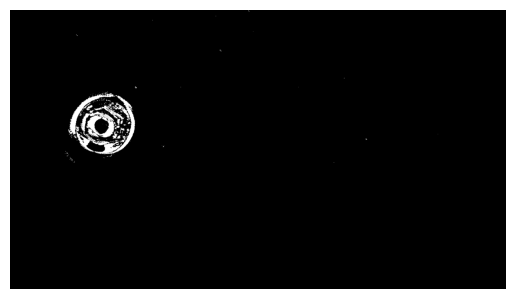

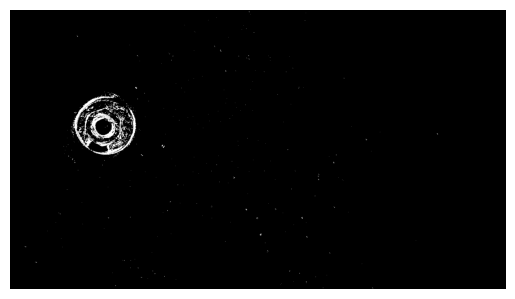

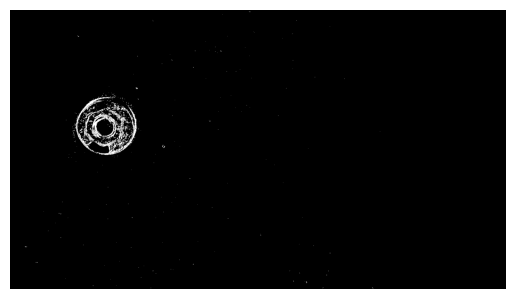

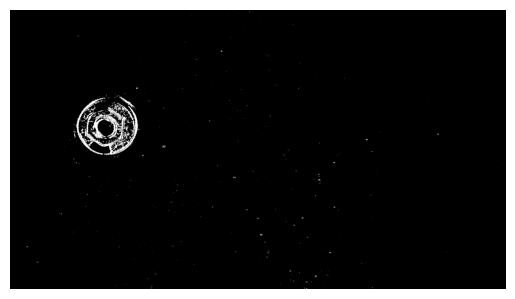

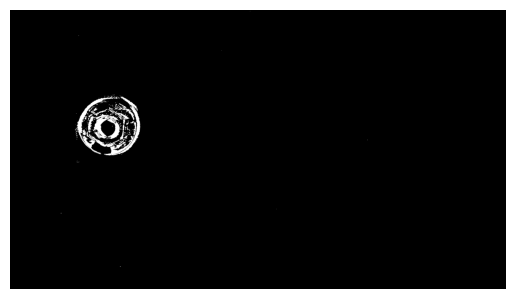

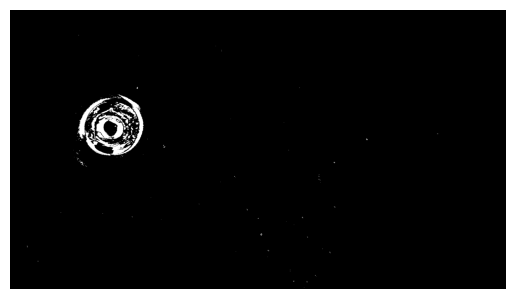

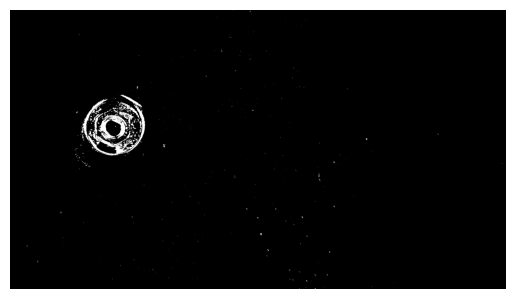

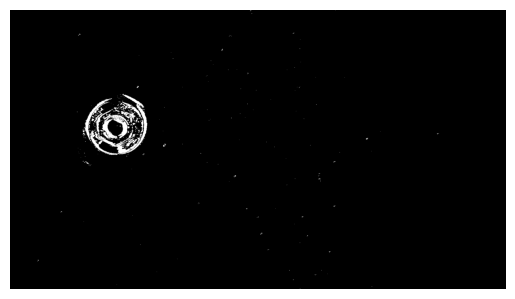

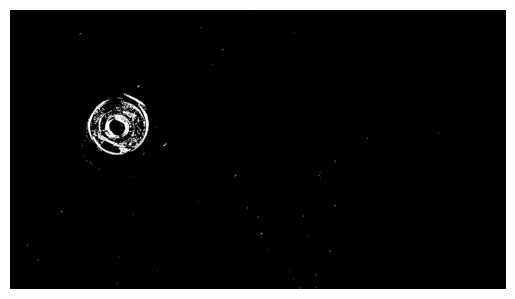

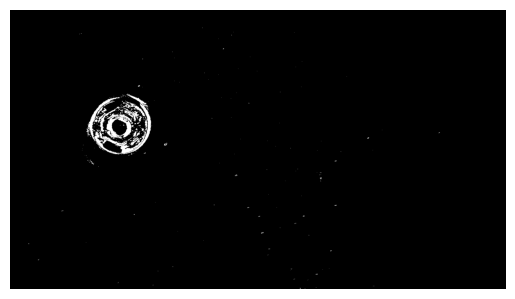

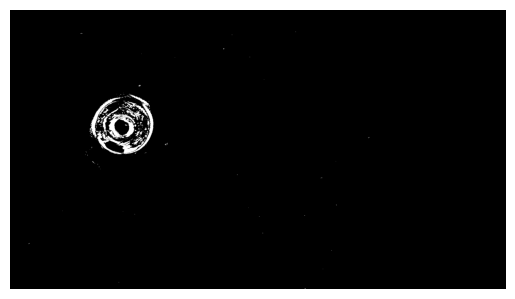

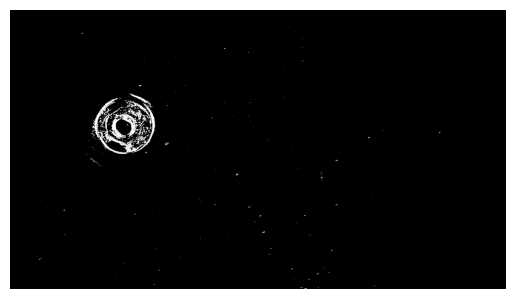

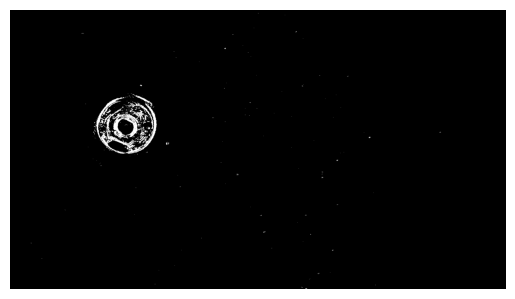

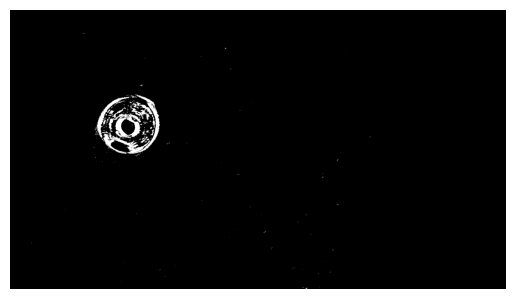

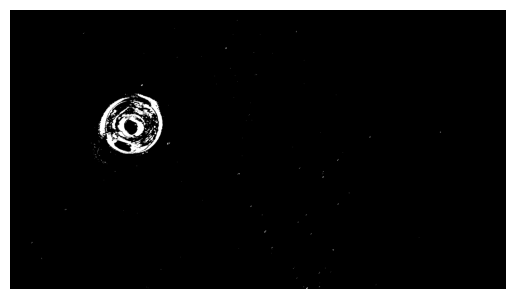

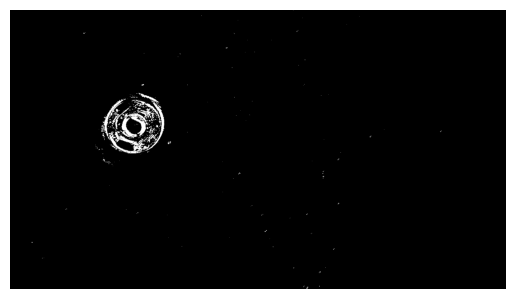

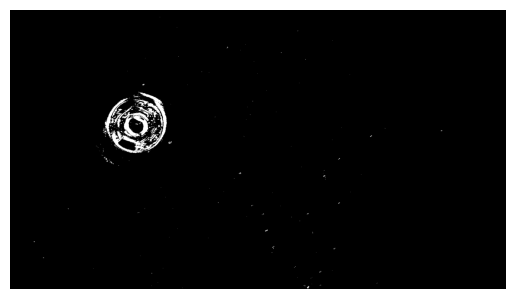

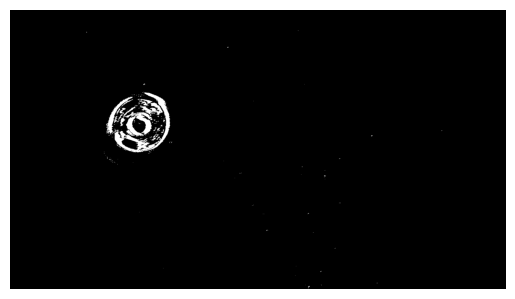

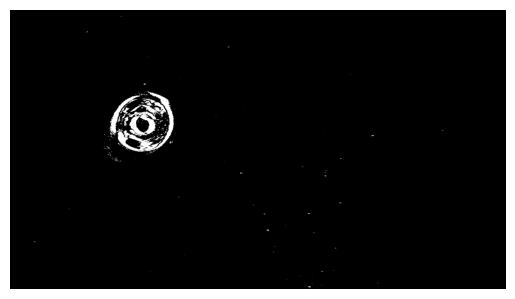

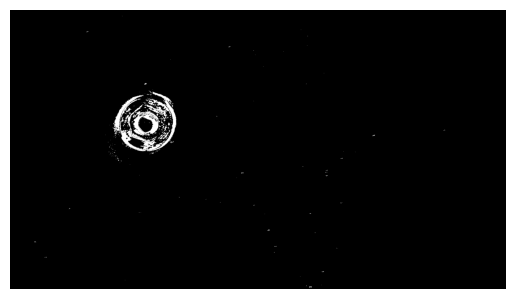

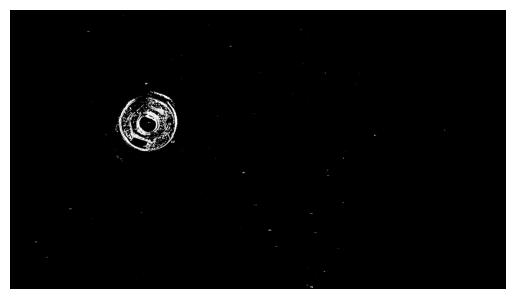

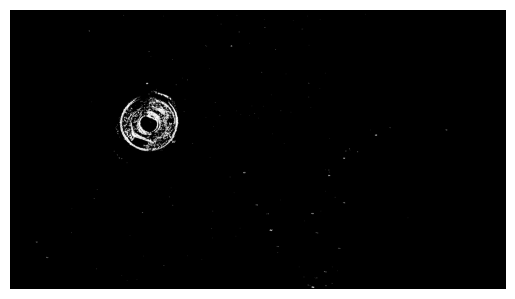

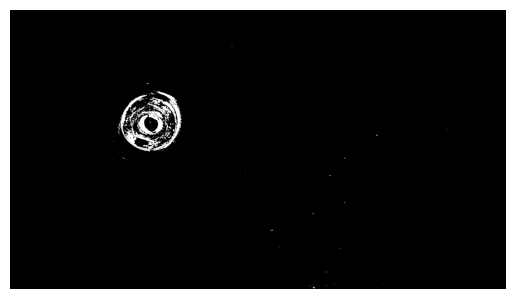

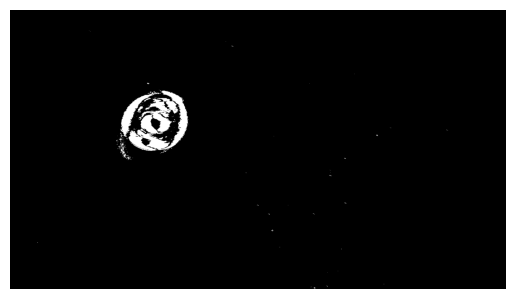

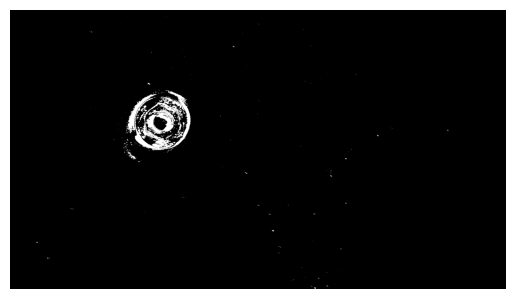

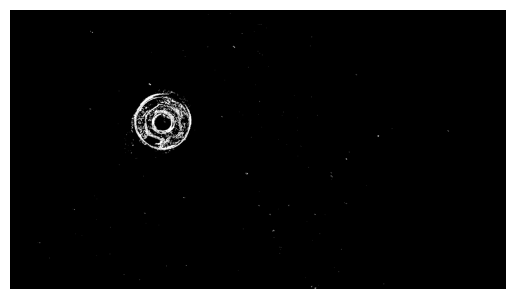

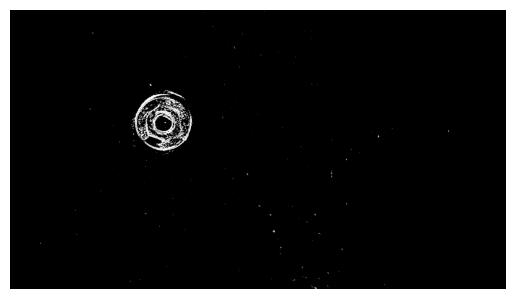

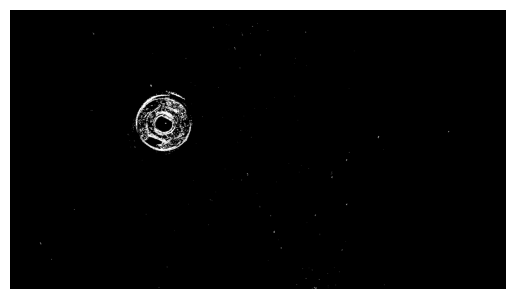

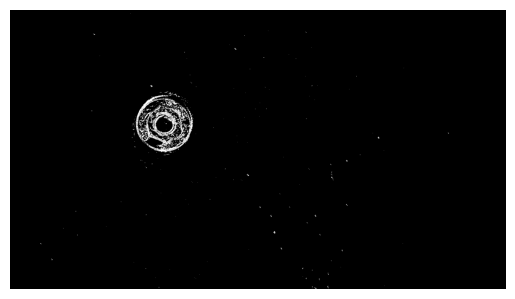

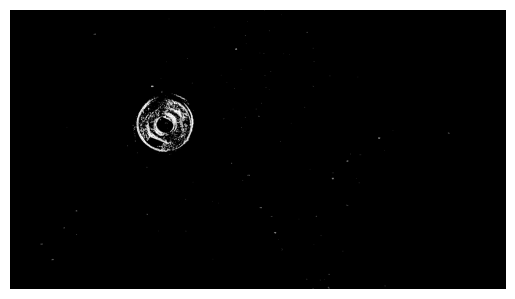

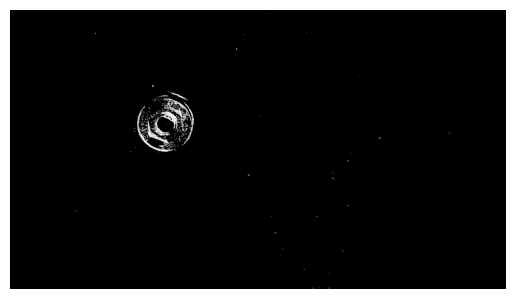

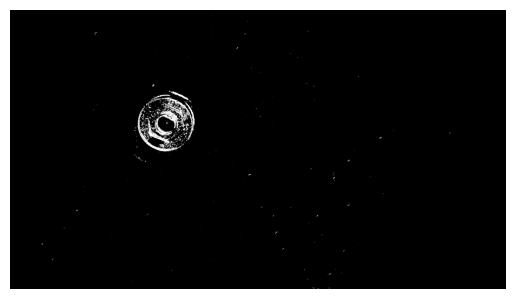

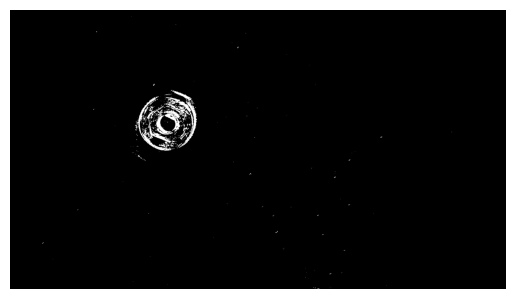

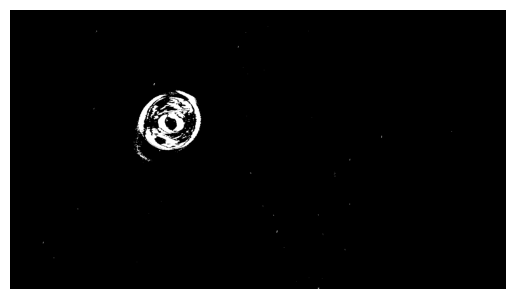

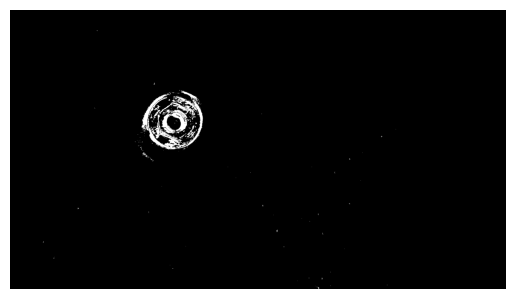

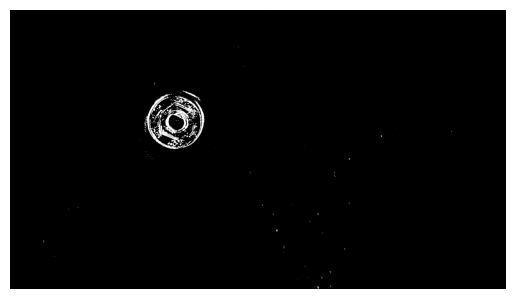

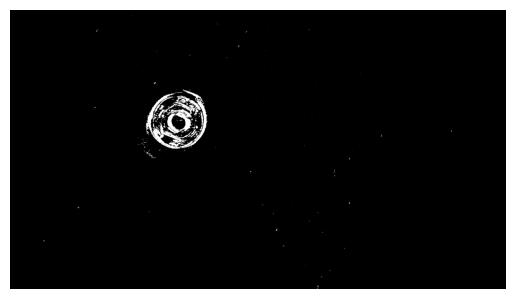

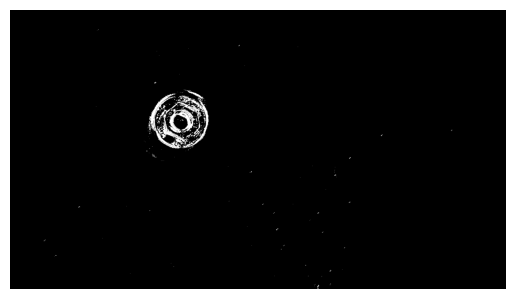

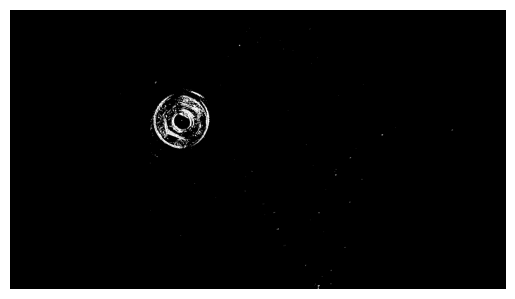

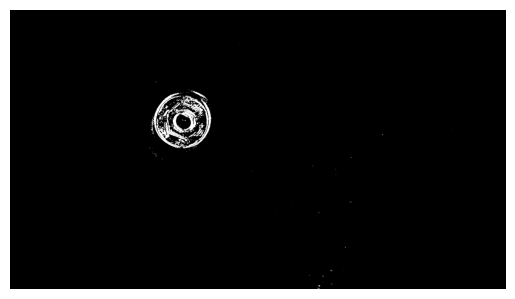

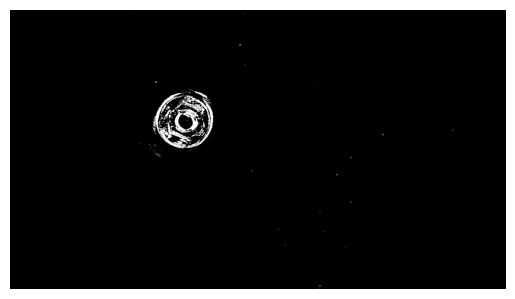

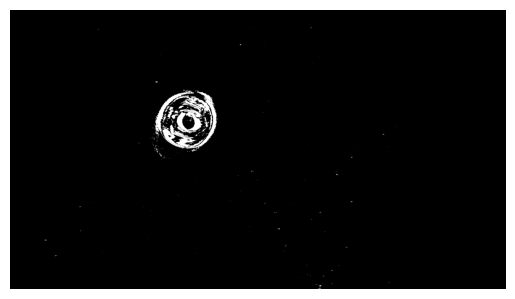

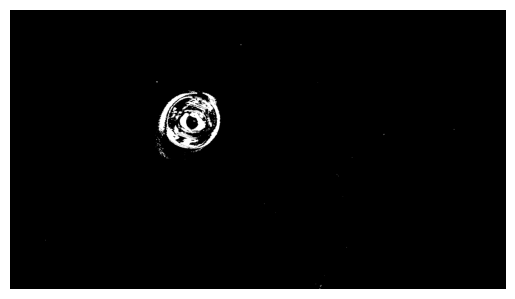

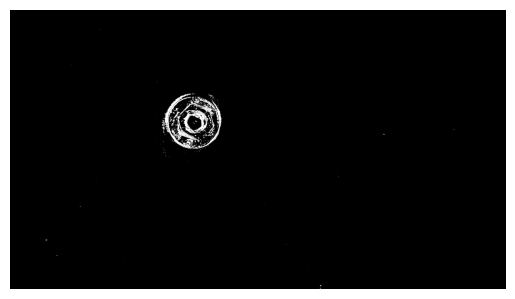

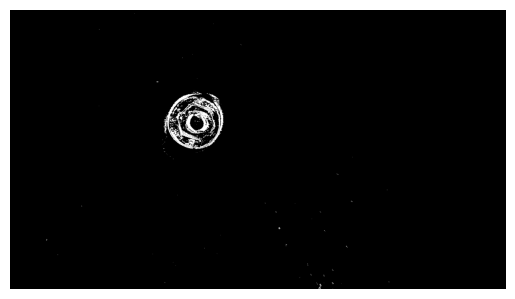

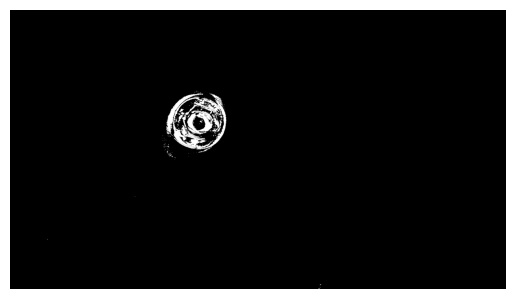

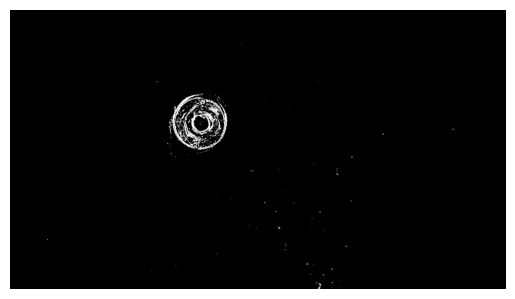

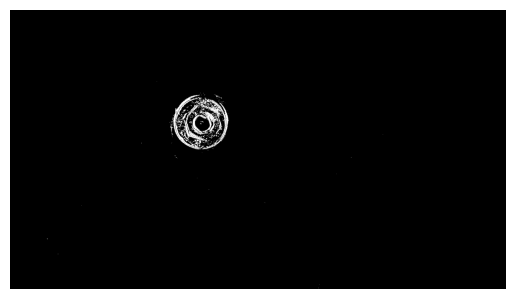

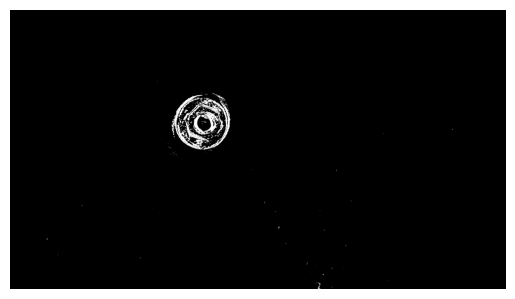

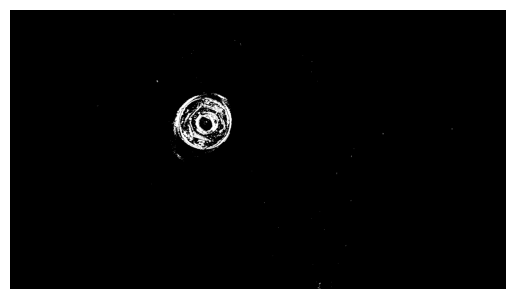

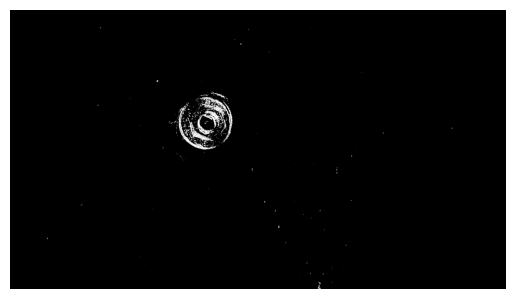

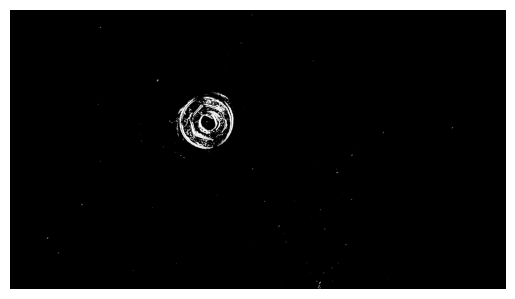

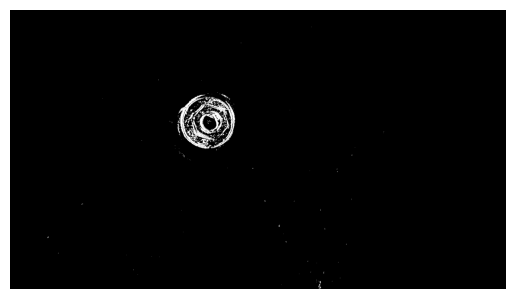

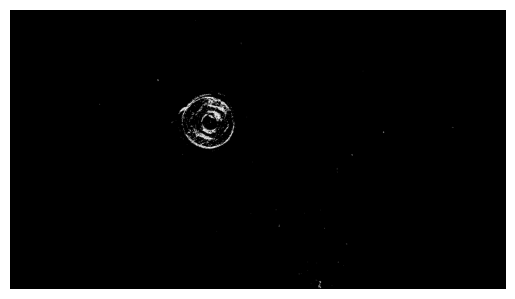

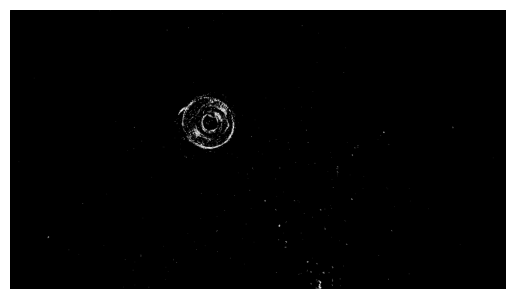

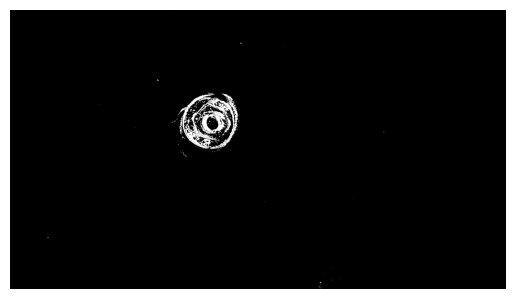

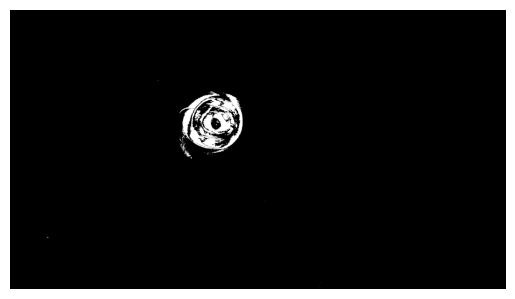

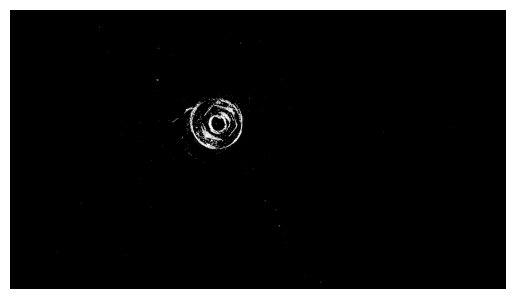

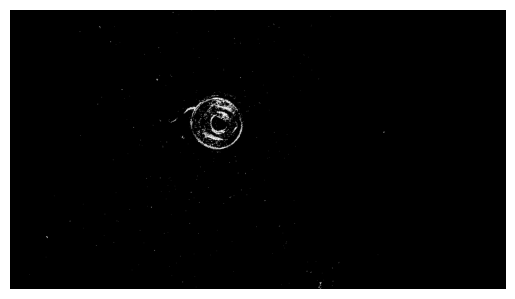

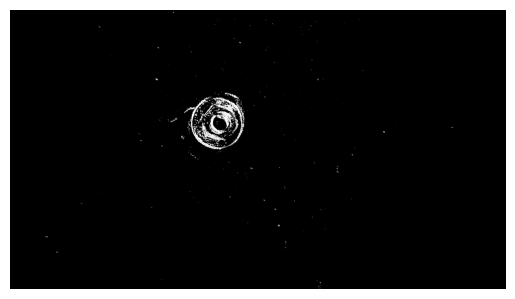

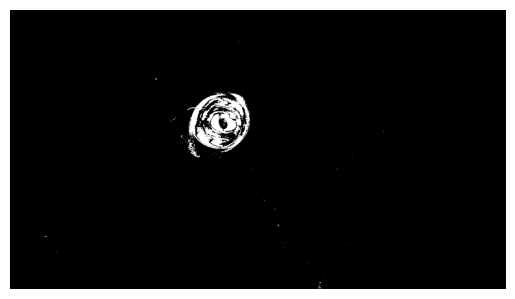

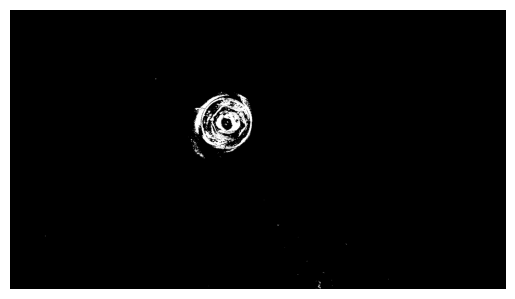

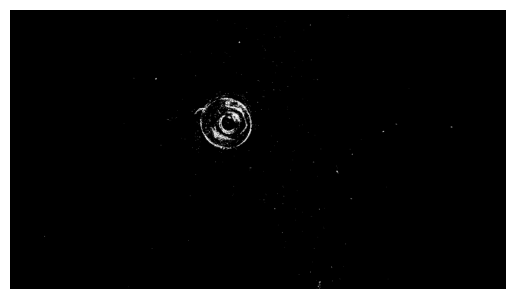

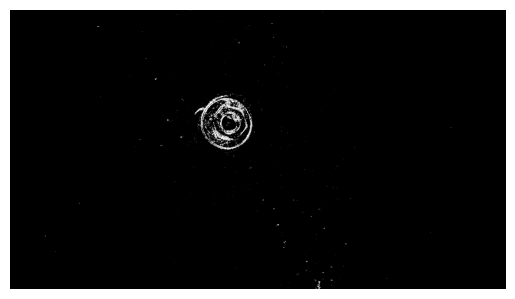

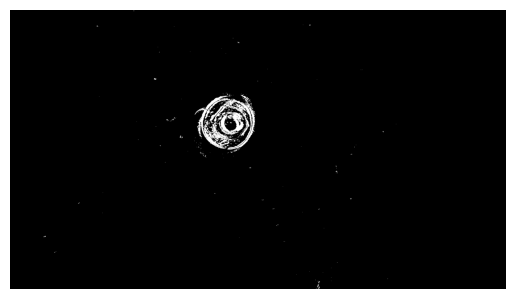

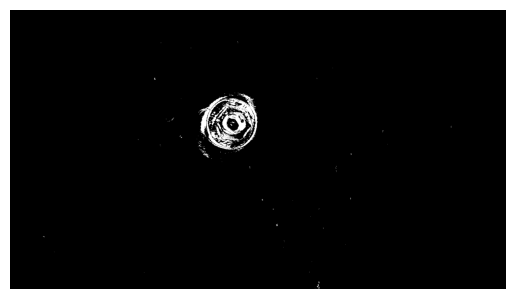

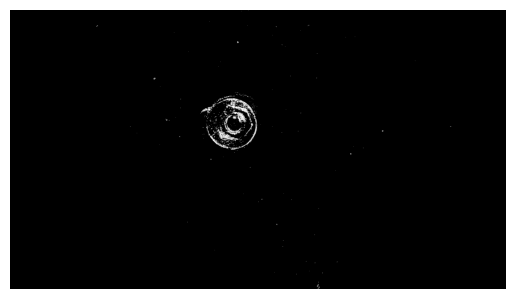

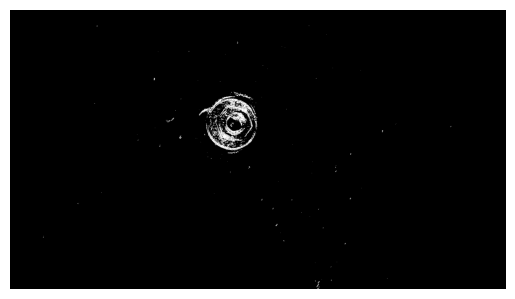

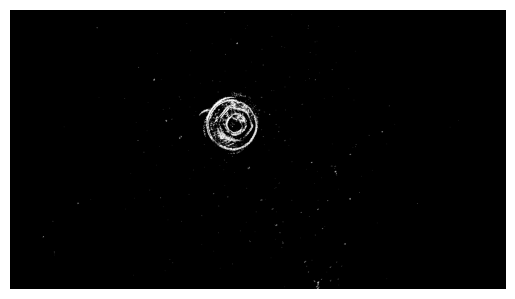

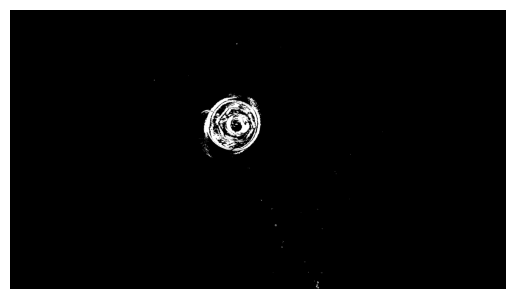

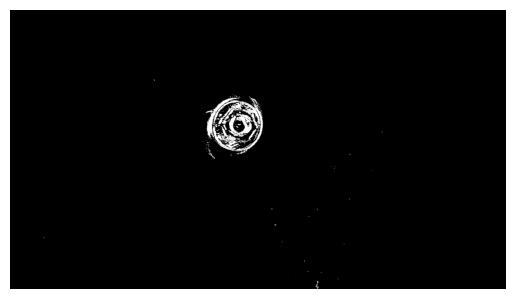

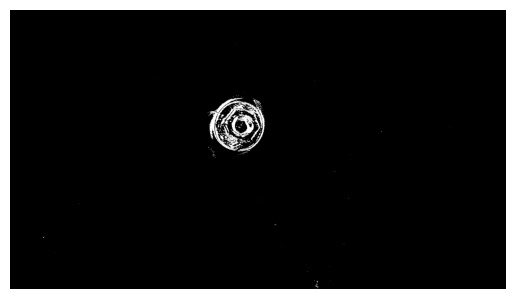

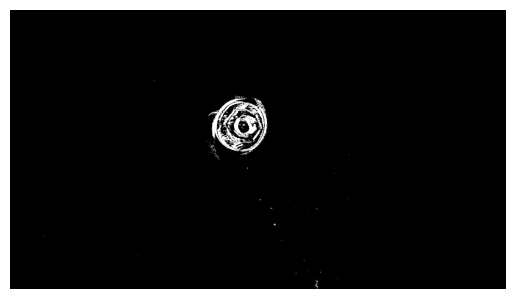

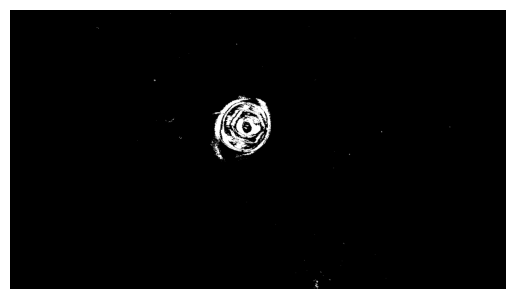

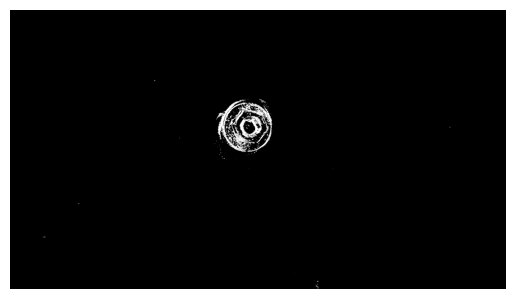

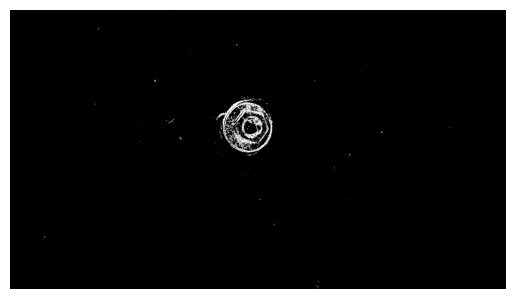

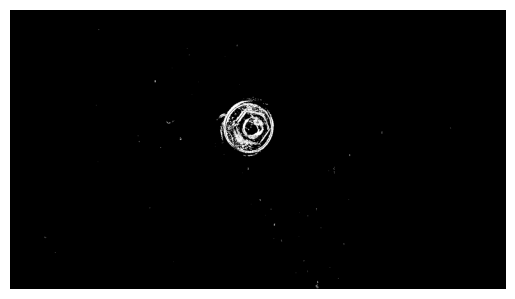

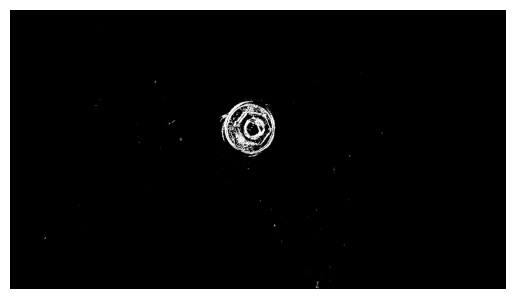

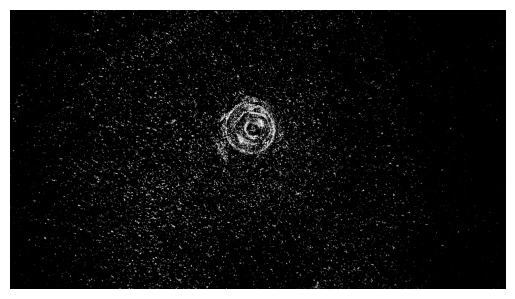

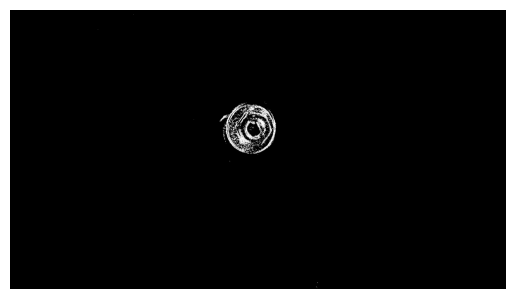

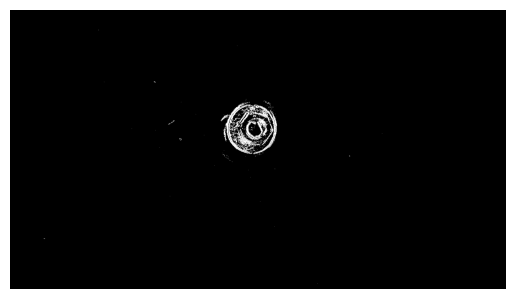

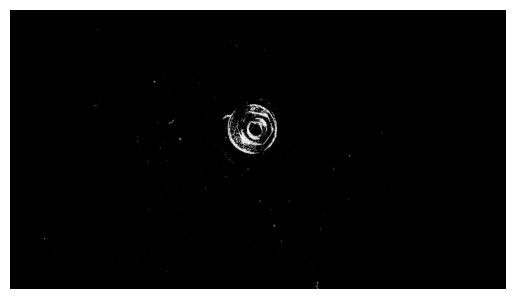

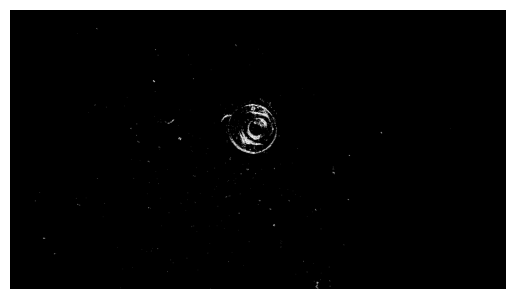

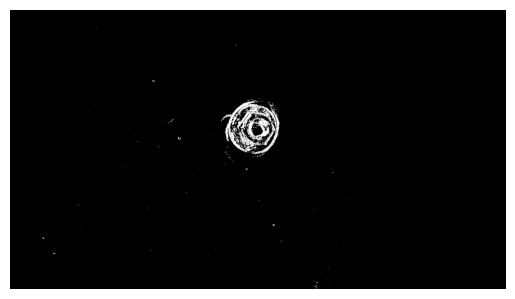

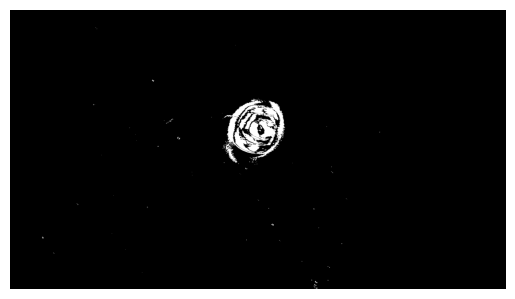

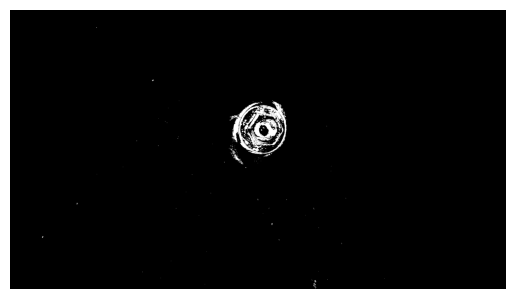

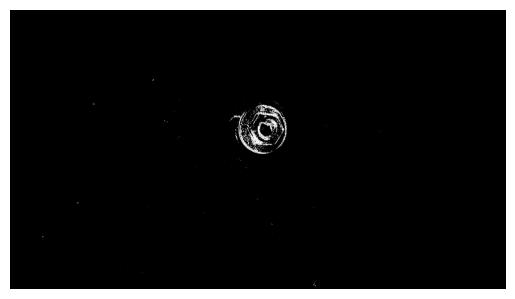

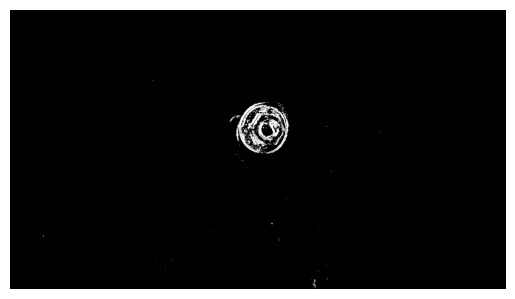

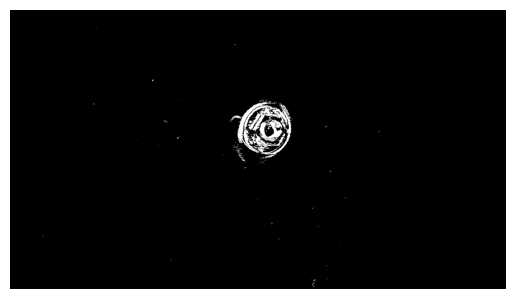

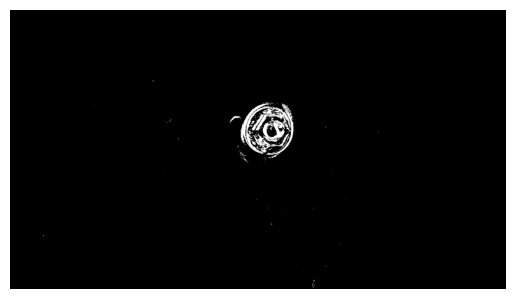

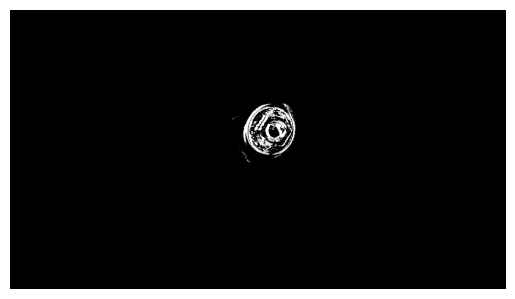

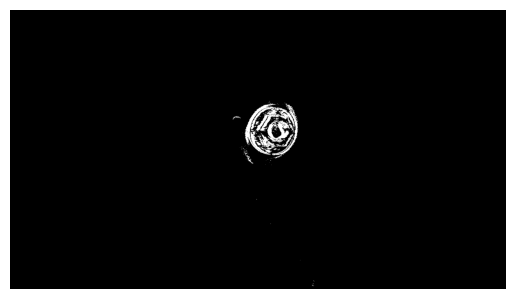

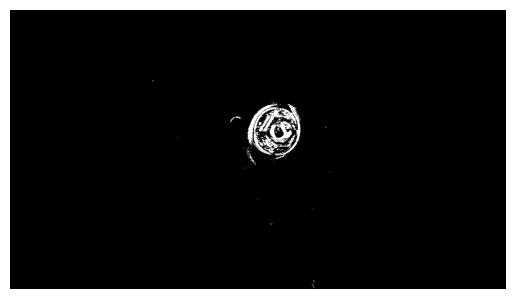

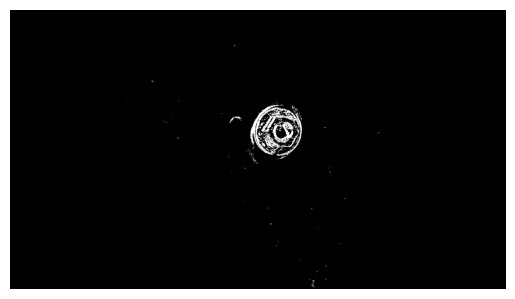

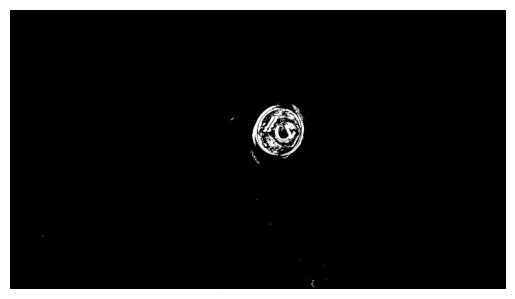

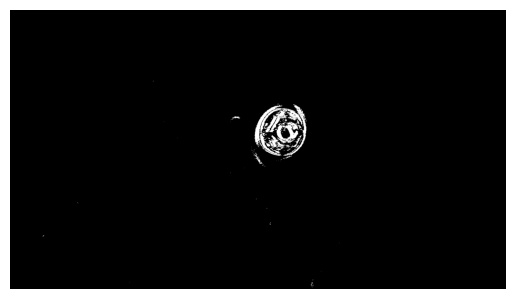

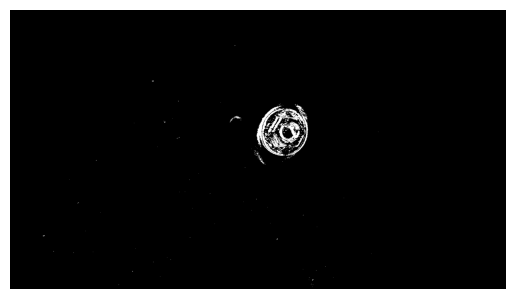

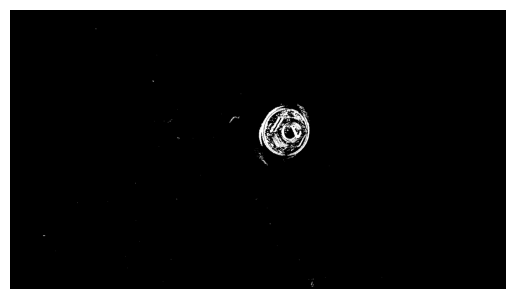

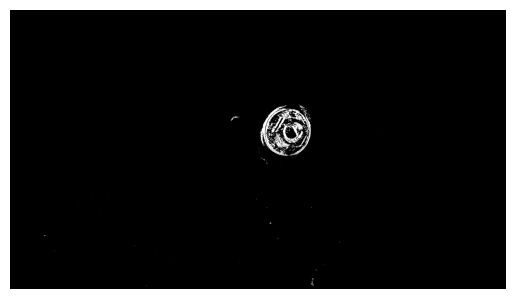

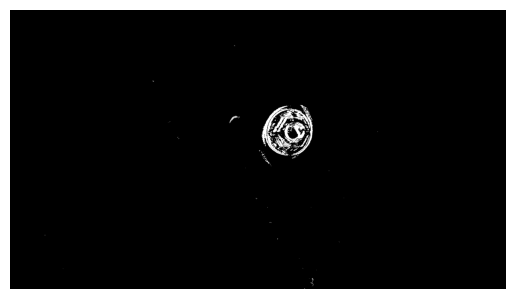

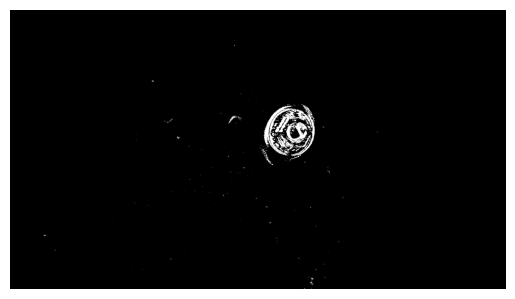

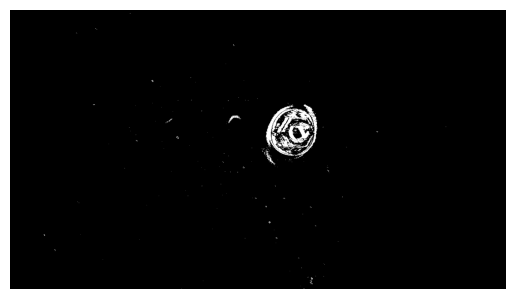

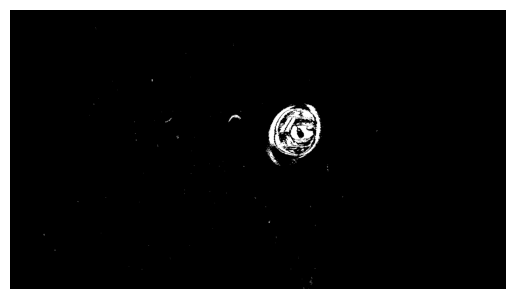

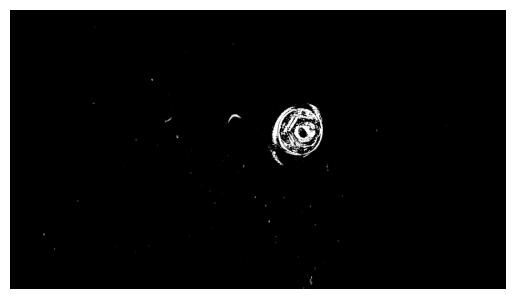

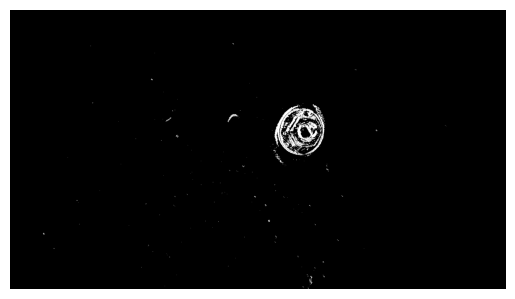

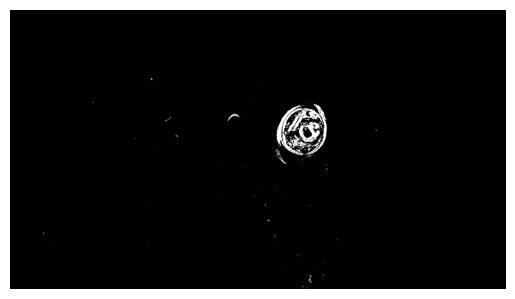

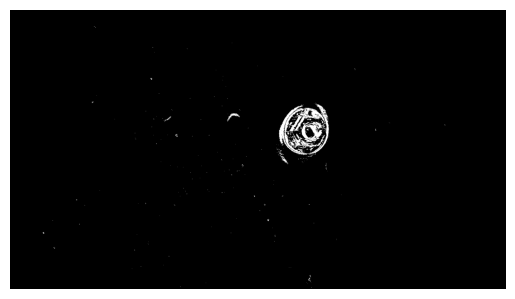

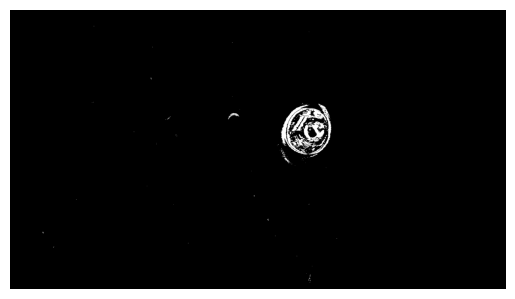

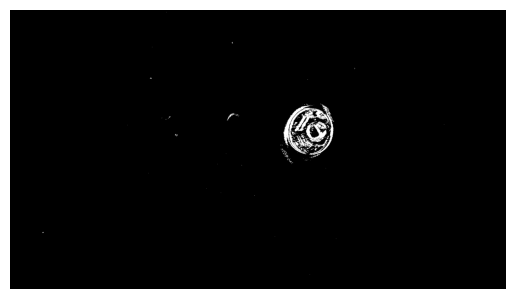

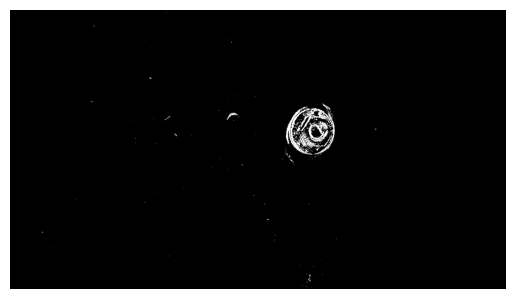

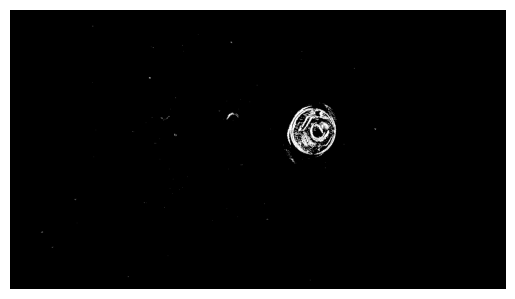

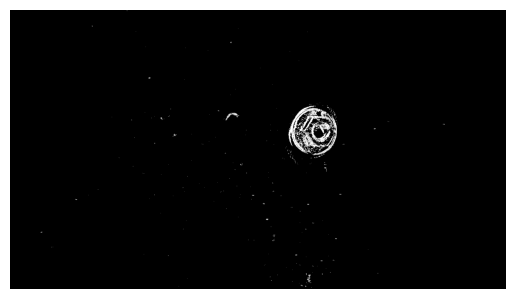

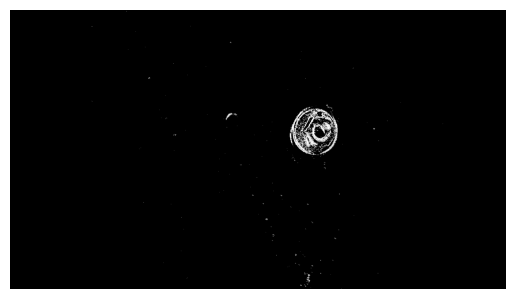

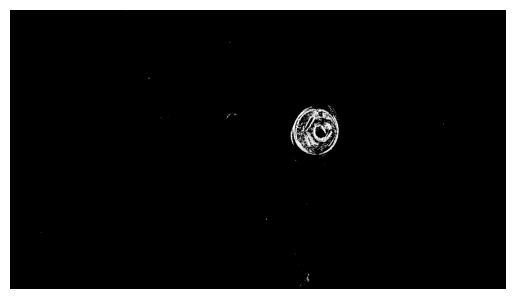

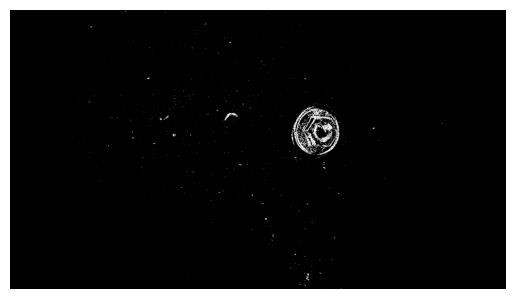

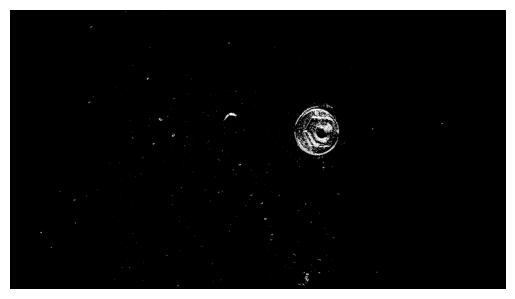

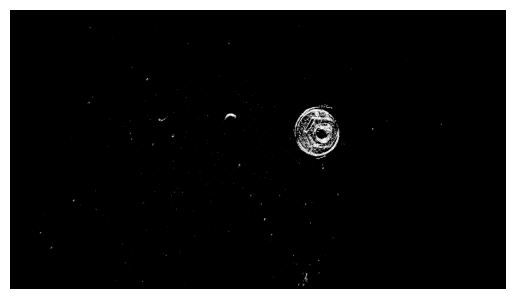

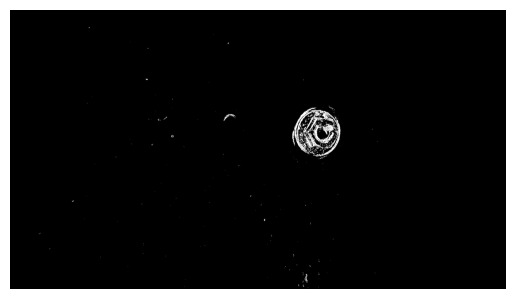

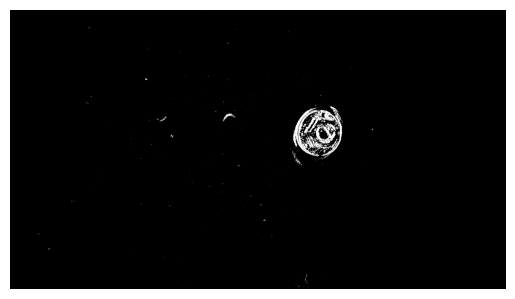

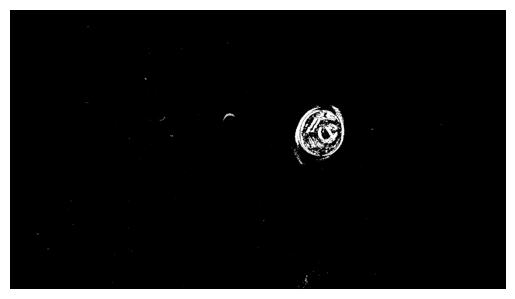

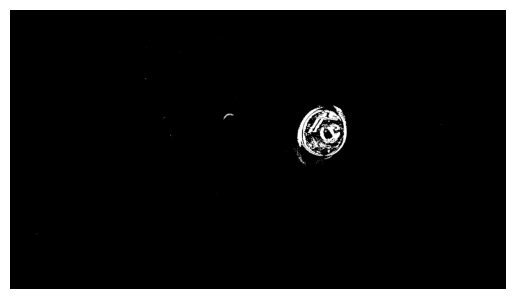

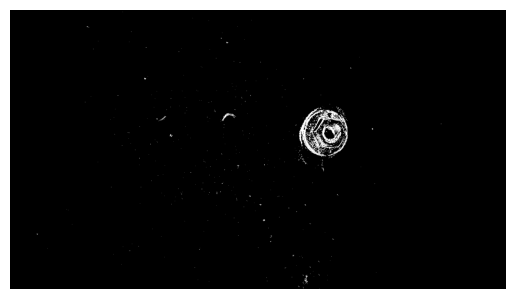

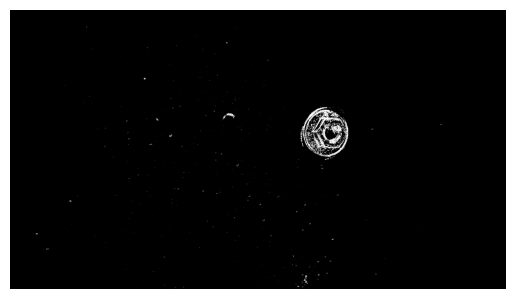

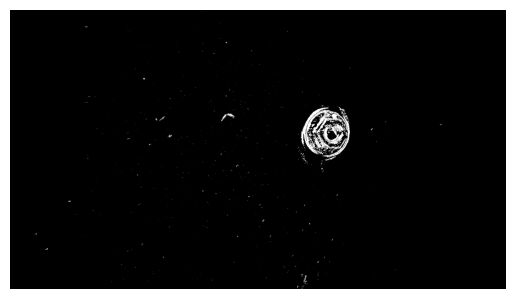

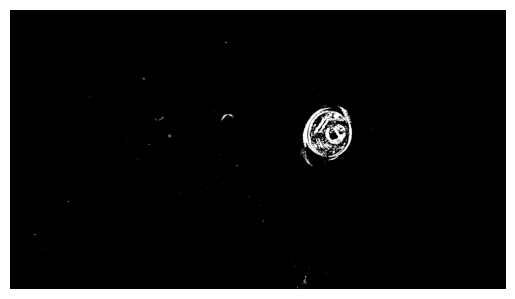

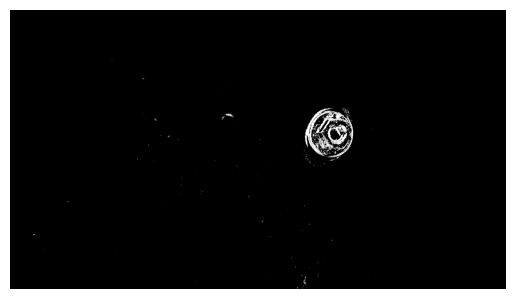

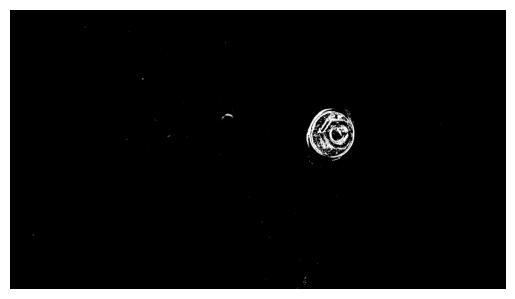

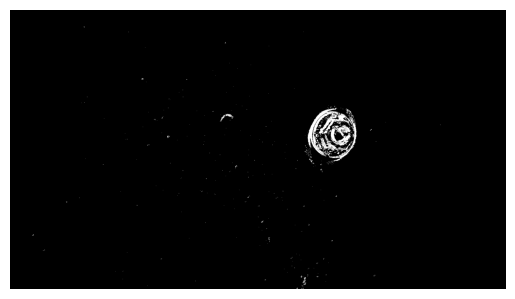

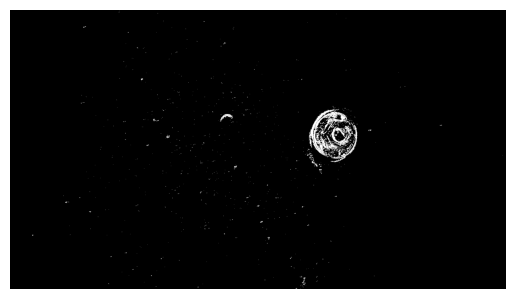

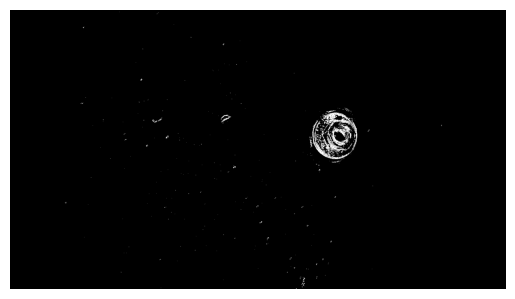

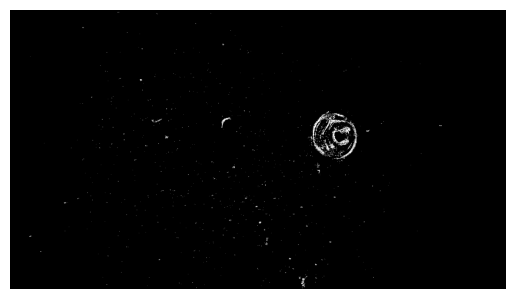

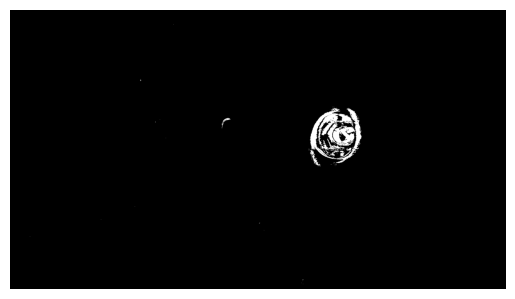

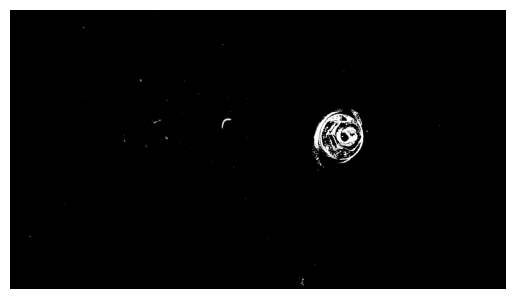

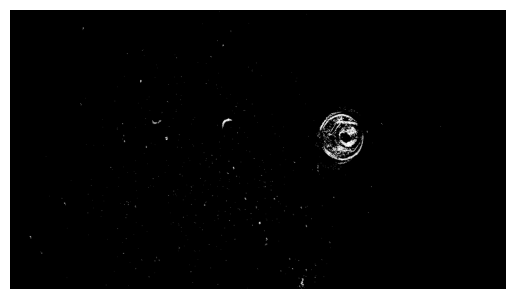

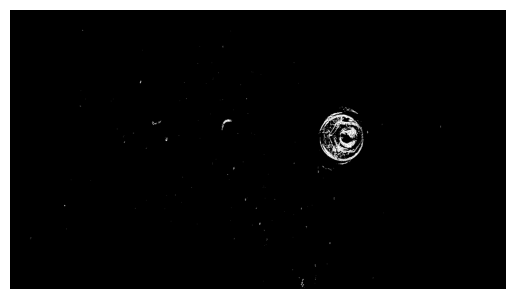

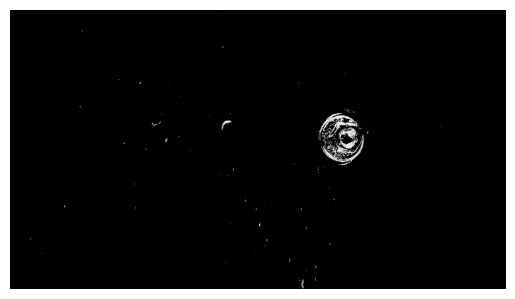

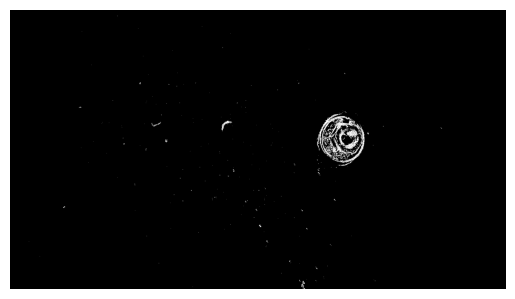

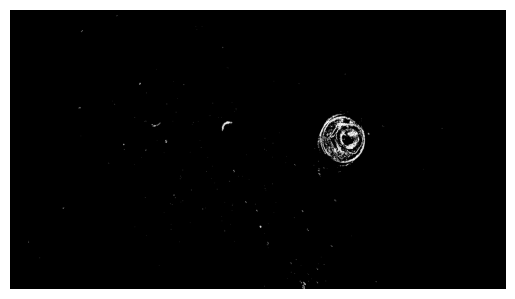

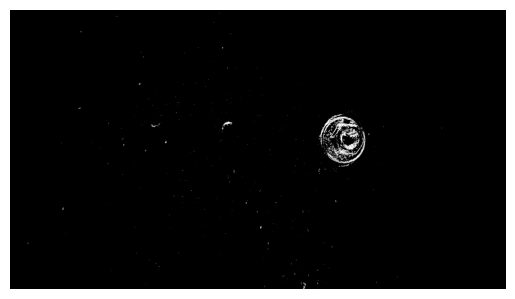

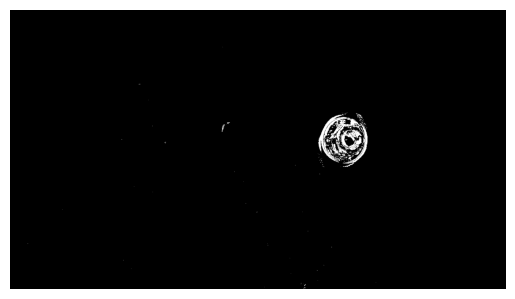

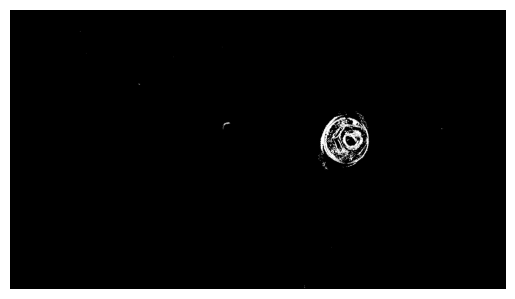

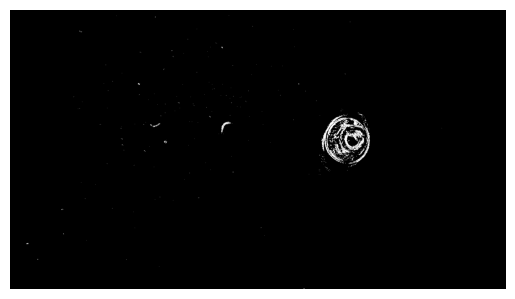

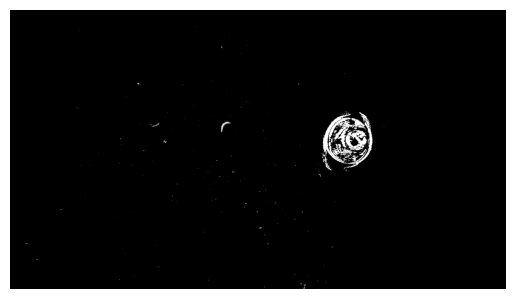

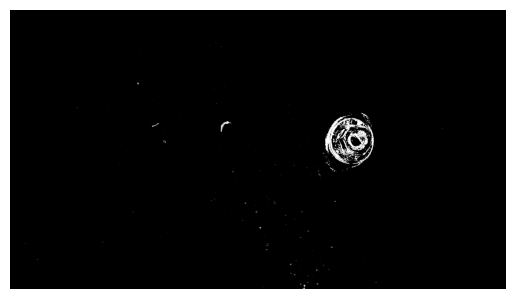

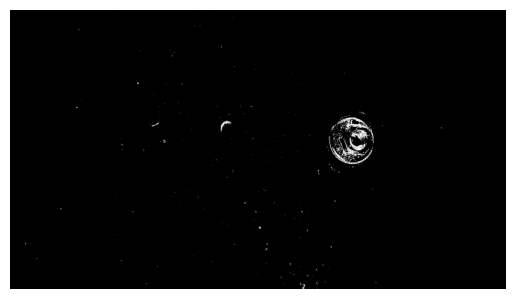

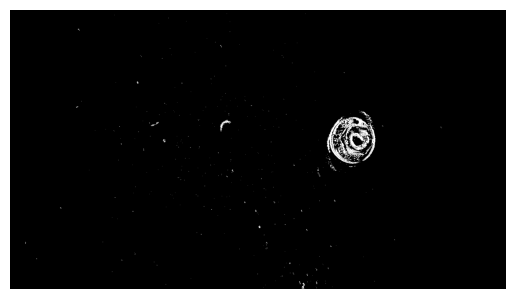

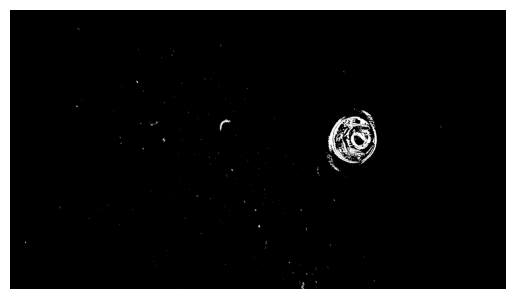

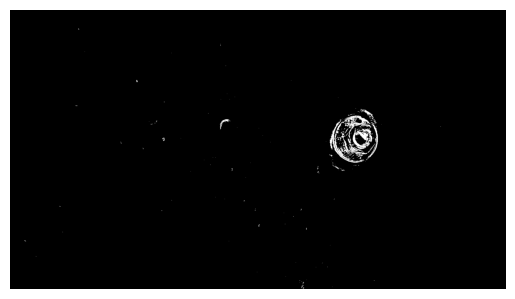

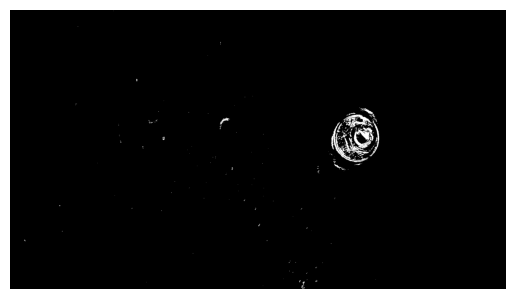

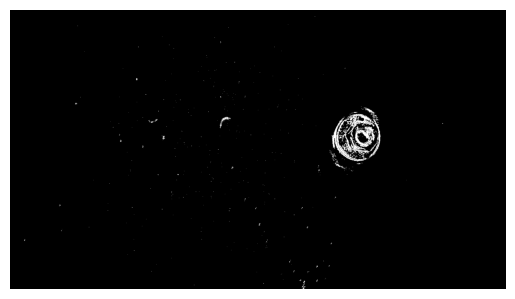

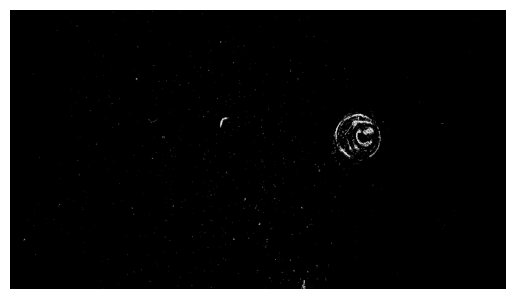

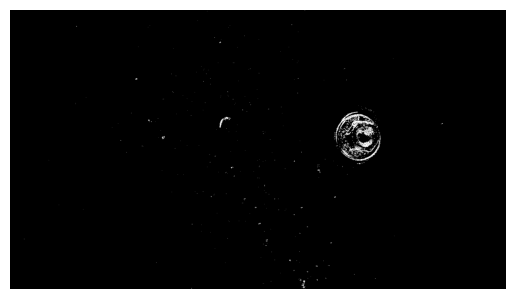

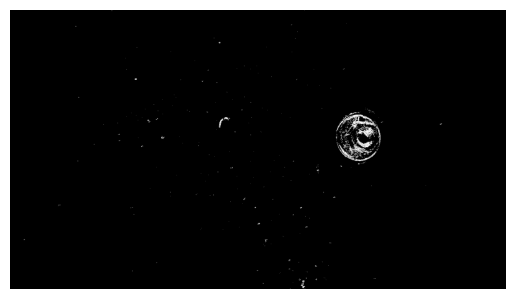

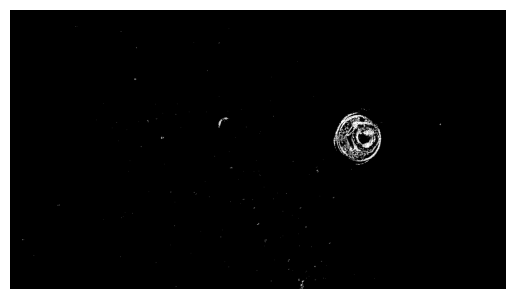

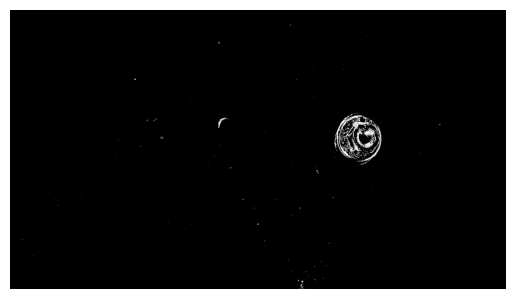

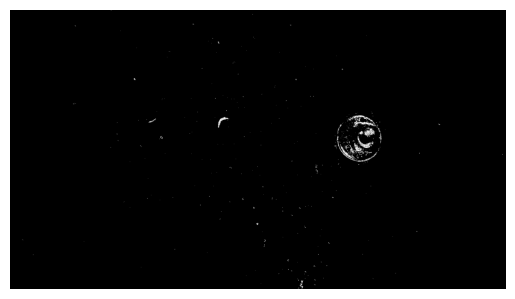

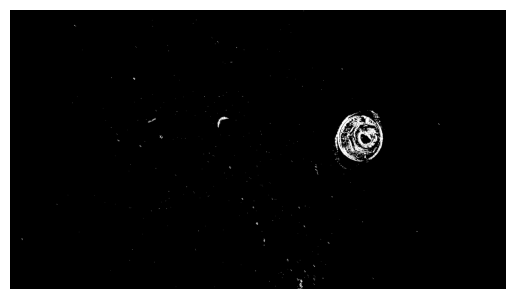

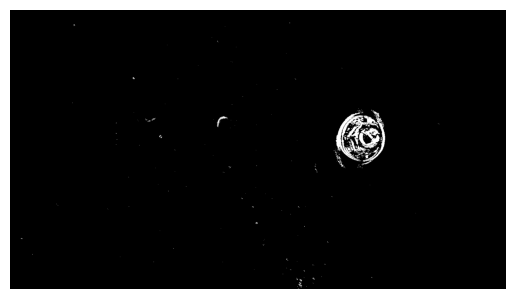

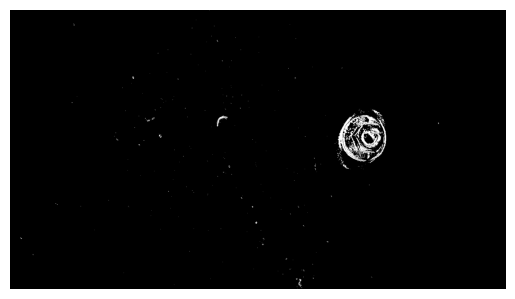

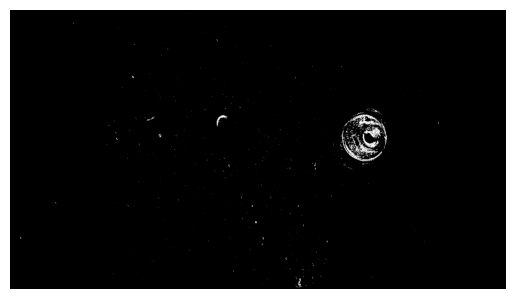

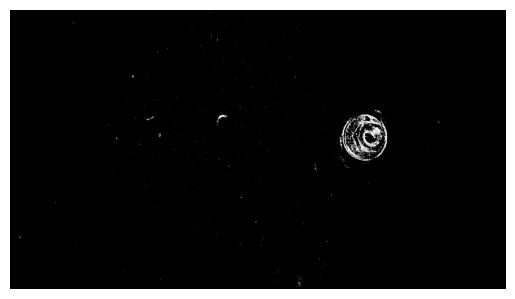

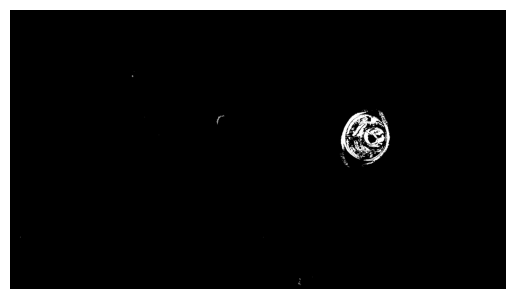

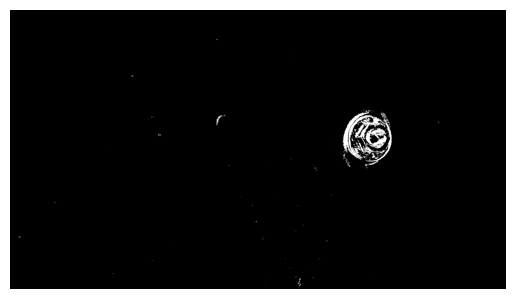

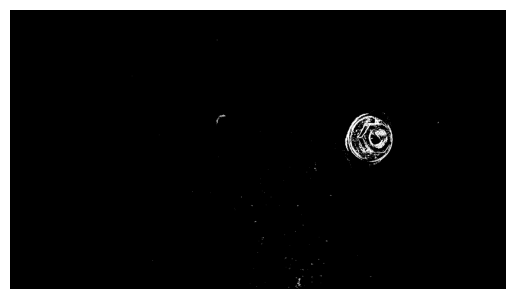

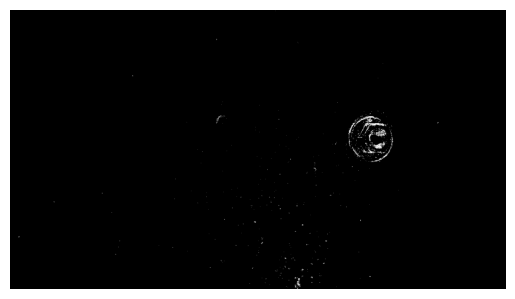

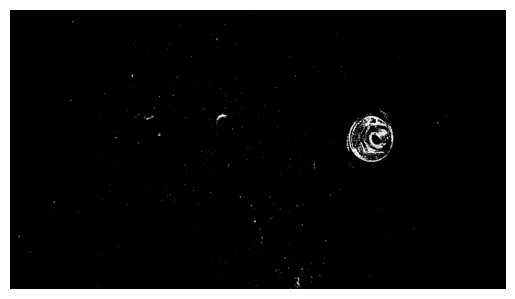

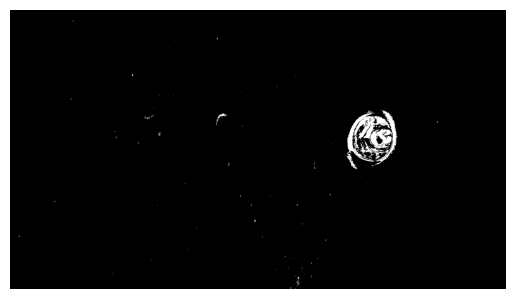

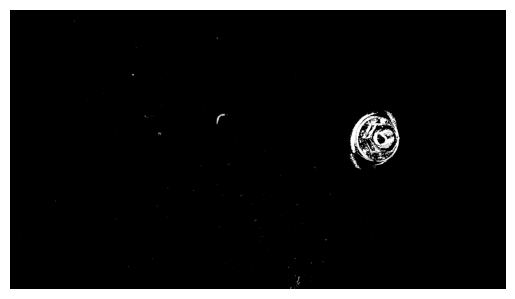

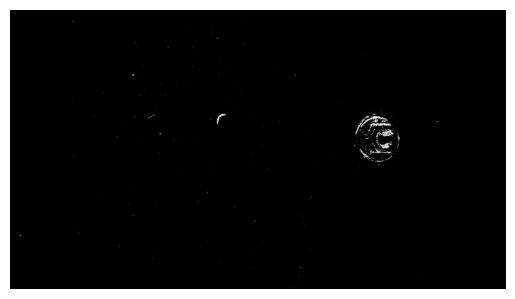

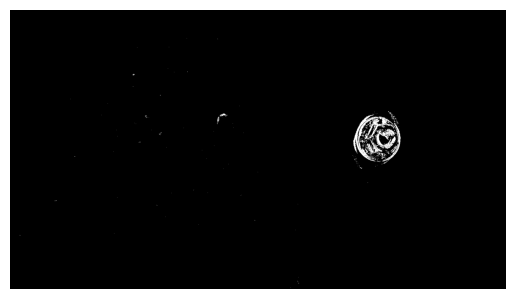

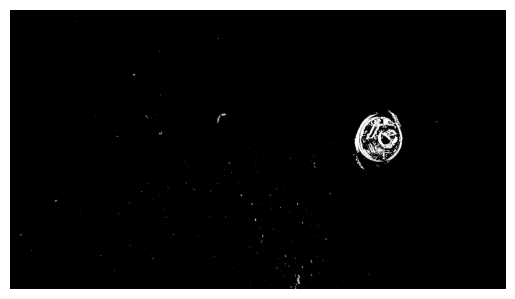

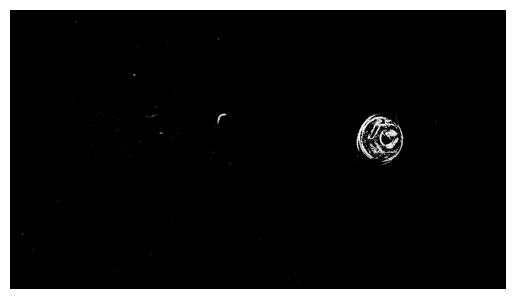

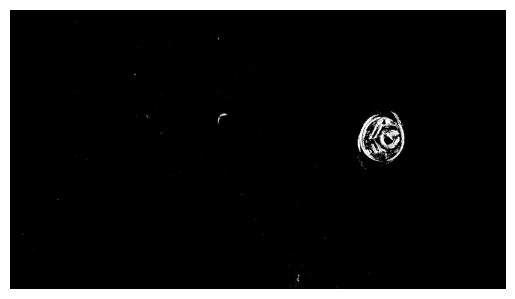

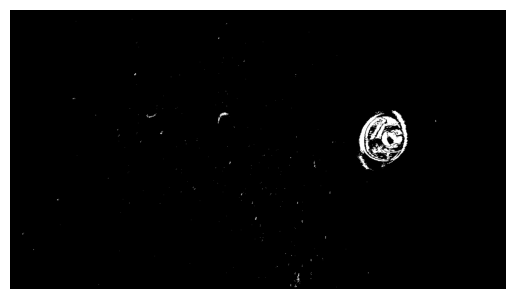

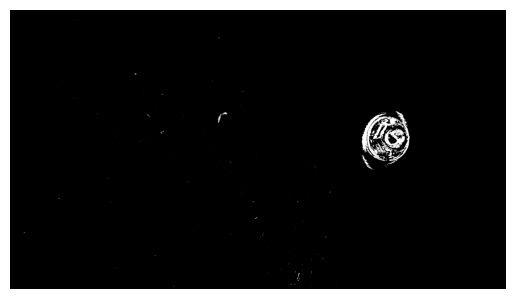

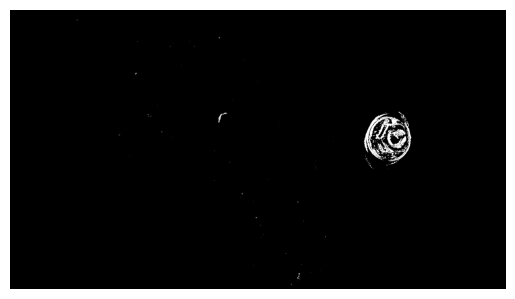

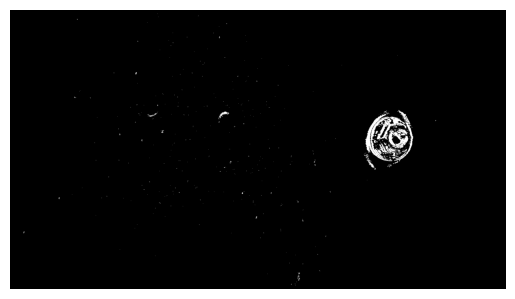

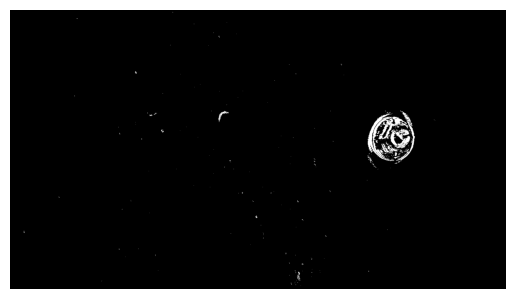

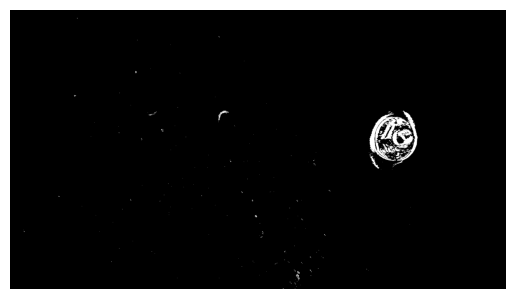

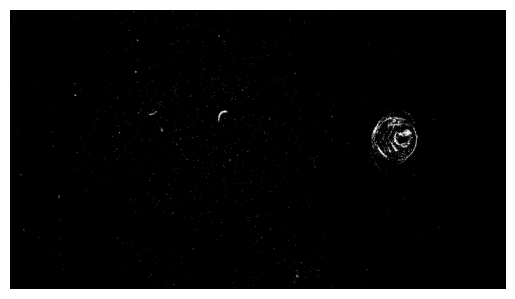

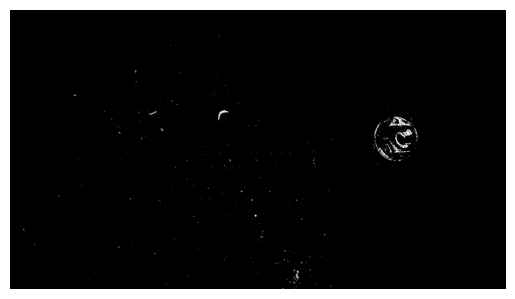

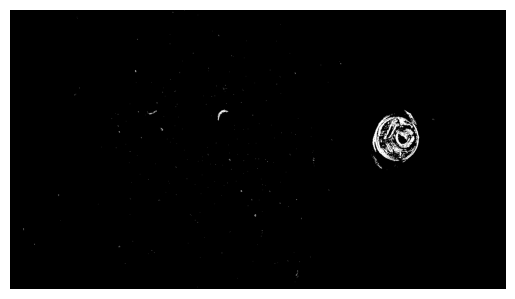

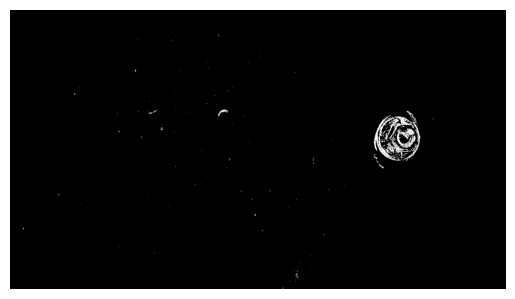

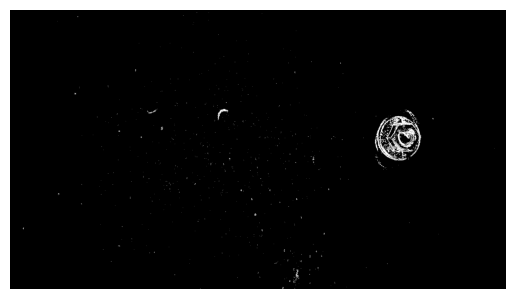

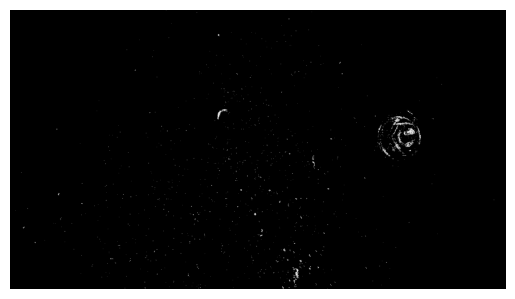

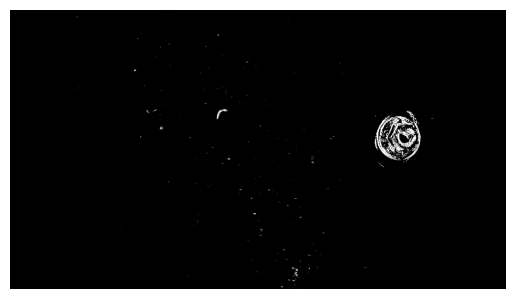

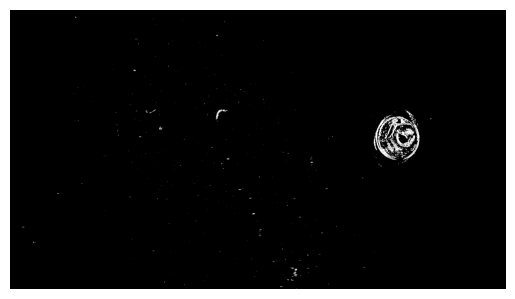

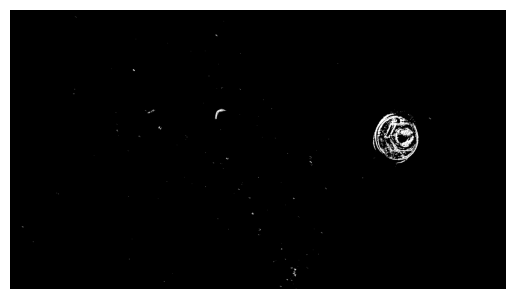

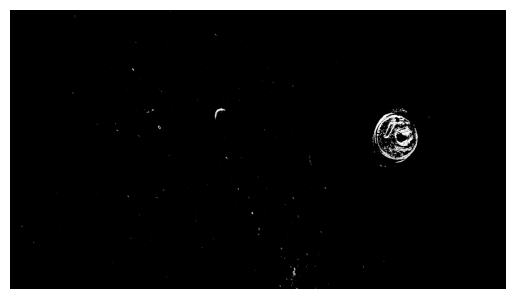

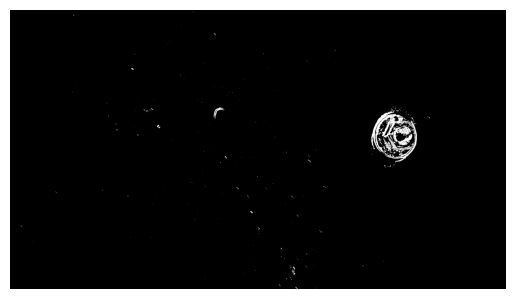

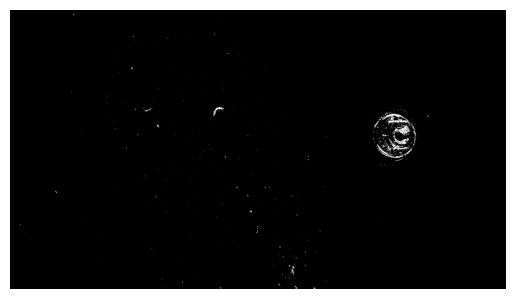

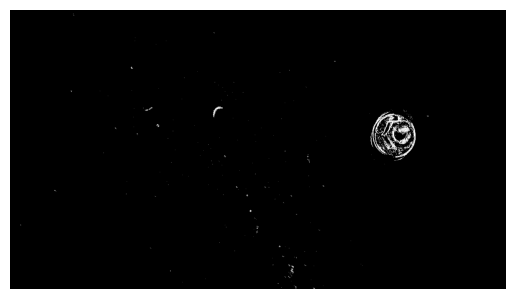

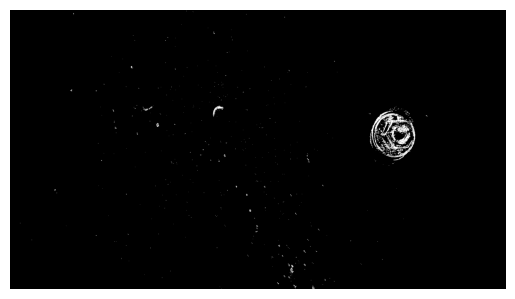

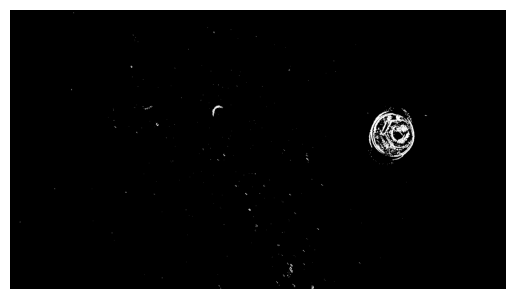

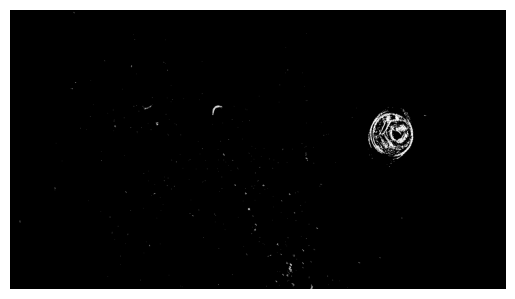

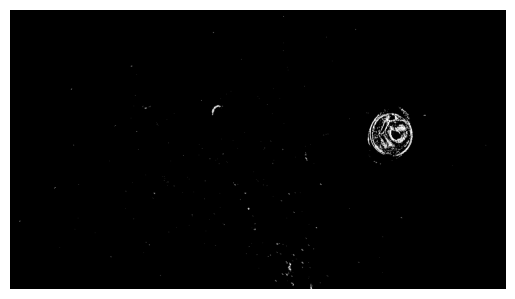

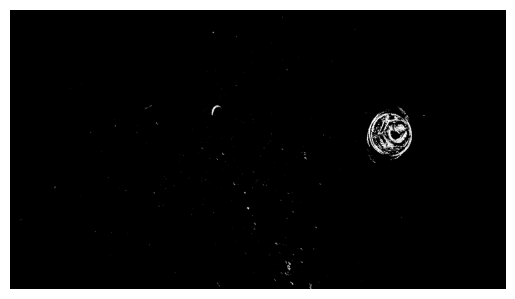

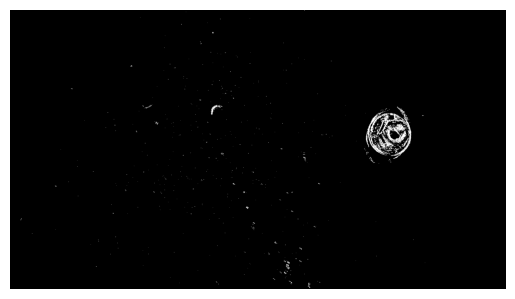

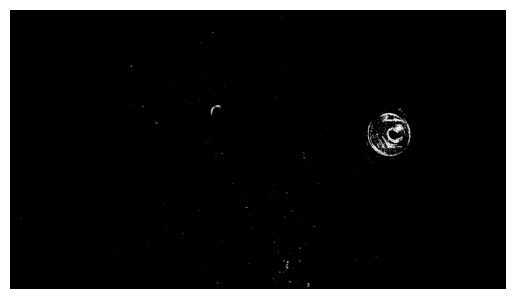

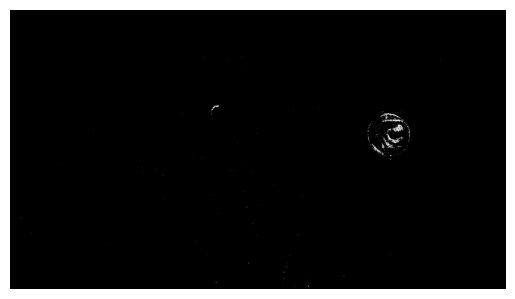

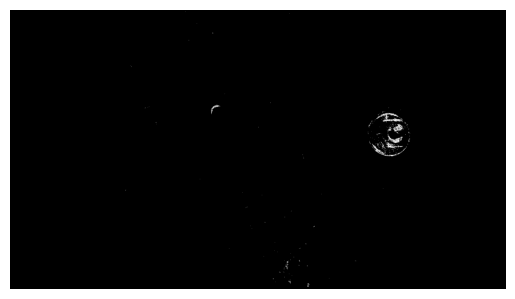

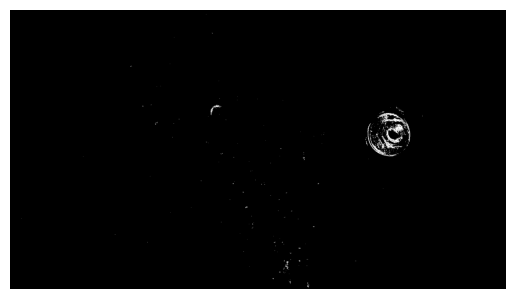

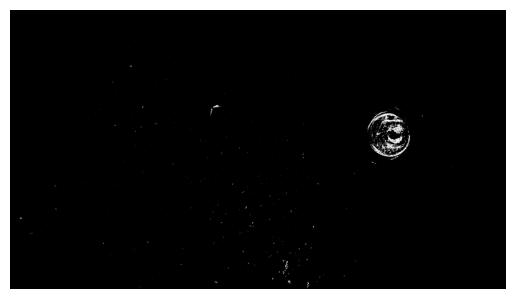

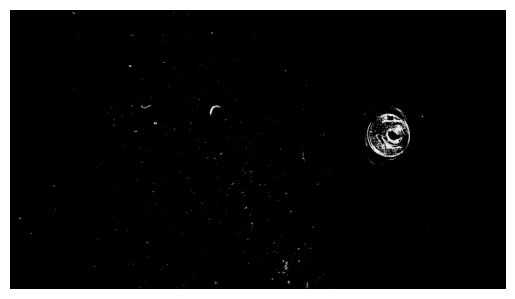

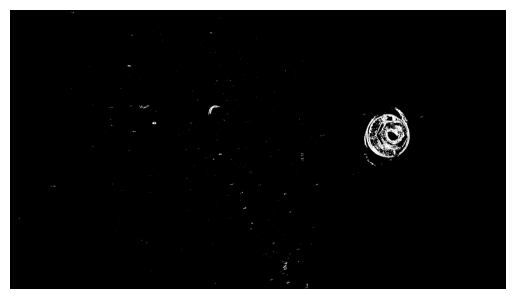

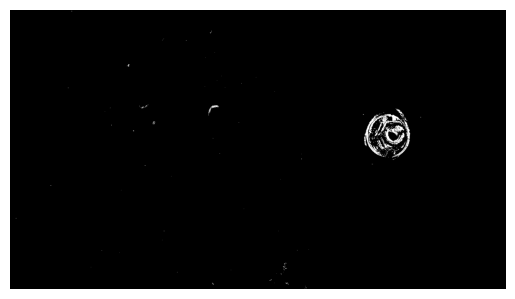

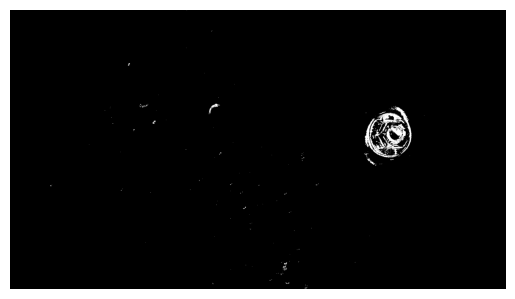

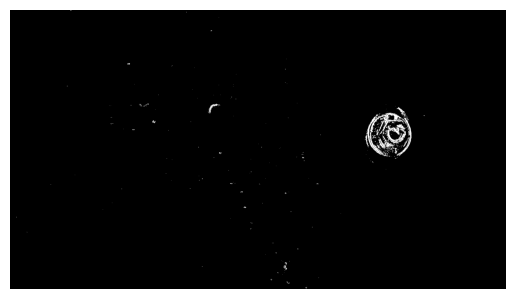

In [93]:
for d in D:    
    plt.imshow(d,cmap='gray')
    plt.axis('off')
    plt.show()

## Question 4

### BackgroundSubtractorMOG2 (Mixture of Gaussians Model 2) 

Cette méthode est basée sur le modèle de mélange de Gaussiennes. Elle divise l'image en pixels en utilisant un modèle de probabilité gaussien pour chaque pixel. Les pixels dont **la probabilité est inférieure à un seuil sont considérés comme appartenant à l'objet en mouvement**. Le modèle est adaptatif, ce qui signifie qu'il peut s'ajuster aux variations d'éclairage dans la vidéo.

In [ ]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4")
subtractor = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    mask = subtractor.apply(frame)
    plt.figure()
    plt.subplot(2,2,1)
    plt.imshow( frame)
    plt.subplot(2,2,2)
    plt.imshow(mask,cmap='gray')
    plt.axis('off')
    plt.show()
    
cap.release()

Le BackgroundSubtractorKNN utilise une méthode de suivi des voisins les plus proches pour mettre à jour le modèle de fond. 
=> gérer des situations de bruit dans la vidéo de manière plus efficace que le MOG2. 
**Il est particulièrement utile pour les environnements où l'éclairage change fréquemment.**


In [ ]:
import cv2

cap = cv2.VideoCapture(r"C:\Users\Arij\Downloads\VID_20231005_163051.mp4")
subtractor = cv2.createBackgroundSubtractorKNN()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    mask = subtractor.apply(frame)
    plt.figure()
    plt.subplot(2,2,1)
    plt.imshow( frame)
    plt.subplot(2,2,2)
    plt.imshow(mask,cmap='gray')
   
cap.release()